# House Prices Prediction

목적은 미국의 주택가격을 예측하는 것이다.
사용된 데이터 셋은 Kaggle에서 제공된다. https://www.kaggle.com/c/house-prices-advanced-regression-techniques

총 1460개의 레코드가 제공되고, 모델의 훈련에 사용될 수 있는 79개의 피처와 최종 결과 (SalePrice 판매가격)이 레이블로 제공된다.

각 필드들에 대해서 자세히 살펴보자

주어진 각 그룹 내에서 수치형 변수와 범주형 변수를 구분하여 정리했습니다.
1. 부동산 기본 특성
수치형 변수:
LotFrontage: 부동산과 연결된 도로 길이 (피트)
LotArea: 대지 크기 (평방 피트)
범주형 변수:
MSSubClass: 건물 유형
MSZoning: 일반적인 구역 분류
Street: 도로 접근 유형
LotShape: 대지의 일반적인 형태
LandContour: 대지의 평탄도
Utilities: 사용 가능한 유틸리티 종류
LotConfig: 대지 구성
LandSlope: 대지의 경사도
Neighborhood: Ames 시 경계 내 물리적 위치
Condition1: 주요 도로 또는 철도와의 인접성
Condition2: 주요 도로 또는 철도와의 인접성 (두 번째가 있을 경우)
2. 건물 및 실내 특성
수치형 변수:
OverallQual: 전반적인 자재 및 마감 품질
OverallCond: 전반적인 상태 평가
YearBuilt: 건축 연도
YearRemodAdd: 리모델링 연도
MasVnrArea: 석조 베니어 면적 (평방 피트)
BsmtFinSF1: 지하실 마감 면적 1 (평방 피트)
BsmtFinSF2: 지하실 마감 면적 2 (평방 피트)
BsmtUnfSF: 지하실 비마감 면적 (평방 피트)
TotalBsmtSF: 총 지하실 면적 (평방 피트)
1stFlrSF: 1층 면적 (평방 피트)
2ndFlrSF: 2층 면적 (평방 피트)
LowQualFinSF: 저품질 마감 면적 (평방 피트)
GrLivArea: 지상 생활 공간 면적 (평방 피트)
BsmtFullBath: 지하실 전체 욕실 개수
BsmtHalfBath: 지하실 반 욕실 개수
FullBath: 전체 욕실 개수
HalfBath: 반 욕실 개수
BedroomAbvGr: 지상층 침실 수
KitchenAbvGr: 지상층 주방 수
TotRmsAbvGrd: 지상층 방의 총 개수
범주형 변수:
BldgType: 주거 유형
HouseStyle: 주거 스타일
RoofStyle: 지붕 유형
RoofMatl: 지붕 재질
Exterior1st: 외장 재료
Exterior2nd: 외장 재료 (두 번째 재료가 있을 경우)
ExterQual: 외장 재질 품질
ExterCond: 외장 상태
Foundation: 기초 유형
BsmtQual: 지하실 품질
BsmtCond: 지하실 상태
BsmtExposure: 지하실 노출 여부
BsmtFinType1: 지하실 마감 유형 1
BsmtFinType2: 지하실 마감 유형 2
Heating: 난방 유형
HeatingQC: 난방 품질 및 상태
CentralAir: 중앙 에어컨 설치 여부
Electrical: 전기 시스템
KitchenQual: 주방 품질
Functional: 주택 기능성 평가
3. 추가 시설 및 외부 공간
수치형 변수:
GarageYrBlt: 차고 건축 연도
GarageCars: 차고 크기 (차량 수용량)
GarageArea: 차고 면적 (평방 피트)
WoodDeckSF: 목재 데크 면적 (평방 피트)
OpenPorchSF: 오픈된 현관 면적 (평방 피트)
EnclosedPorch: 밀폐된 현관 면적 (평방 피트)
3SsnPorch: 3계절용 현관 면적 (평방 피트)
ScreenPorch: 스크린 현관 면적 (평방 피트)
PoolArea: 수영장 면적 (평방 피트)
MiscVal: 기타 특성의 가치 (달러)
범주형 변수:
FireplaceQu: 벽난로 품질
GarageType: 차고 위치
GarageFinish: 차고 내부 마감
GarageQual: 차고 품질
GarageCond: 차고 상태
PavedDrive: 포장된 진입로 여부
4. 거래 정보
수치형 변수:
MoSold: 판매된 달
YrSold: 판매된 연도
SalePrice: 판매 가격 (목표 변수)
범주형 변수:
SaleType: 판매 유형
SaleCondition: 판매 조건

## EDA (Exploratory Data Analysis)

## Import the library

In [ ]:
!pip install tensorflow_decision_forests

In [ ]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

In [ ]:
print("TensorFlow v" + tf.__version__)
print("TensorFlow Decision Forests v" + tfdf.__version__)

TensorFlow v2.17.0
TensorFlow Decision Forests v1.10.0


## Load the dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#train_file_path = "../My Drive/3rd_Devcode_house price prediction/train.csv"
dataset_df = pd.read_csv('/content/drive/My Drive/3rd_Devcode_house price prediction/train.csv')
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (1460, 81)


The data is composed of 81 columns and 1460 entries. We can see all 81 dimensions of our dataset by printing out the first 3 entries using the following code:

In [ ]:
dataset_df.head(6)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  

[6 rows x 81 columns]

* There are **79** feature columns. Using these features your model has to
predict the house sale price indicated by the label column named `SalePrice`. *italicized text*

There are 80 feature columns. Using these features your model has to predict the house sale price indicated by the label column named SalePrice.

We will drop the `Id` column as it is not necessary for model training.

In [ ]:
dataset_df = dataset_df.drop('Id', axis=1)
dataset_df.head(5)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

We can inspect the types of feature columns using the following code:

In [ ]:
# dataset_df.info()

In [ ]:
# 데이터셋의 정보 확인
print("Dataset Information:")
dataset_df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   

<Axes: >

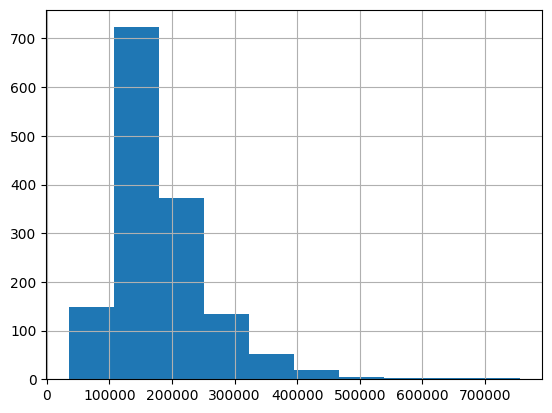

In [ ]:
dataset_df['SalePrice'].hist()

최종값 SalePrice의 분포가 정규분포로 적절해 보임.

In [ ]:
# 각 열의 고유값 개수 확인
print("\nUnique values in each column:")
for column in dataset_df.columns:
    print(f"{column}: {dataset_df[column].nunique()} unique values")


Unique values in each column:
MSSubClass: 15 unique values
MSZoning: 5 unique values
LotFrontage: 110 unique values
LotArea: 1073 unique values
Street: 2 unique values
Alley: 2 unique values
LotShape: 4 unique values
LandContour: 4 unique values
Utilities: 2 unique values
LotConfig: 5 unique values
LandSlope: 3 unique values
Neighborhood: 25 unique values
Condition1: 9 unique values
Condition2: 8 unique values
BldgType: 5 unique values
HouseStyle: 8 unique values
OverallQual: 10 unique values
OverallCond: 9 unique values
YearBuilt: 112 unique values
YearRemodAdd: 61 unique values
RoofStyle: 6 unique values
RoofMatl: 8 unique values
Exterior1st: 15 unique values
Exterior2nd: 16 unique values
MasVnrType: 3 unique values
MasVnrArea: 327 unique values
ExterQual: 4 unique values
ExterCond: 5 unique values
Foundation: 6 unique values
BsmtQual: 4 unique values
BsmtCond: 4 unique values
BsmtExposure: 4 unique values
BsmtFinType1: 6 unique values
BsmtFinSF1: 637 unique values
BsmtFinType2: 6 u

In [ ]:
# 숫자형 데이터의 기초 통계 정보 확인
print("\nStatistical Summary of Numeric Columns:")
print(dataset_df.describe())


Statistical Summary of Numeric Columns:
        MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407  

In [ ]:
# 범주형 데이터의 기초 통계 정보 확인
print("\nStatistical Summary of Categorical Columns:")
print(dataset_df.describe(include=['object']))


Statistical Summary of Categorical Columns:
       MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4  

# 데이터 필터링
## 컬럼별로 값이 존재하지 않는 레코들이 몇개가 있는지 확인함.

In [ ]:
#dataset_df.isnull().sum()
# 결측값이 있는 열만 필터링하여 출력
missing_values = dataset_df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # 결측값이 있는 열만 필터링
print(missing_values)

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


위 결과 값들을 하기와 같이, %로 표시

Missing values count for each column:
LotFrontage (도로와의 거리)       259
Alley (골목)                    1369
MasVnrType (벽돌 유형)            872
MasVnrArea (벽돌 면적)             8
BsmtQual (지하실 품질)            37
BsmtCond (지하실 상태)            37
BsmtExposure (지하실 노출)        38
BsmtFinType1 (지하실 마감 유형 1)  37
BsmtFinType2 (지하실 마감 유형 2)  38
Electrical (전기)                1
FireplaceQu (벽난로 품질)         690
GarageType (차고 유형)            81
GarageYrBlt (차고 건축 연도)       81
GarageFinish (차고 마감)          81
GarageQual (차고 품질)           81
GarageCond (차고 상태)           81
PoolQC (수영장 품질)             1453
Fence (울타리)                  1179
MiscFeature (기타 특징)         1406

In [ ]:
missing_ratio = dataset_df.isnull().mean() * 100
print(missing_ratio[missing_ratio > 0])

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


In [ ]:
#import matplotlib.pyplot as plt
#import seaborn as sns

# LotFrontage 데이터의 히스토그램
#plt.figure(figsize=(10, 6))
#sns.histplot(dataset_df['LotFrontage'], kde=True)
#plt.title('Histogram of LotFrontage')
#plt.xlabel('LotFrontage')
#plt.ylabel('Frequency')
#plt.show()

## 결측치 처리


In [ ]:
# 50% 이상의 결측값을 가진 컬럼 삭제
threshold = 50
dataset_df = dataset_df.loc[:, dataset_df.isnull().mean() * 100 < threshold]

# 남아있는 컬럼 갯수 세기
remaining_columns_count = dataset_df.shape[1]

print("남아있는 컬럼 갯수:", remaining_columns_count)

남아있는 컬럼 갯수: 75


1. LotFrontage (17.74%) : 처리 방법: 평균 또는 중앙값으로 대체. 데이터의 분포가 정규분포에 가까운 경우 평균으로, 그렇지 않다면 중앙값으로 대체:

In [ ]:
# prompt: ## 결측치 처리

# 숫자형 열의 결측치는 평균값으로 대체
for column in dataset_df.columns:
    if dataset_df[column].dtype in ['int64', 'float64']:
        dataset_df[column].fillna(dataset_df[column].mean(), inplace=True)

# 범주형 열의 결측치는 'None'으로 대체
for column in dataset_df.columns:
    if dataset_df[column].dtype == 'object':
        dataset_df[column].fillna('None', inplace=True)

# 결측치 처리 후 확인
missing_values_count_after = dataset_df.isnull().sum()
print("Missing values count after handling:")
print(missing_values_count_after[missing_values_count_after > 0])


<ipython-input-186-b5400d29886a>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_df[column].fillna(dataset_df[column].mean(), inplace=True)
<ipython-input-186-b5400d29886a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[column].fillna(dataset_df[column].mean(), inplace=True)
<ipython-input-186-b5400d29886a>:11: FutureWarn

Missing values count after handling:
Series([], dtype: int64)


2.Alley (93.77%)

In [ ]:
# 결측치 비율 계산
missing_ratio = dataset_df.isnull().mean() * 100

# 50% 이상인 열 제거
cols_to_drop = missing_ratio[missing_ratio > 50].index
dataset_df.drop(columns=cols_to_drop, inplace=True)

print("Columns dropped due to missing values greater than 50%:", cols_to_drop.tolist())

Columns dropped due to missing values greater than 50%: []


MasVnrArea (0.55%)

처리 방법: 결측치 비율이 낮으므로 중앙값으로 대체

In [ ]:
dataset_df['MasVnrArea'].fillna(dataset_df['MasVnrArea'].median(), inplace=True)

<ipython-input-188-d83feda744ff>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_df['MasVnrArea'].fillna(dataset_df['MasVnrArea'].median(), inplace=True)


BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 (각 2.53% - 2.60%)

처리 방법: 이 열들은 결측치 비율이 낮으므로 최빈값으로 대체

In [ ]:
dataset_df['BsmtQual'].fillna(dataset_df['BsmtQual'].mode()[0], inplace=True)
dataset_df['BsmtCond'].fillna(dataset_df['BsmtCond'].mode()[0], inplace=True)
dataset_df['BsmtExposure'].fillna(dataset_df['BsmtExposure'].mode()[0], inplace=True)
dataset_df['BsmtFinType1'].fillna(dataset_df['BsmtFinType1'].mode()[0], inplace=True)
dataset_df['BsmtFinType2'].fillna(dataset_df['BsmtFinType2'].mode()[0], inplace=True)

<ipython-input-189-8277bdf9e4b2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_df['BsmtQual'].fillna(dataset_df['BsmtQual'].mode()[0], inplace=True)
<ipython-input-189-8277bdf9e4b2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

Electrical (0.07%)

처리 방법: 결측치 비율이 매우 낮으므로 최빈값으로 대체


In [ ]:
dataset_df['Electrical'].fillna(dataset_df['Electrical'].mode()[0], inplace=True)

<ipython-input-190-720b5c3cf7b8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_df['Electrical'].fillna(dataset_df['Electrical'].mode()[0], inplace=True)


FireplaceQu (47.26%)
처리 방법: 결측치 비율이 높으므로 이 열을 삭제 혹은 적절한 값으로 대체.

In [ ]:
# dataset_df.drop(columns=['FireplaceQu'], inplace=True)
# 살리는 방법
#1. 도메인 지식 활용
#벽난로가 없는 주택에 대해서는 결측치를 None 또는 'No Fireplace' 같은 값으로 대체할 수 있습니다.
#벽난로 품질의 결측치를 대체하기 위해 다른 변수를 참고하거나, 비슷한 특성을 가진 주택의 평균/최빈값을 사용할 수 있습니다."""
# FireplaceQu 열의 결측치를 'No Fireplace'로 대체
#dataset_df['FireplaceQu'].fillna('No Fireplace', inplace=True)

# 결측치 대체 후 상태 확인
#print("FireplaceQu column after handling missing values:")
#print(dataset_df['FireplaceQu'].value_counts())

#""" 추가 분석
#상관관계 분석: 벽난로 품질이 주택 가격(SalePrice)과 어떤 관계가 있는지 분석하여 이 변수가 얼마나 중요한지를 확인할 수 있습니다.
#시각화: 벽난로 품질에 따른 주택 가격 분포를 시각화하여 더 많은 인사이트를 얻을 수 있습니다."""


GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond (각 5.55%)

처리 방법: 최빈값으로 대체.

In [ ]:
dataset_df['GarageType'].fillna(dataset_df['GarageType'].mode()[0], inplace=True)
dataset_df['GarageYrBlt'].fillna(dataset_df['GarageYrBlt'].mode()[0], inplace=True)
dataset_df['GarageFinish'].fillna(dataset_df['GarageFinish'].mode()[0], inplace=True)
dataset_df['GarageQual'].fillna(dataset_df['GarageQual'].mode()[0], inplace=True)
dataset_df['GarageCond'].fillna(dataset_df['GarageCond'].mode()[0], inplace=True)

<ipython-input-192-20163d2c6a1d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_df['GarageType'].fillna(dataset_df['GarageType'].mode()[0], inplace=True)
<ipython-input-192-20163d2c6a1d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].met

In [ ]:
dataset_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF

In [ ]:
# 남아있는 컬럼의 갯수 출력
remaining_columns_count = len(dataset_df.columns)
print("남아있는 컬럼의 갯수:", remaining_columns_count)

남아있는 컬럼의 갯수: 75


# Data 시각화

## House Price Distribution

Now let us take a look at how the house prices are distributed.

<ipython-input-195-dc911a47893e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


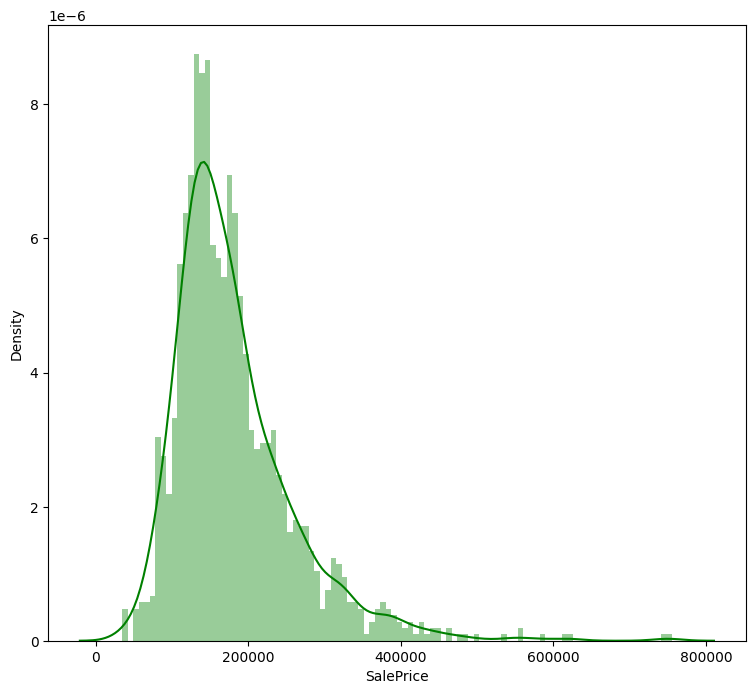

In [ ]:
print(dataset_df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

## Numerical data distribution

We will now take a look at how the numerical features are distributed. In order to do this, let us first list all the types of data from our dataset and select only the numerical ones.

In [ ]:
list(set(dataset_df.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O')]

In [ ]:
df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003       196.0         706           0  ...           0   
1          1976         0.0         978           0  ...         298   
2          2002       162.0         486           0  ...           0   
3          1970         0.0         216           0  ...           0   
4          2000       350.0         655           0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 37 columns]

Now let us plot the distribution for all the numerical features.

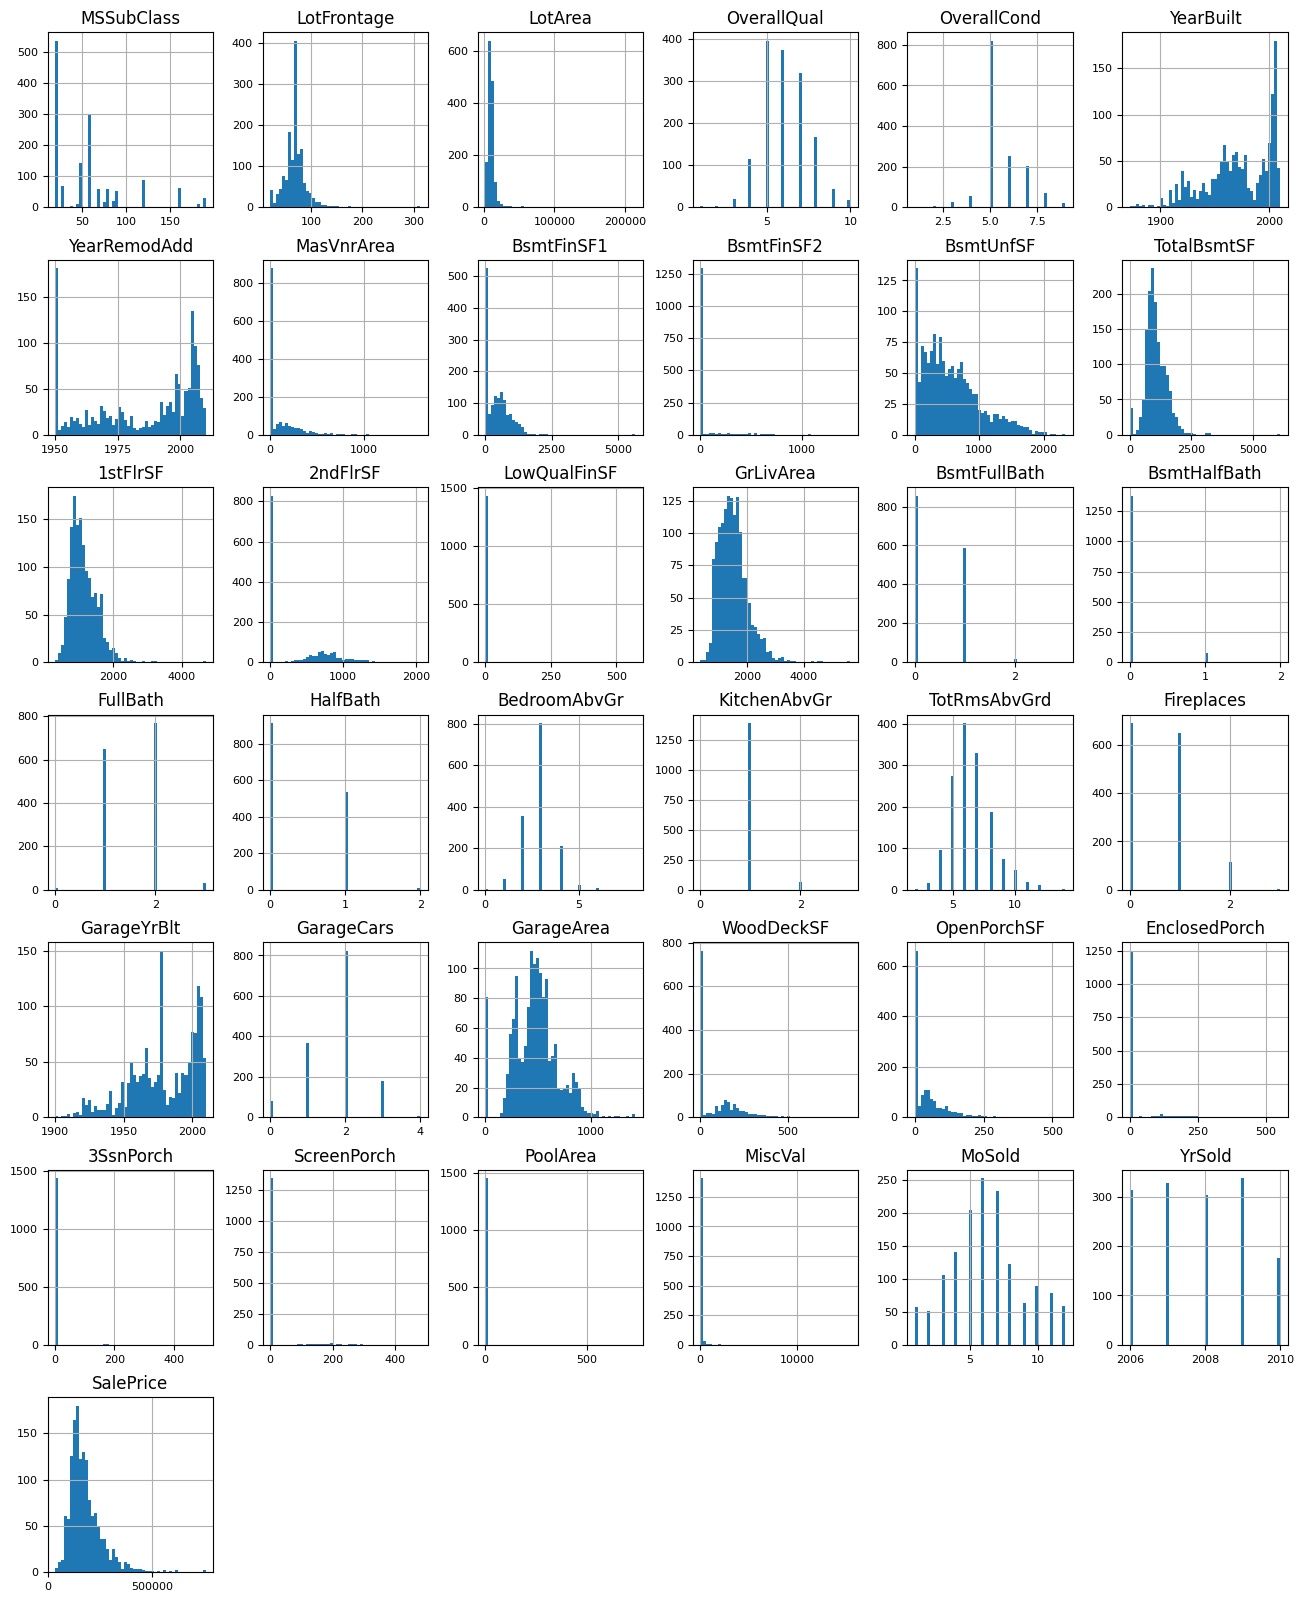

In [ ]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

### Categorical Variable: Bar Graph


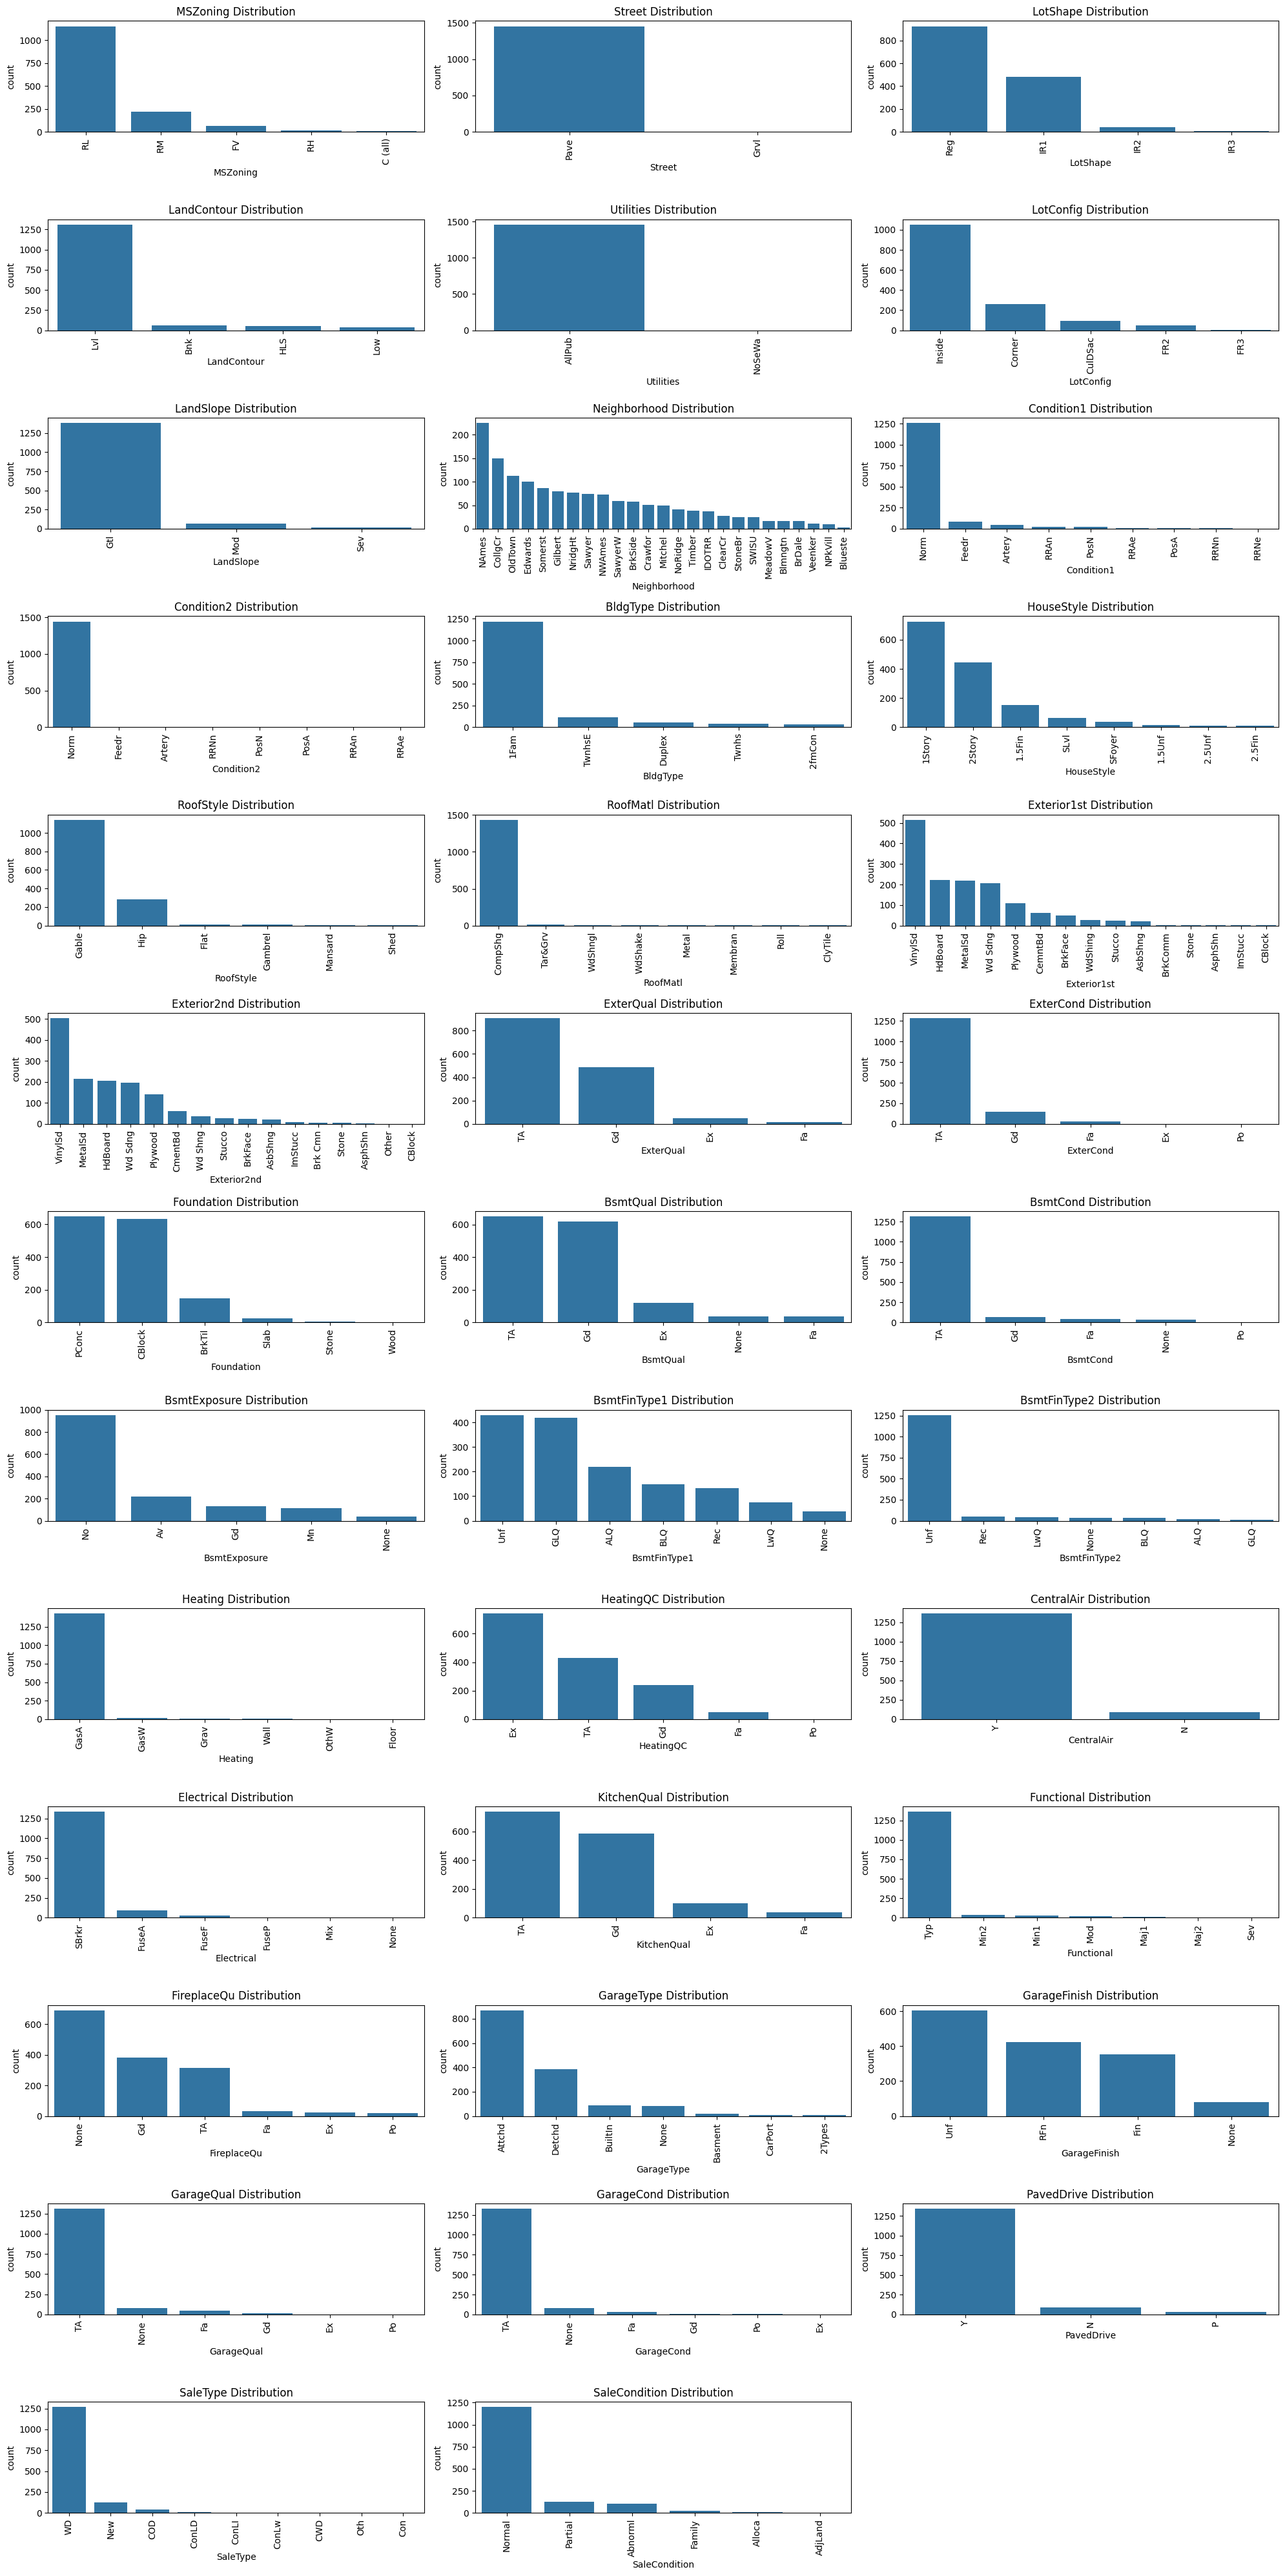

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 범주형 컬럼 추출
categorical_cols = dataset_df.select_dtypes(include=['object']).columns

# 각 범주형 컬럼에 대한 막대 그래프 시각화
plt.figure(figsize=(20, 40))  # 그래프의 크기 설정 (너비, 높이)
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols) // 3 + 1, 3, i)  # 3열 배치
    sns.countplot(data=dataset_df, x=col, order=dataset_df[col].value_counts().index)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=90)  # x축 라벨 회전

plt.tight_layout()
plt.show()

### Y값과의 상관관계 분석

Numerical Variable

In [ ]:
# SalePrice와 숫자형 데이터의 상관계수 계산
correlation_matrix = df_num.corr()

# SalePrice와 다른 변수들 간의 상관계수 확인
saleprice_corr = correlation_matrix['SalePrice'].sort_values(ascending=False)
print(saleprice_corr)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
GarageYrBlt      0.470177
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


### 상관관계가 높은 변수들

* OverallQual (0.79): 집의 전반적인 품질이 집값과 가장 높은 양의 상관관계를 가짐. 즉, 품질이 높을수록 집값이 높아지는 경향을 보임.
GrLivArea (0.71): 거주 면적(Ground Living Area)이 집값과 매우 높은 양의 상관관계를 가짐. 즉, 더 넓은 거주 공간을 가진 집이 더 비싼 경향을 보임.
- OverallQual (0.79): 집의 전반적인 품질이 집값과 가장 높은 양의 상관관계를 가짐. 즉, 품질이 높을수록 집값이 높아지는 경향을 보임.
- GrLivArea (0.71): 거주 면적(Ground Living Area)이 집값과 매우 높은 양의 상관관계를 가짐. 즉, 더 넓은 거주 공간을 가진 집이 더 비싼 경향을 보임.
- GarageCars (0.64), GarageArea (0.62): 차고의 크기와 주차할 수 있는 차의 수가 집값과 밀접한 관련을 가짐. 큰 차고가 있는 집일수록 더 비싸다는 의미를 가짐.
- TotalBsmtSF (0.61): 지하실의 총 면적 역시 집값과 강한 양의 상관관계를 가짐.
- 1stFlrSF (0.61): 1층 면적이 클수록 집값이 높아지는 경향을 보임.
- FullBath (0.56): 완전 욕실의 수가 많을수록 집값이 높아지는 경향을 가짐.
- TotRmsAbvGrd (0.53): 지상층의 방 개수가 많을수록 집값이 높아지는 경향을 가짐.
- YearBuilt (0.52): 집이 지어진 연도가 집값에 영향을 미침. 새로운 집일수록 가격이 더 높아지는 경향을 보임.
### 중간 정도의 상관관계
- Fireplaces (0.47): 벽난로의 유무도 어느 정도 집값에 영향을 미침.
- MasVnrArea (0.47): 벽돌 혹은 석조 마감재가 사용된 면적이 클수록 집값이 올라가는 경향을 가짐.
- LotFrontage (0.33): 대지의 전면 너비가 넓을수록 집값이 높아지는 경향을 가짐.
- 2ndFlrSF (0.32): 2층 면적도 어느 정도 집값에 영향을 미침.
상관관계가 낮거나 음의 상관관계를 보이는 변수들
- OverallCond (-0.08): 집의 전반적인 상태는 음의 상관관계를 가짐. 하지만 상관관계가 약하므로 큰 영향을 미치지 않음.
- MSSubClass (-0.08): 집의 하위 클래스(건축 유형)도 집값과 음의 상관관계를 가짐.
- KitchenAbvGr (-0.14): 지상층의 주방 수는 음의 상관관계를 보이지만 큰 영향은 미치지 않음.
### 상관관계가 낮거나 음의 상관관계를 보이는 변수들
- OverallCond (-0.08): 집의 전반적인 상태는 음의 상관관계를 가짐. 하지만 상관관계가 약하므로 큰 영향을 미치지 않음.
- MSSubClass (-0.08): 집의 하위 클래스(건축 유형)도 집값과 음의 상관관계를 가짐.
- KitchenAbvGr (-0.14): 지상층의 주방 수는 음의 상관관계를 보이지만 큰 영향은 미치지 않음

### 결론
- 가장 큰 영향을 미치는 변수는 집의 품질, 거주 면적, 차고 크기, 1층 면적, 욕실 수임.
반면, 전반적인 상태, 주방 수, 저품질 완성 면적과 같은 변수들은 집값에 부정적인 영향을 미치지만 그 영향력은 상대적으로 적음을 보임.

Categorical Variable

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 남아있는 범주형 변수 확인
categorical_features = dataset_df.select_dtypes(include=['object']).columns.tolist()

# 결과 출력
print("남아있는 범주형 변수 목록:")
print(categorical_features)

남아있는 범주형 변수 목록:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


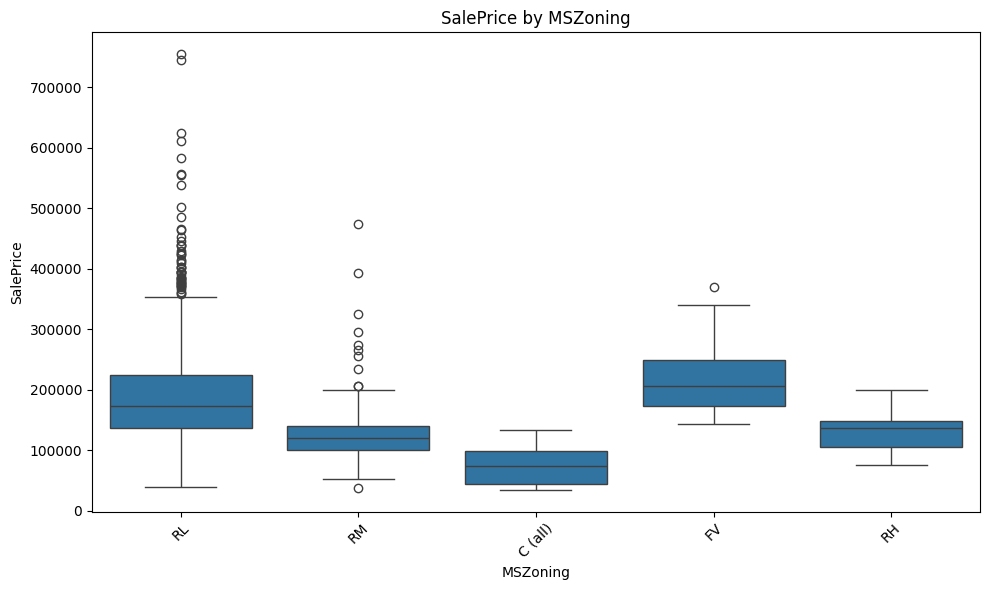

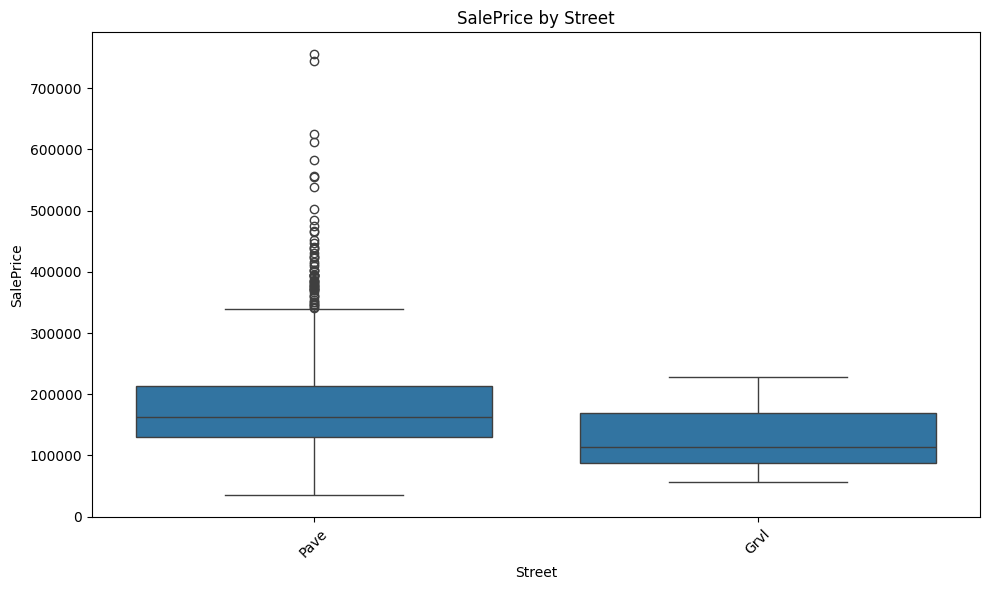

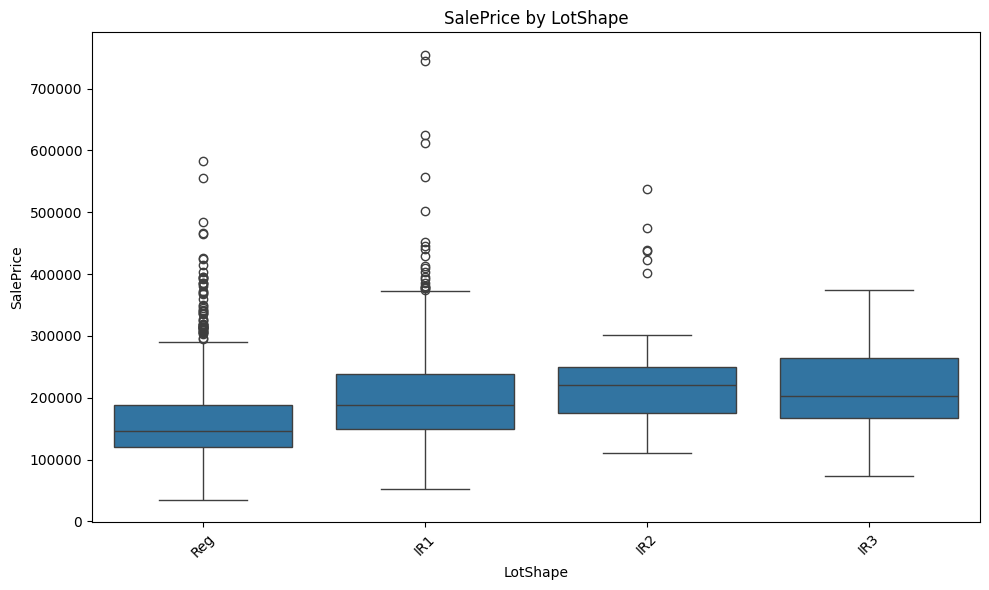

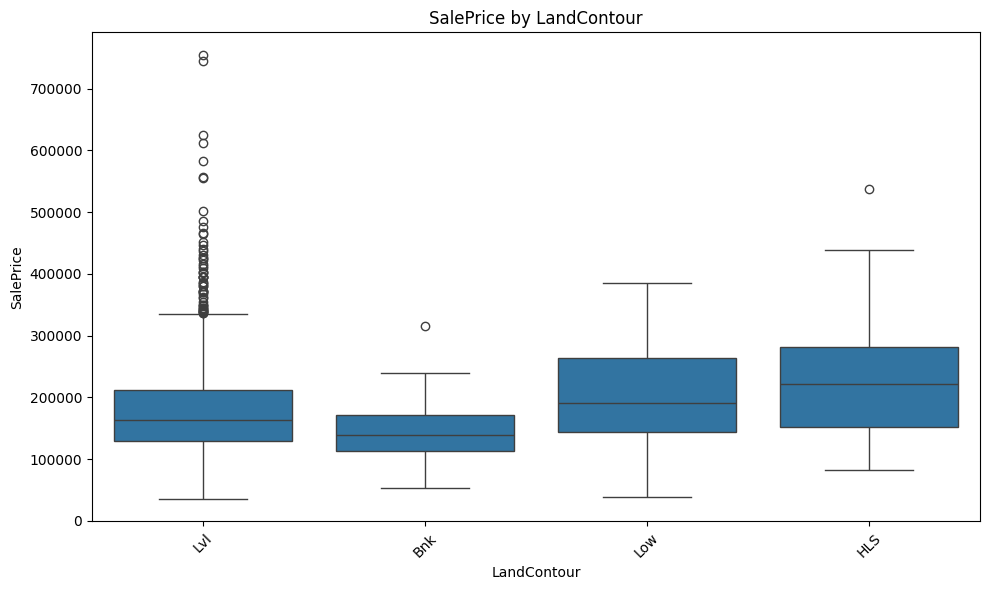

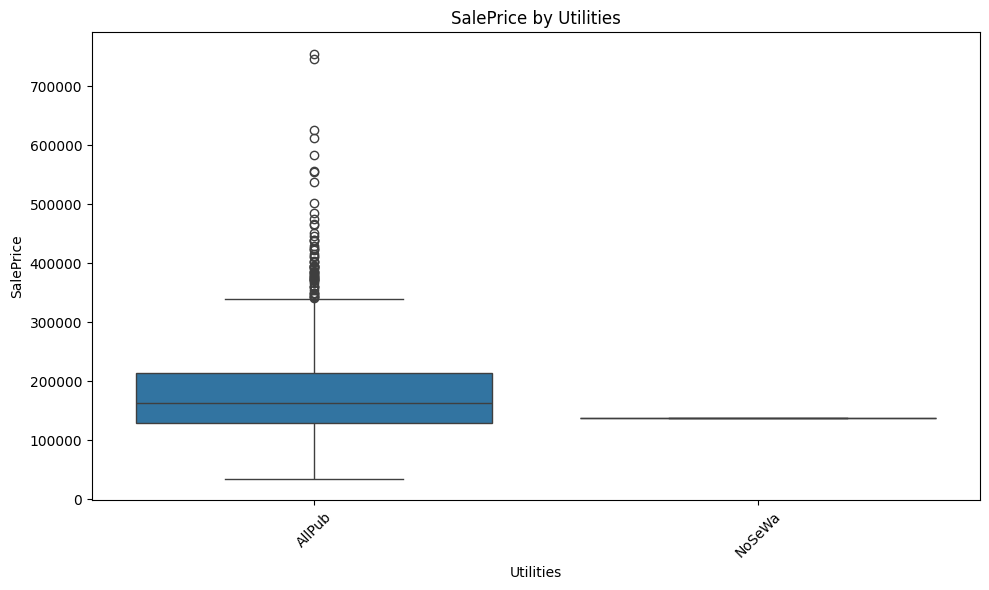

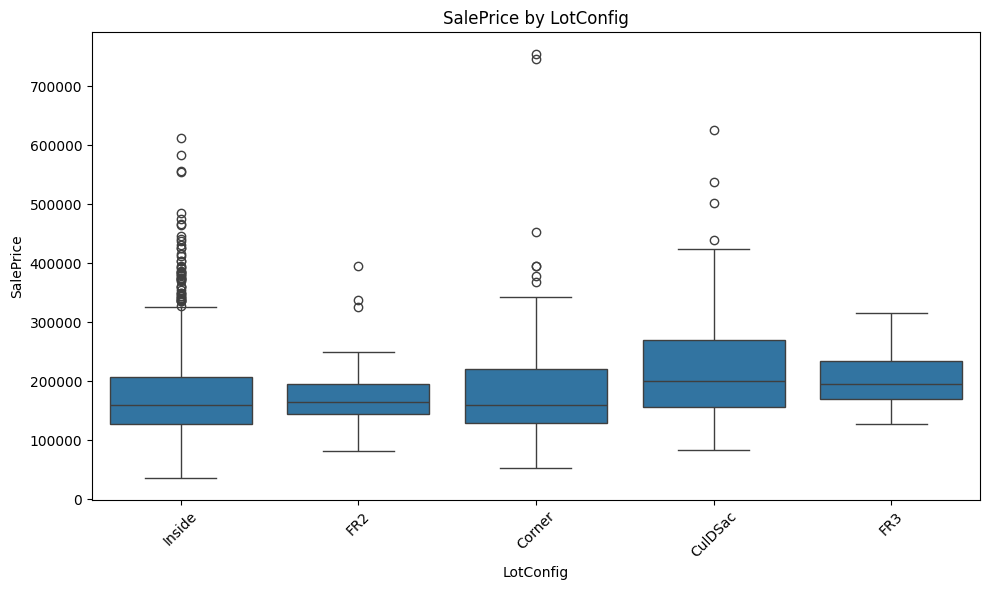

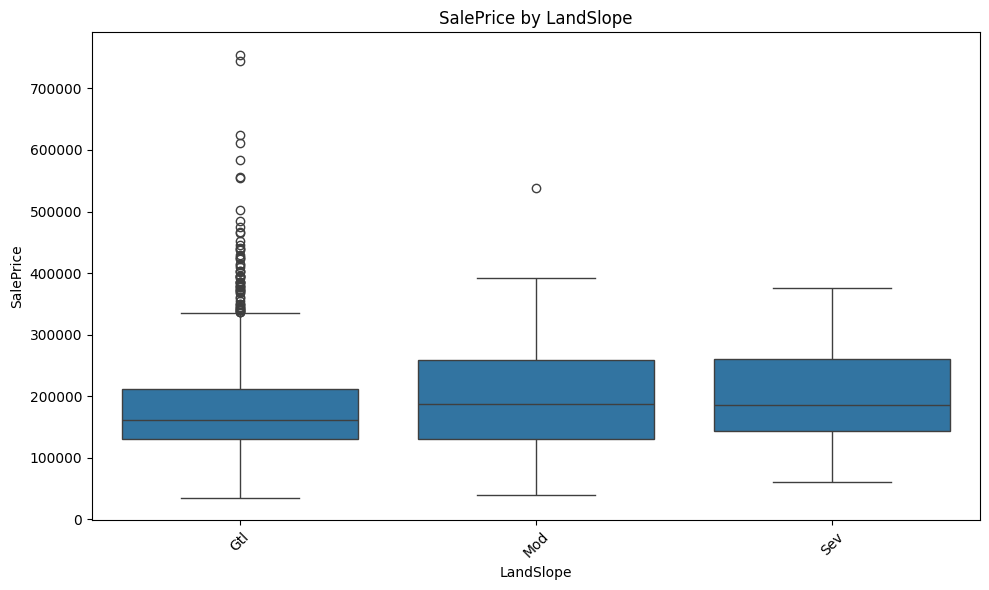

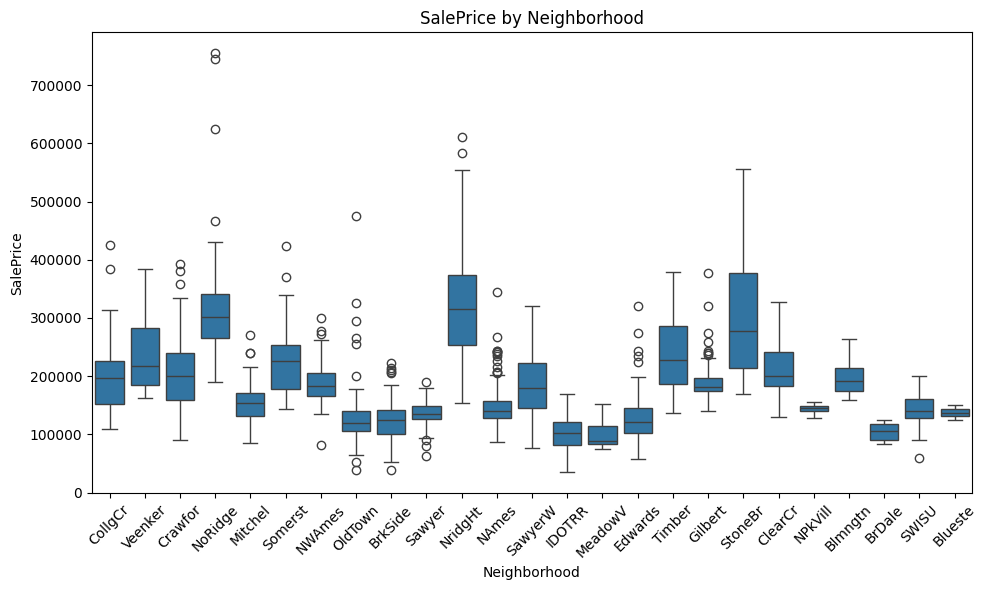

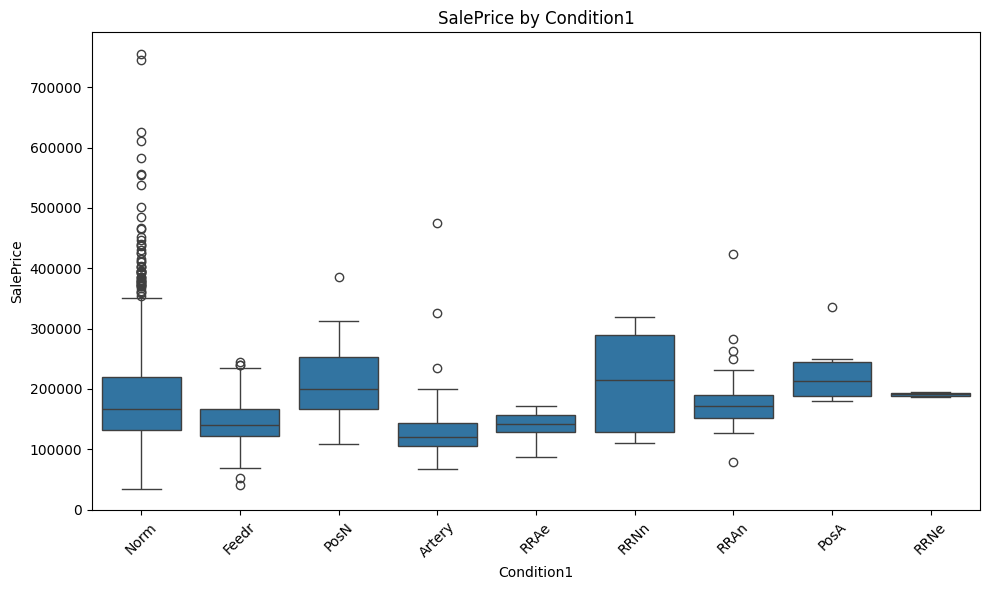

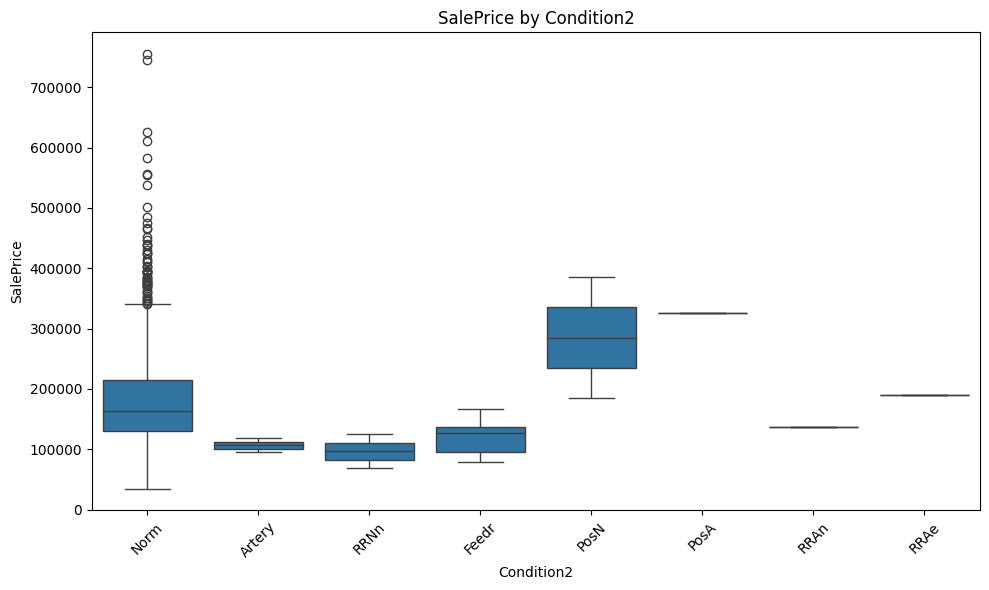

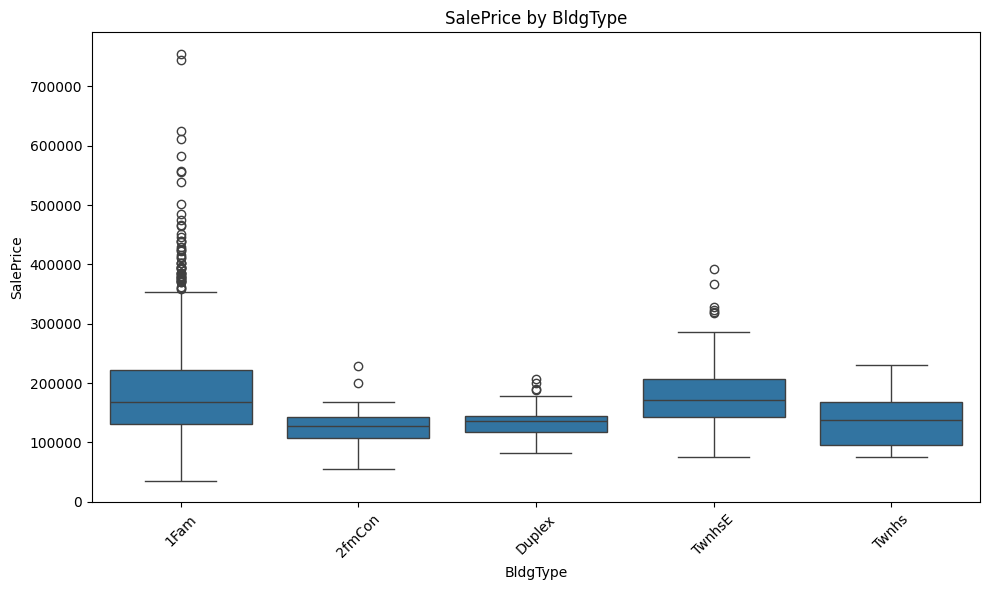

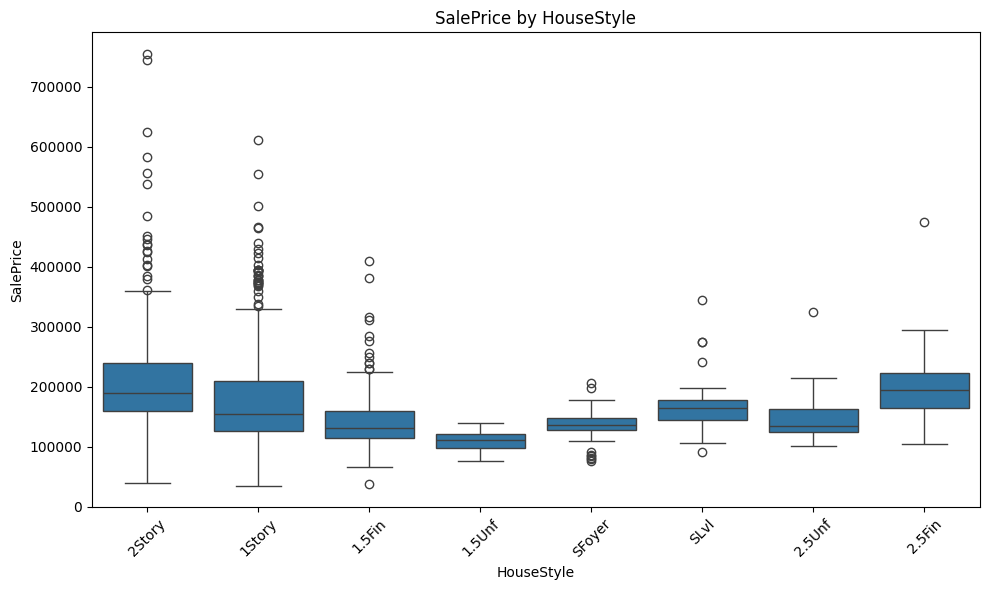

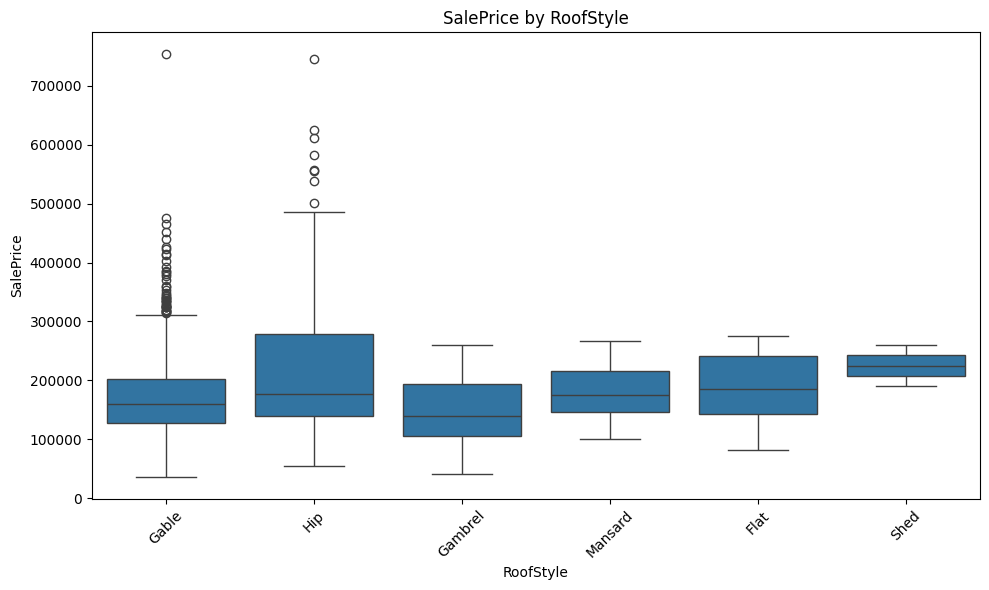

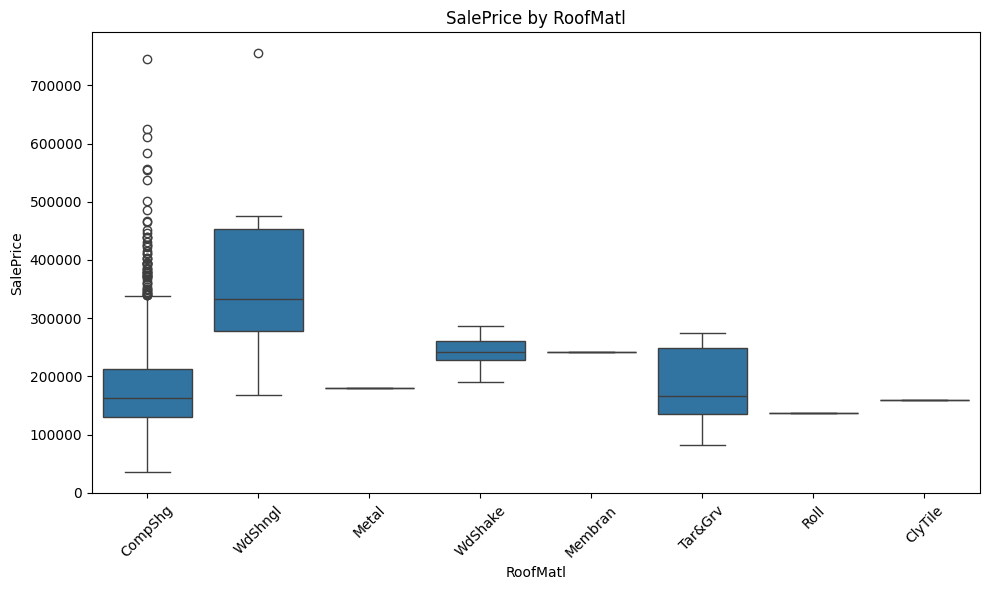

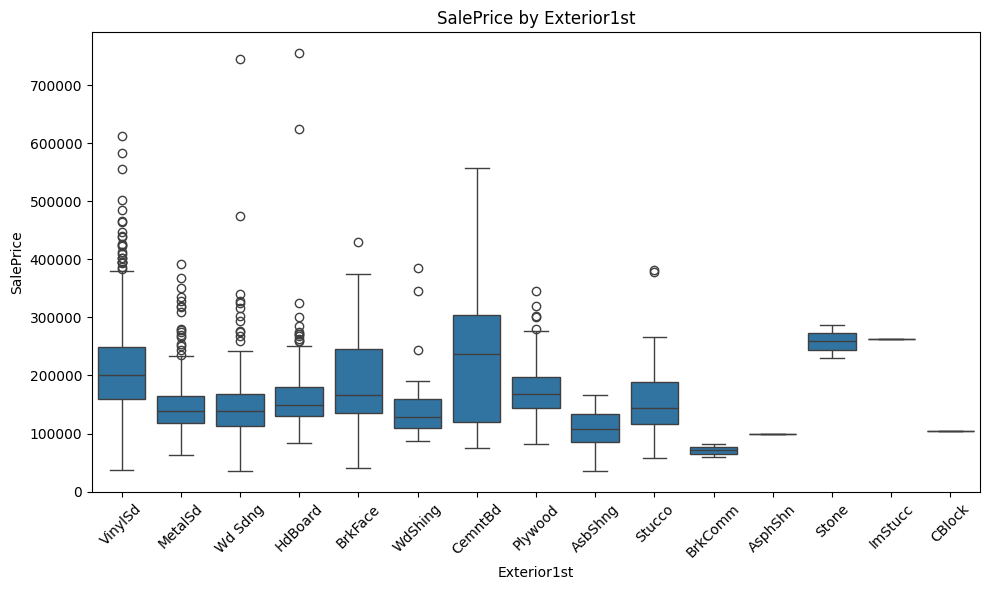

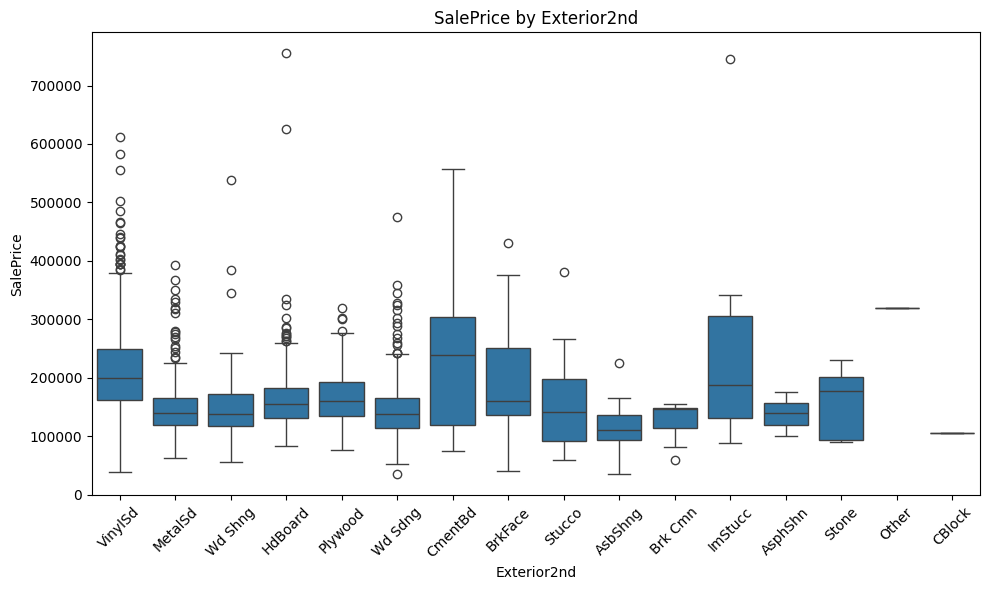

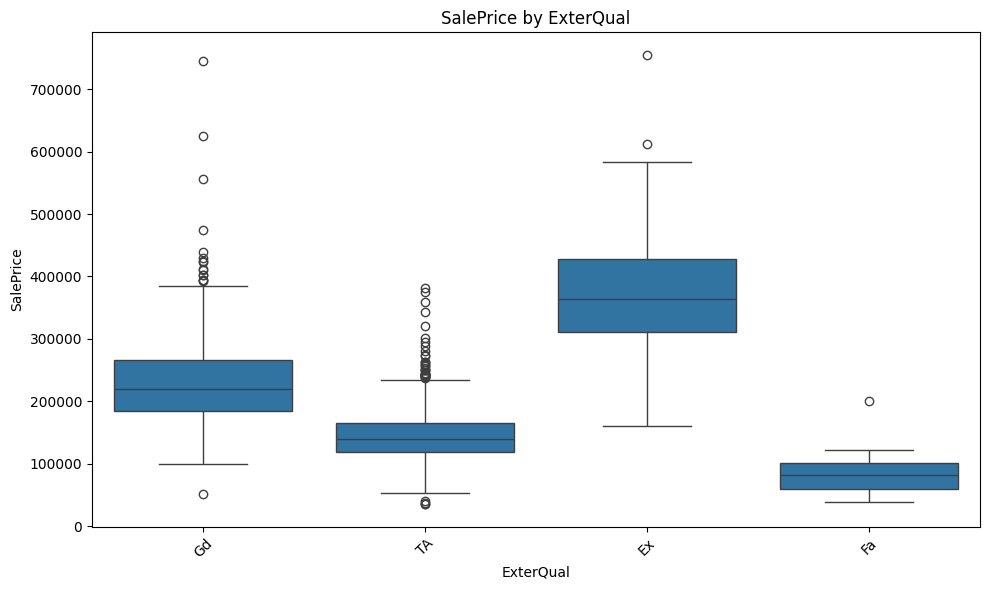

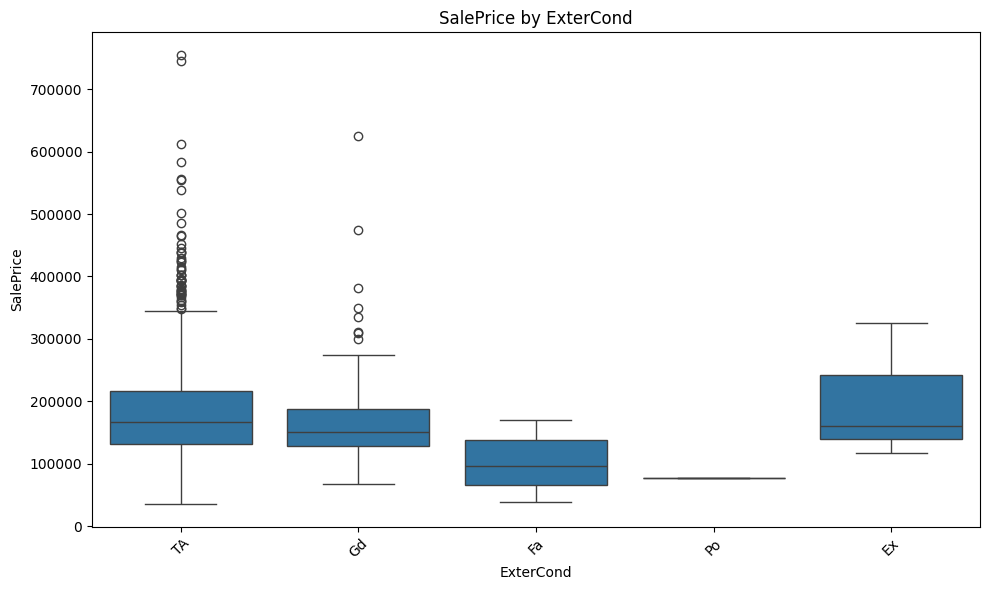

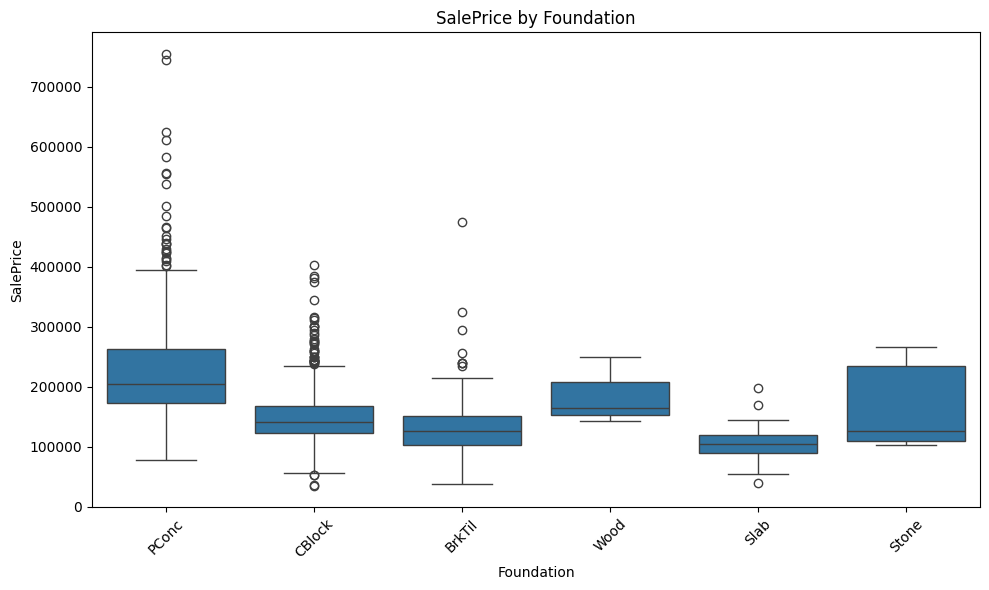

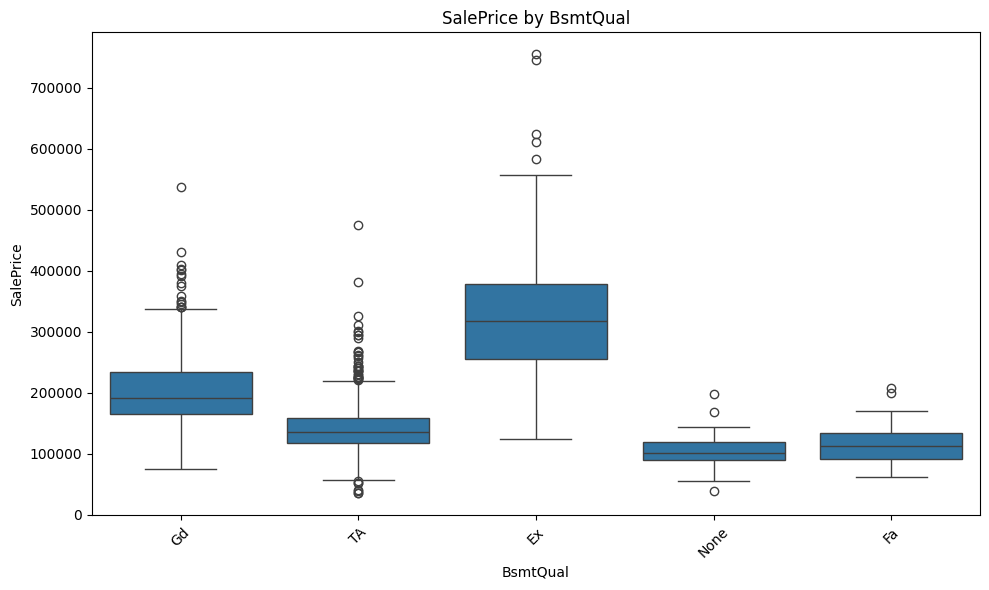

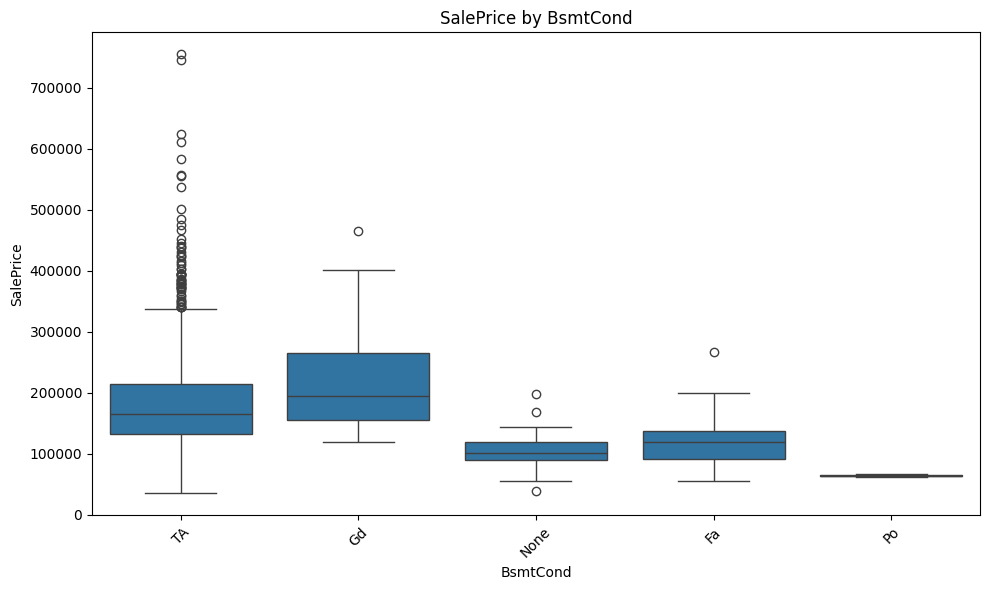

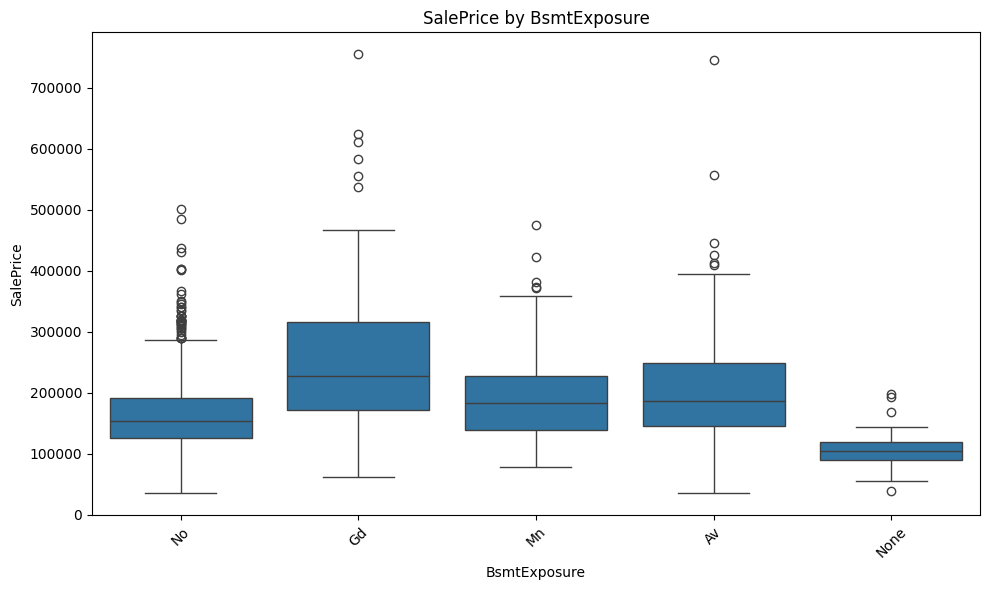

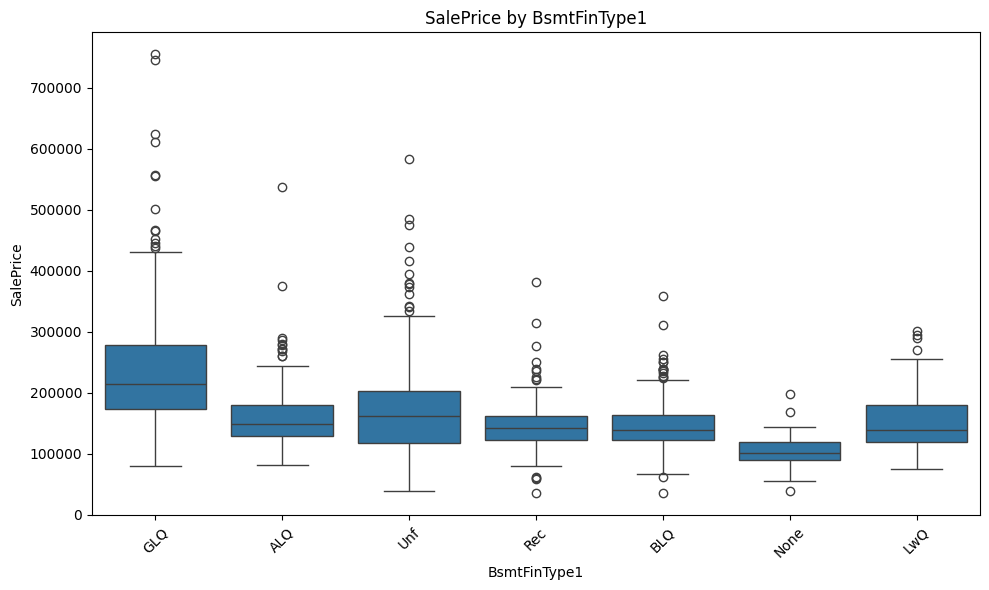

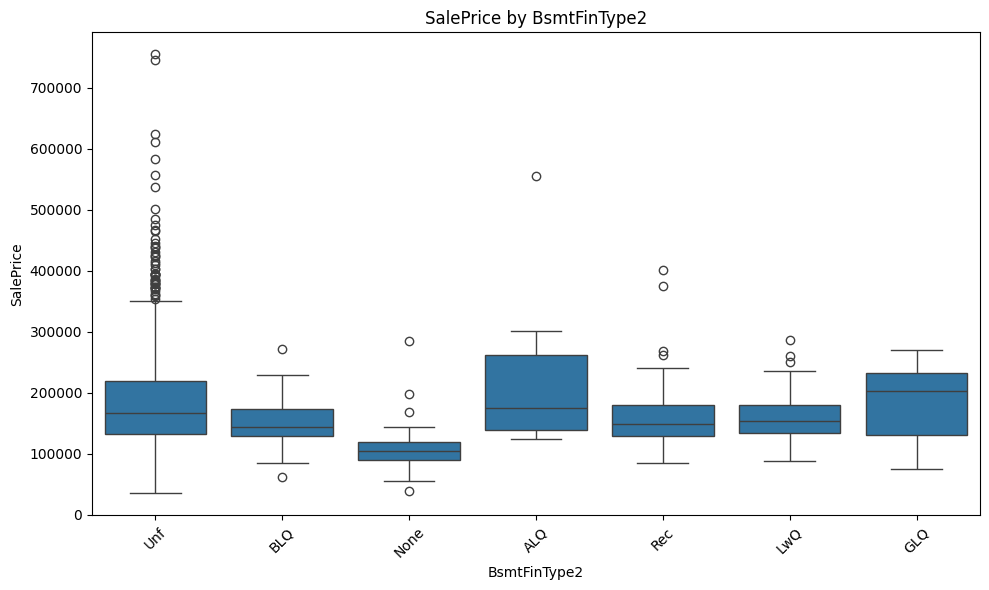

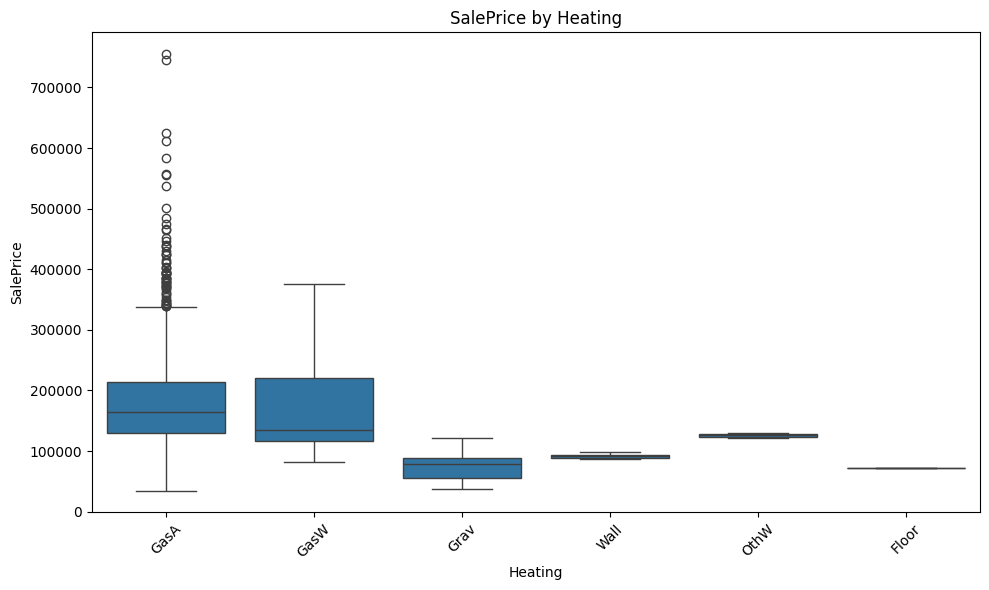

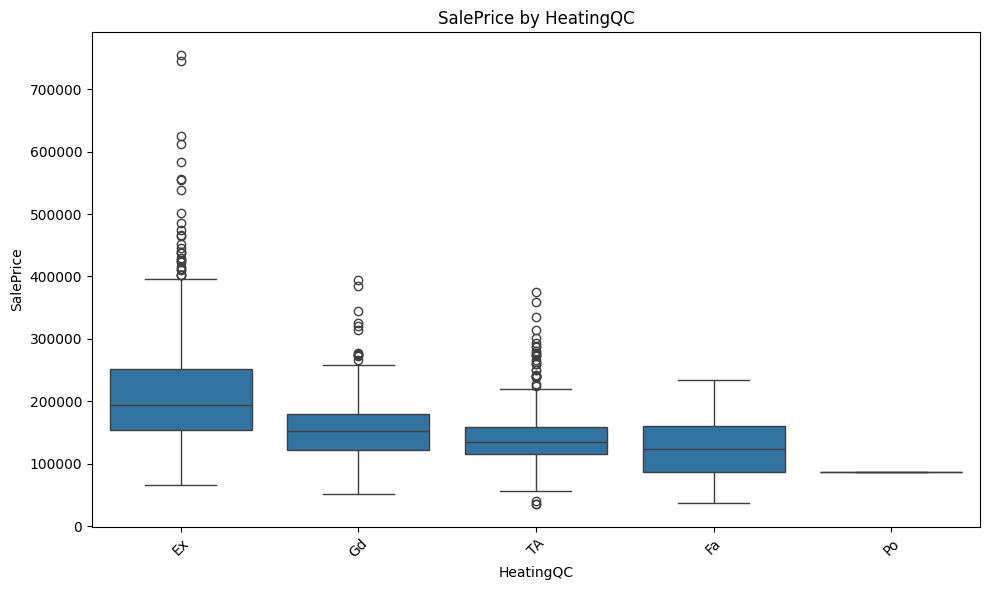

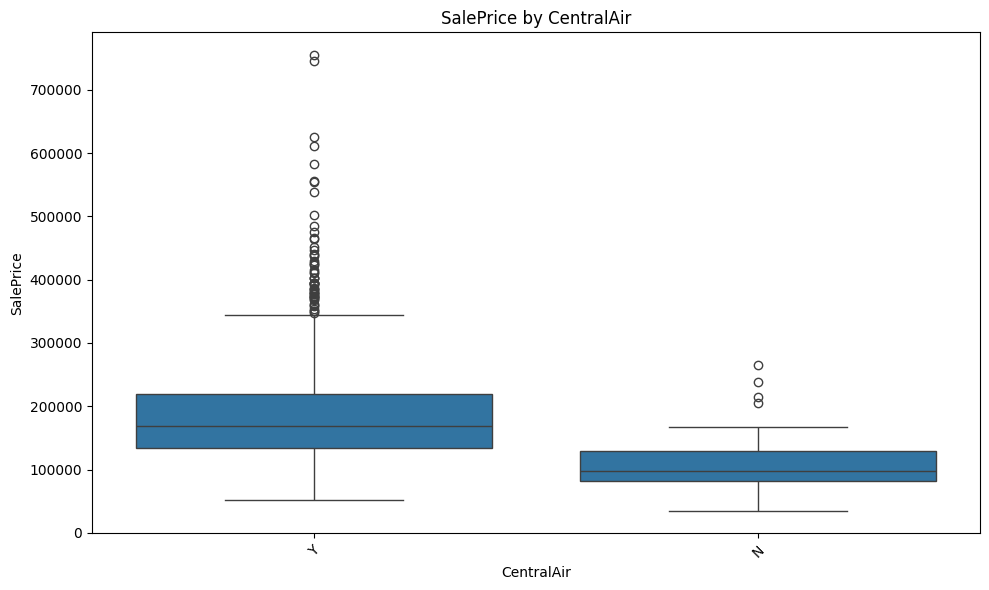

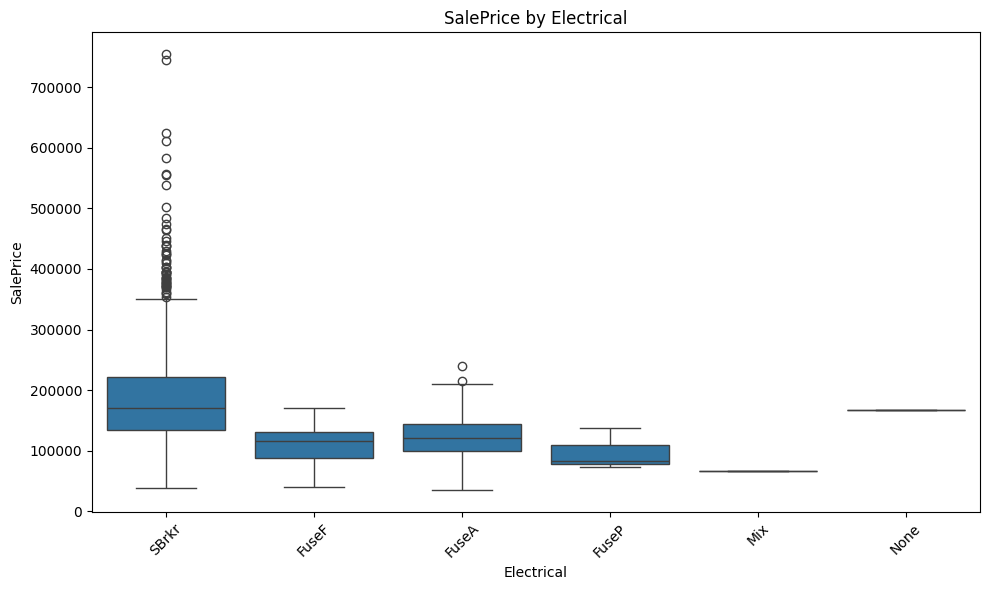

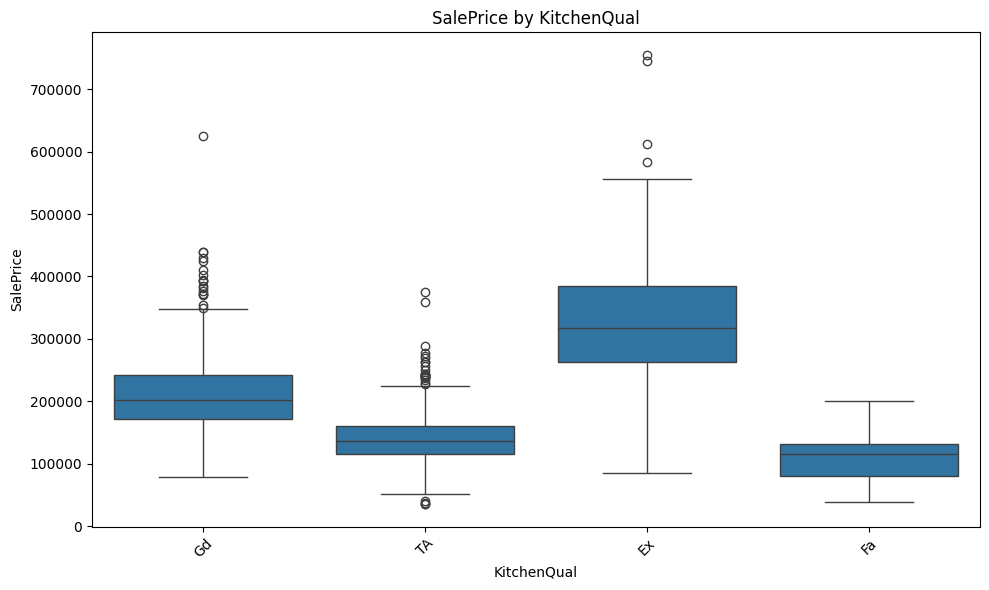

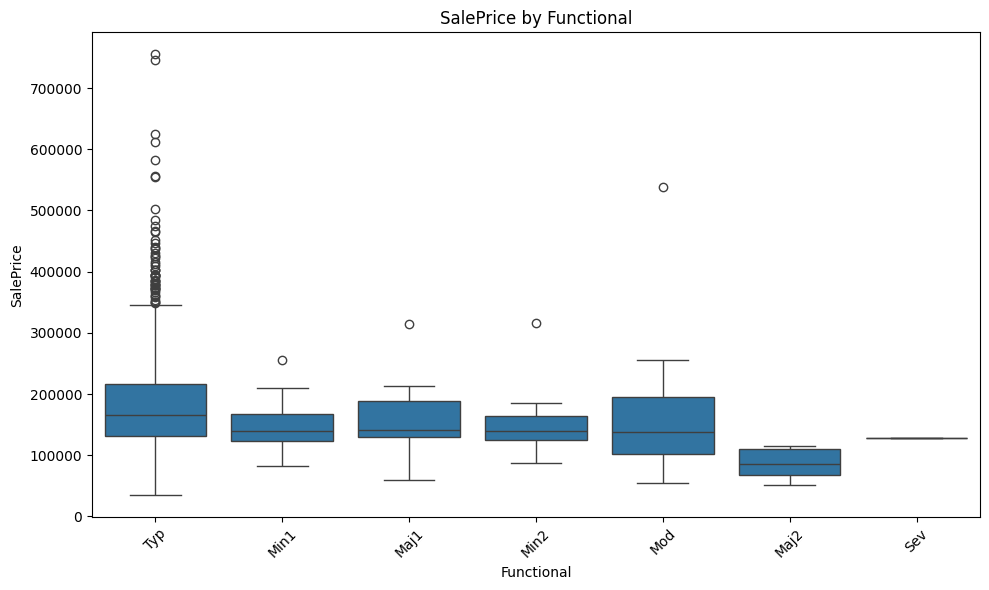

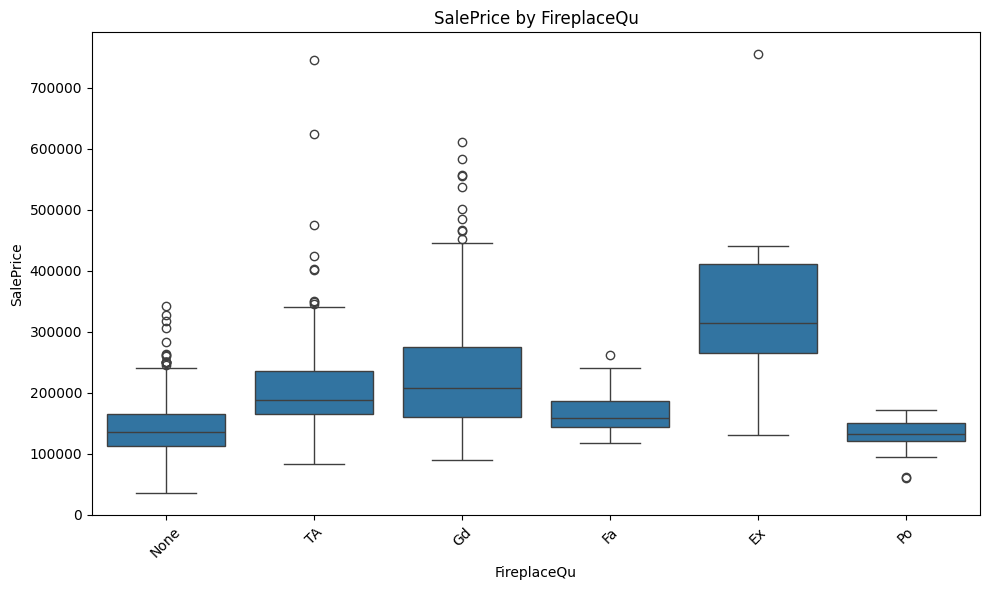

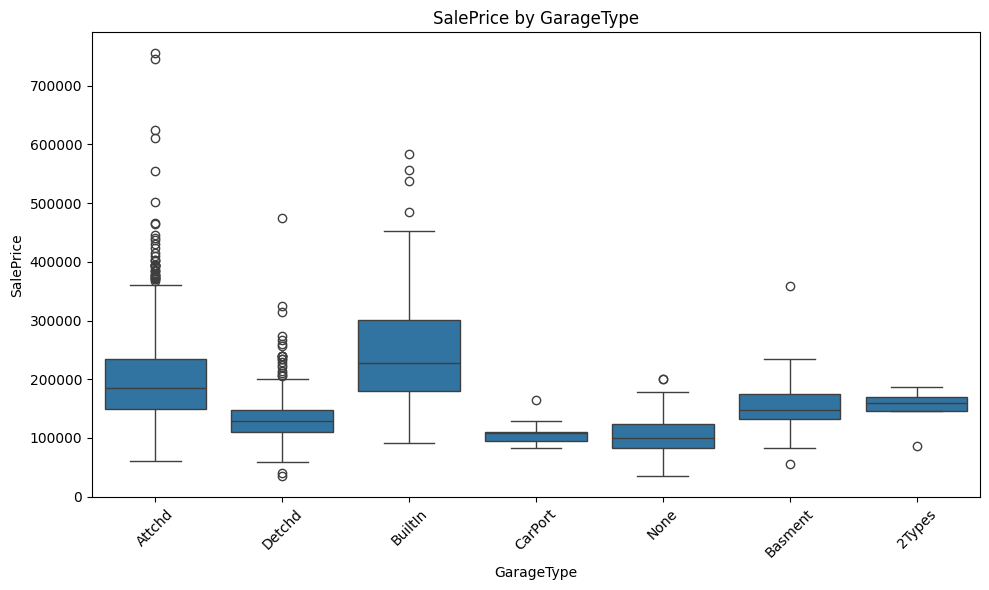

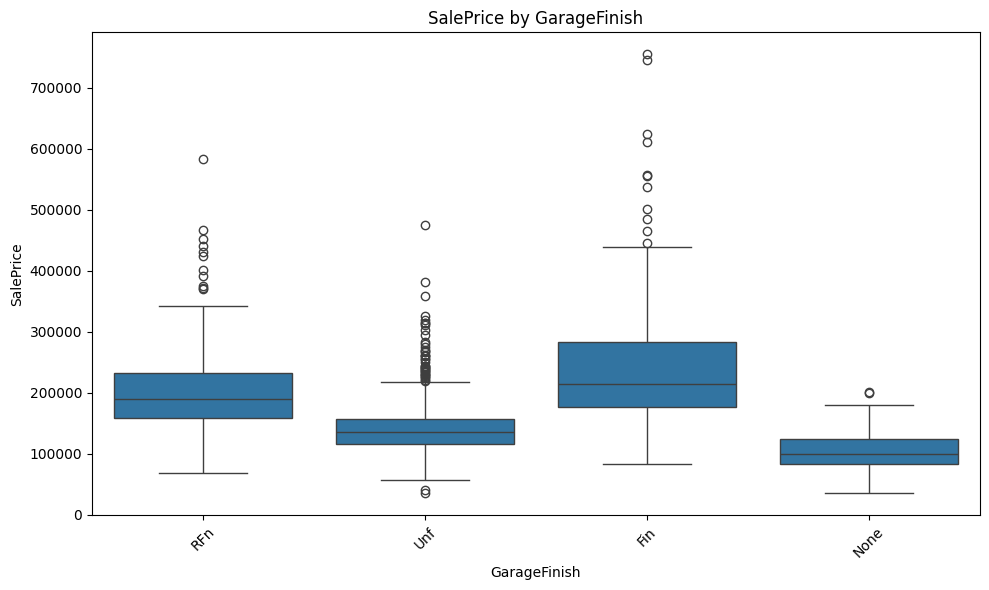

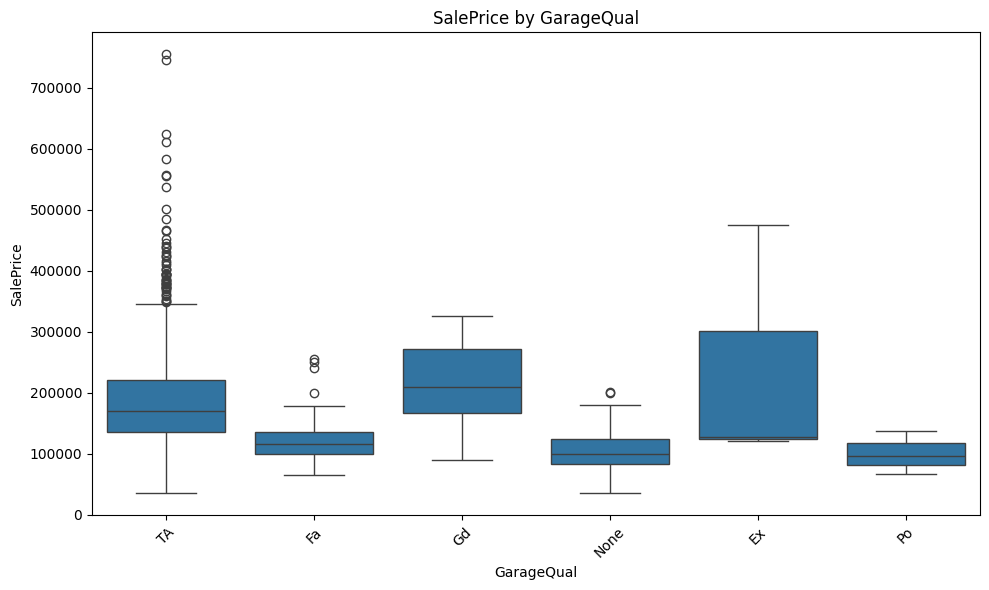

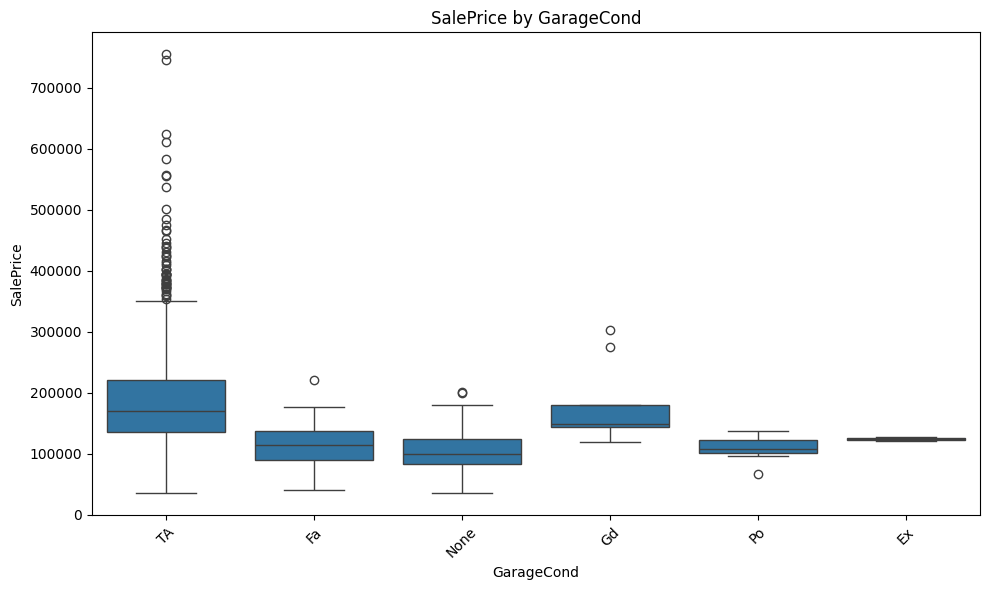

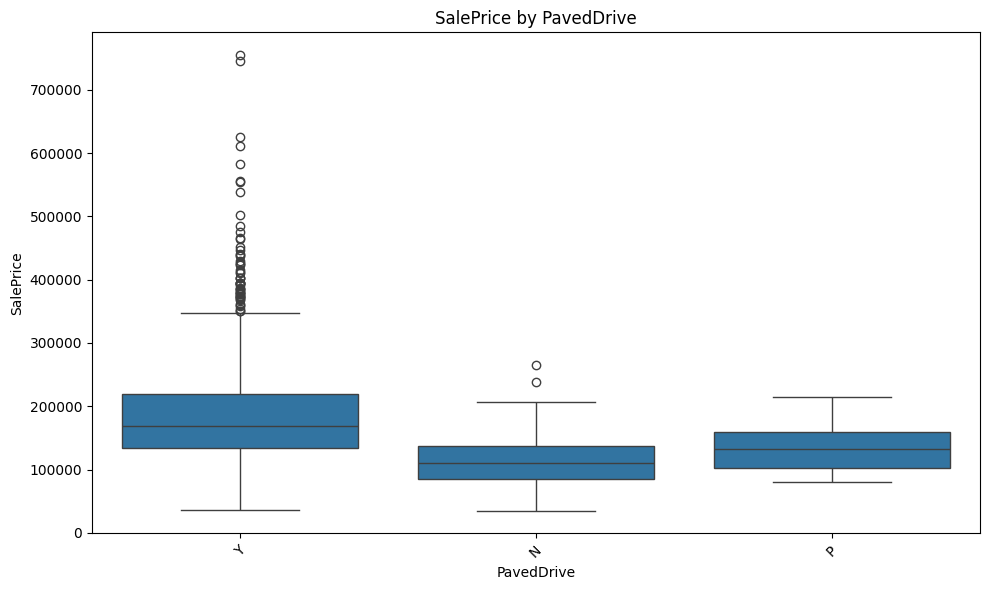

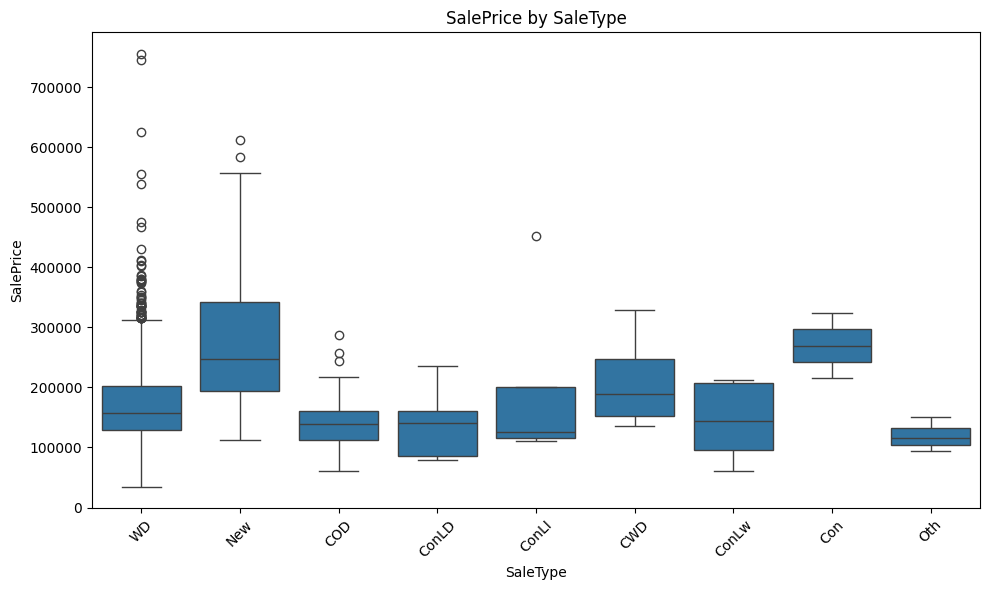

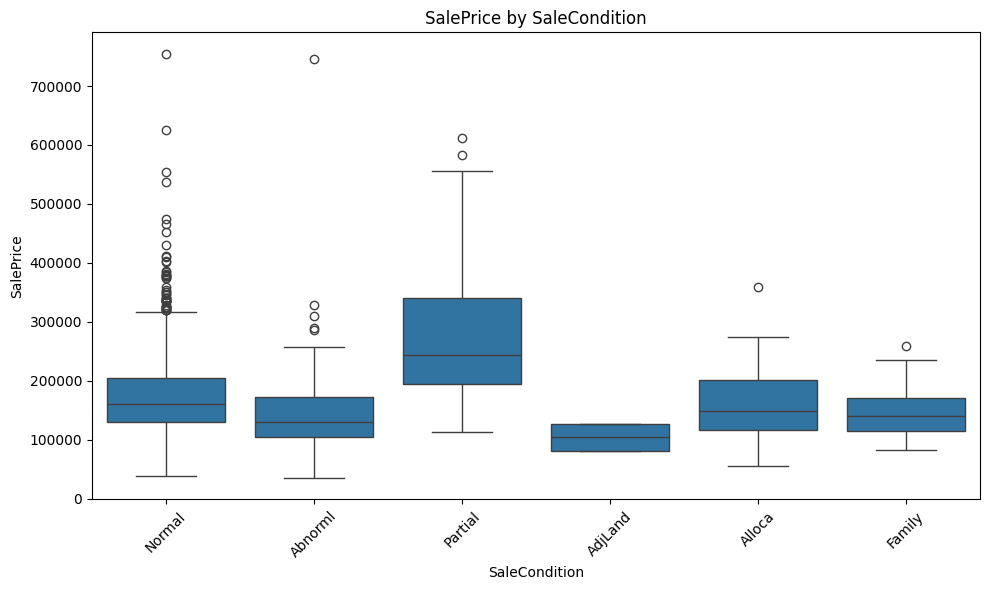

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 남아 있는 범주형 변수 목록
categorical_features = [
    'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
    'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
    'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
    'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'PavedDrive', 'SaleType', 'SaleCondition'
]

# 각 범주형 변수에 대해 SalePrice와의 관계 시각화
for feature in categorical_features:
    plt.figure(figsize=(10, 6))  # 각 그래프의 크기 설정
    sns.boxplot(x=feature, y='SalePrice', data=dataset_df)
    plt.title(f'SalePrice by {feature}')
    plt.xticks(rotation=45)  # x축 레이블 회전
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.tight_layout()  # 레이아웃 최적화
    plt.show()

팀원들과 토론을 통해 약 4가지로 그룹 분류하여 세부내용을 분석할 예정

1. 부동산 기본 특성
수치형 변수:
LotFrontage: 부동산과 연결된 도로 길이 (피트)
LotArea: 대지 크기 (평방 피트)
범주형 변수:
MSSubClass: 건물 유형
MSZoning: 일반적인 구역 분류
Street: 도로 접근 유형
LotShape: 대지의 일반적인 형태
LandContour: 대지의 평탄도
Utilities: 사용 가능한 유틸리티 종류
LotConfig: 대지 구성
LandSlope: 대지의 경사도
Neighborhood: Ames 시 경계 내 물리적 위치
Condition1: 주요 도로 또는 철도와의 인접성
Condition2: 주요 도로 또는 철도와의 인접성 (두 번째가 있을 경우)
2. 건물 및 실내 특성
수치형 변수:
OverallQual: 전반적인 자재 및 마감 품질
OverallCond: 전반적인 상태 평가
YearBuilt: 건축 연도
YearRemodAdd: 리모델링 연도
MasVnrArea: 석조 베니어 면적 (평방 피트)
BsmtFinSF1: 지하실 마감 면적 1 (평방 피트)
BsmtFinSF2: 지하실 마감 면적 2 (평방 피트)
BsmtUnfSF: 지하실 비마감 면적 (평방 피트)
TotalBsmtSF: 총 지하실 면적 (평방 피트)
1stFlrSF: 1층 면적 (평방 피트)
2ndFlrSF: 2층 면적 (평방 피트)
LowQualFinSF: 저품질 마감 면적 (평방 피트)
GrLivArea: 지상 생활 공간 면적 (평방 피트)
BsmtFullBath: 지하실 전체 욕실 개수
BsmtHalfBath: 지하실 반 욕실 개수
FullBath: 전체 욕실 개수
HalfBath: 반 욕실 개수
BedroomAbvGr: 지상층 침실 수
KitchenAbvGr: 지상층 주방 수
TotRmsAbvGrd: 지상층 방의 총 개수
범주형 변수:
BldgType: 주거 유형
HouseStyle: 주거 스타일
RoofStyle: 지붕 유형
RoofMatl: 지붕 재질
Exterior1st: 외장 재료
Exterior2nd: 외장 재료 (두 번째 재료가 있을 경우)
ExterQual: 외장 재질 품질
ExterCond: 외장 상태
Foundation: 기초 유형
BsmtQual: 지하실 품질
BsmtCond: 지하실 상태
BsmtExposure: 지하실 노출 여부
BsmtFinType1: 지하실 마감 유형 1
BsmtFinType2: 지하실 마감 유형 2
Heating: 난방 유형
HeatingQC: 난방 품질 및 상태
CentralAir: 중앙 에어컨 설치 여부
Electrical: 전기 시스템
KitchenQual: 주방 품질
Functional: 주택 기능성 평가
3. 추가 시설 및 외부 공간
수치형 변수:
GarageYrBlt: 차고 건축 연도
GarageCars: 차고 크기 (차량 수용량)
GarageArea: 차고 면적 (평방 피트)
WoodDeckSF: 목재 데크 면적 (평방 피트)
OpenPorchSF: 오픈된 현관 면적 (평방 피트)
EnclosedPorch: 밀폐된 현관 면적 (평방 피트)
3SsnPorch: 3계절용 현관 면적 (평방 피트)
ScreenPorch: 스크린 현관 면적 (평방 피트)
PoolArea: 수영장 면적 (평방 피트)
MiscVal: 기타 특성의 가치 (달러)
범주형 변수:
FireplaceQu: 벽난로 품질
GarageType: 차고 위치
GarageFinish: 차고 내부 마감
GarageQual: 차고 품질
GarageCond: 차고 상태
PavedDrive: 포장된 진입로 여부
4. 거래 정보
수치형 변수:
MoSold: 판매된 달
YrSold: 판매된 연도
SalePrice: 판매 가격 (목표 변수)
범주형 변수:
SaleType: 판매 유형
SaleCondition: 판매 조건

2&4번 분석

# 2.**주택** 및 건축 특성 그룹화
## 숫자형 변수


In [ ]:
# 각 열의 결측치 개수 확인
missing_values = dataset_df.isnull().sum()

# 결측치가 있는 열만 출력
print(missing_values[missing_values > 0])

Series([], dtype: int64)


       OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean      6.099315     5.575342  1971.267808   1984.865753   103.685262   
std       1.382997     1.112799    30.202904     20.645407   180.569112   
min       1.000000     1.000000  1872.000000   1950.000000     0.000000   
25%       5.000000     5.000000  1954.000000   1967.000000     0.000000   
50%       6.000000     5.000000  1973.000000   1994.000000     0.000000   
75%       7.000000     6.000000  2000.000000   2004.000000   164.250000   
max      10.000000     9.000000  2010.000000   2010.000000  1600.000000   

        BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    443.639726    46.549315   567.240411  1057.429452  1162.626712   
std     456.098091   161.319273   441.866955   438.705324   386.587738   
min       0.000000     0.000

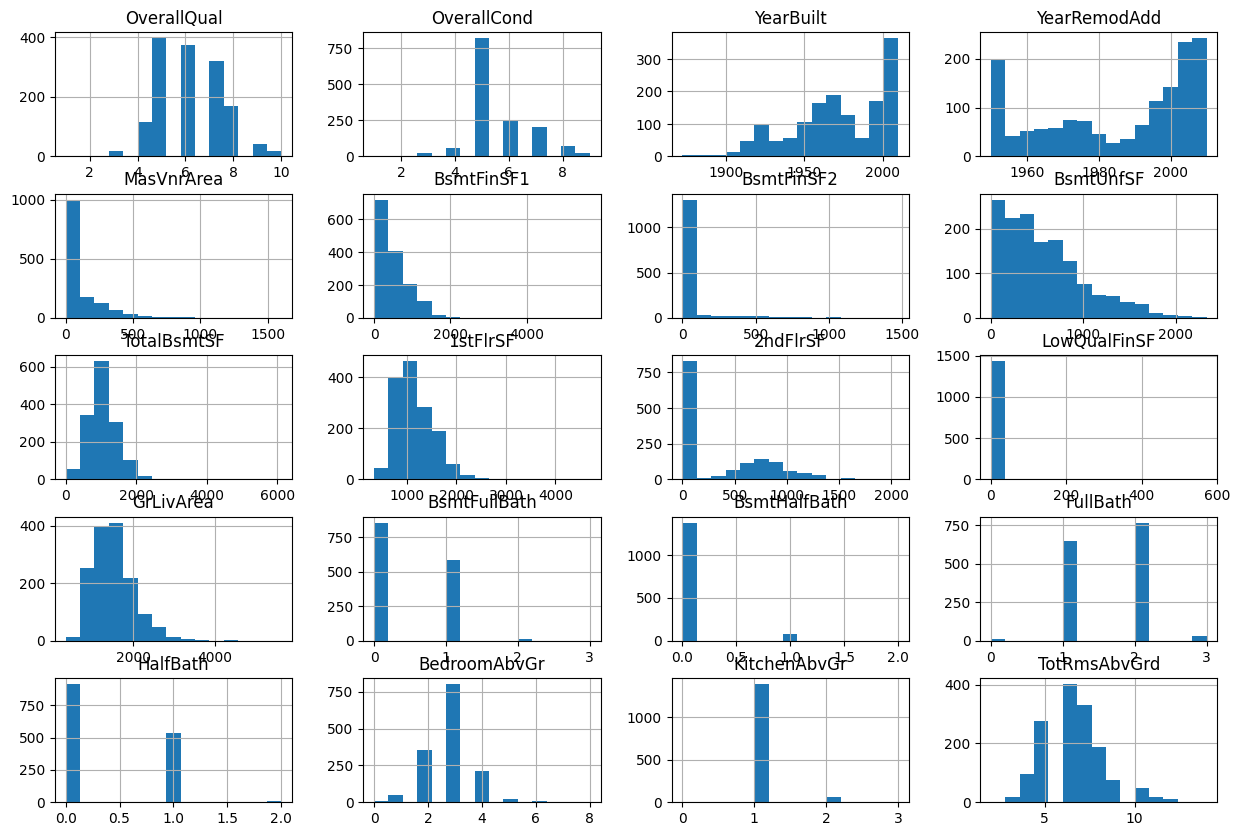

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 분석할 숫자형 변수 목록
num_columns = [
    'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
    'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd'
]
# 해당 열들에 대해 describe() 출력
print(dataset_df[num_columns].describe())

# 히스토그램 생성
dataset_df[num_columns].hist(bins=15, figsize=(15, 10))
plt.show()




OverallQual (전반적인 품질 평가):

평균 값이 6.1로, 대체로 품질이 괜찮은 편입니다.
1~10 사이의 범위에서 평가되며, 최대 10, 최소 1입니다.
중간값(50%)이 6으로, 절반 이상의 주택은 품질 평가가 6 이상입니다.
OverallCond (전반적인 상태 평가):

평균이 5.57로, 주택의 전반적인 상태는 중간 이상입니다.
최소 1, 최대 9까지의 범위를 가지며, 중간값은 5로, 대체로 보통 상태임을 나타냅니다.
YearBuilt (건축 연도):

평균 건축 연도는 1971년으로, 다소 오래된 주택들이 많음을 알 수 있습니다.
최소값은 1872년으로 매우 오래된 주택도 포함되어 있습니다.
25% 이상의 주택이 1954년 이전에 건축된 반면, 상위 25%는 2000년 이후에 건축되었습니다.
YearRemodAdd (리모델링 연도):

평균 리모델링 연도는 1984년입니다.
최소 1950년, 최대 2010년으로, 리모델링이 오래전에 이루어진 경우도 있지만 최근에 이루어진 경우도 많습니다.
MasVnrArea (벽돌 외장 면적):

평균 외장 면적은 103.69㎡이지만, 표준편차가 180.57로 변동성이 큽니다.
최소값이 0인 경우가 많아 외장을 하지 않은 주택들도 많습니다(25%와 50% 값이 모두 0).
BsmtFinSF1 (지하 1층 완공 면적):

평균 443.64㎡이며, 일부 큰 지하 공간을 가진 집들이 있음을 알 수 있습니다.
25%의 주택은 지하가 완공되지 않았습니다(0㎡).
BsmtFinSF2 (지하 2층 완공 면적):

평균 46.55㎡로, 대부분의 주택에서 지하 2층은 거의 완공되지 않았습니다(50%가 0㎡).
TotalBsmtSF (지하 총 면적):

평균 1057.43㎡로, 지하 공간이 잘 활용된 주택들이 많습니다.
상위 25%는 지하가 약 1300㎡ 이상으로 큰 공간을 가지고 있습니다.
1stFlrSF (1층 면적):

평균 1162.63㎡, 1층 면적이 비교적 넓은 주택들이 많습니다.
최대 4692㎡로 매우 큰 집들도 포함됩니다.
2ndFlrSF (2층 면적):

평균 346.99㎡, 2층 면적을 가진 집들도 있지만, 50% 이상의 집은 2층이 없음을 보여줍니다(50% 값이 0).
GrLivArea (지상 생활 공간 면적):

평균 1515.46㎡로 넓은 생활 공간을 가진 주택들이 많습니다.
상위 25%는 1776㎡ 이상의 넓은 주택들입니다.
BsmtFullBath (지하 풀 욕실 개수):

평균 0.43개로 지하에 욕실을 갖춘 집이 적지만, 일부 주택은 최대 3개의 욕실을 가지고 있습니다.
FullBath (풀 욕실 개수):

평균 1.57개로 2개 이상의 욕실을 갖춘 집들이 많습니다.
HalfBath (반 욕실 개수):

평균 0.38개로 반 욕실이 거의 없는 집들이 많습니다.
BedroomAbvGr (지상 침실 개수):

평균 2.87개로 침실이 3개 이상인 집들이 많습니다.
KitchenAbvGr (지상 주방 개수):

평균이 1.05로, 대부분의 집은 주방이 1개입니다.
TotRmsAbvGrd (지상 방 개수):

평균 6.52개로, 상위 25%는 방이 7개 이상인 집들이 많습니다.
전반적인 분석 요약
대부분의 집들은 보통에서 우수한 품질과 상태를 가지며, 1층과 지하의 생활 공간이 넓은 경향이 있습니다.
주택들의 건축 연도는 다양하지만, 리모델링을 통해 비교적 최근에 개조된 경우도 많습니다.
일부 주택들은 2층 면적이 넓고, 큰 거실 공간을 가지고 있습니다.

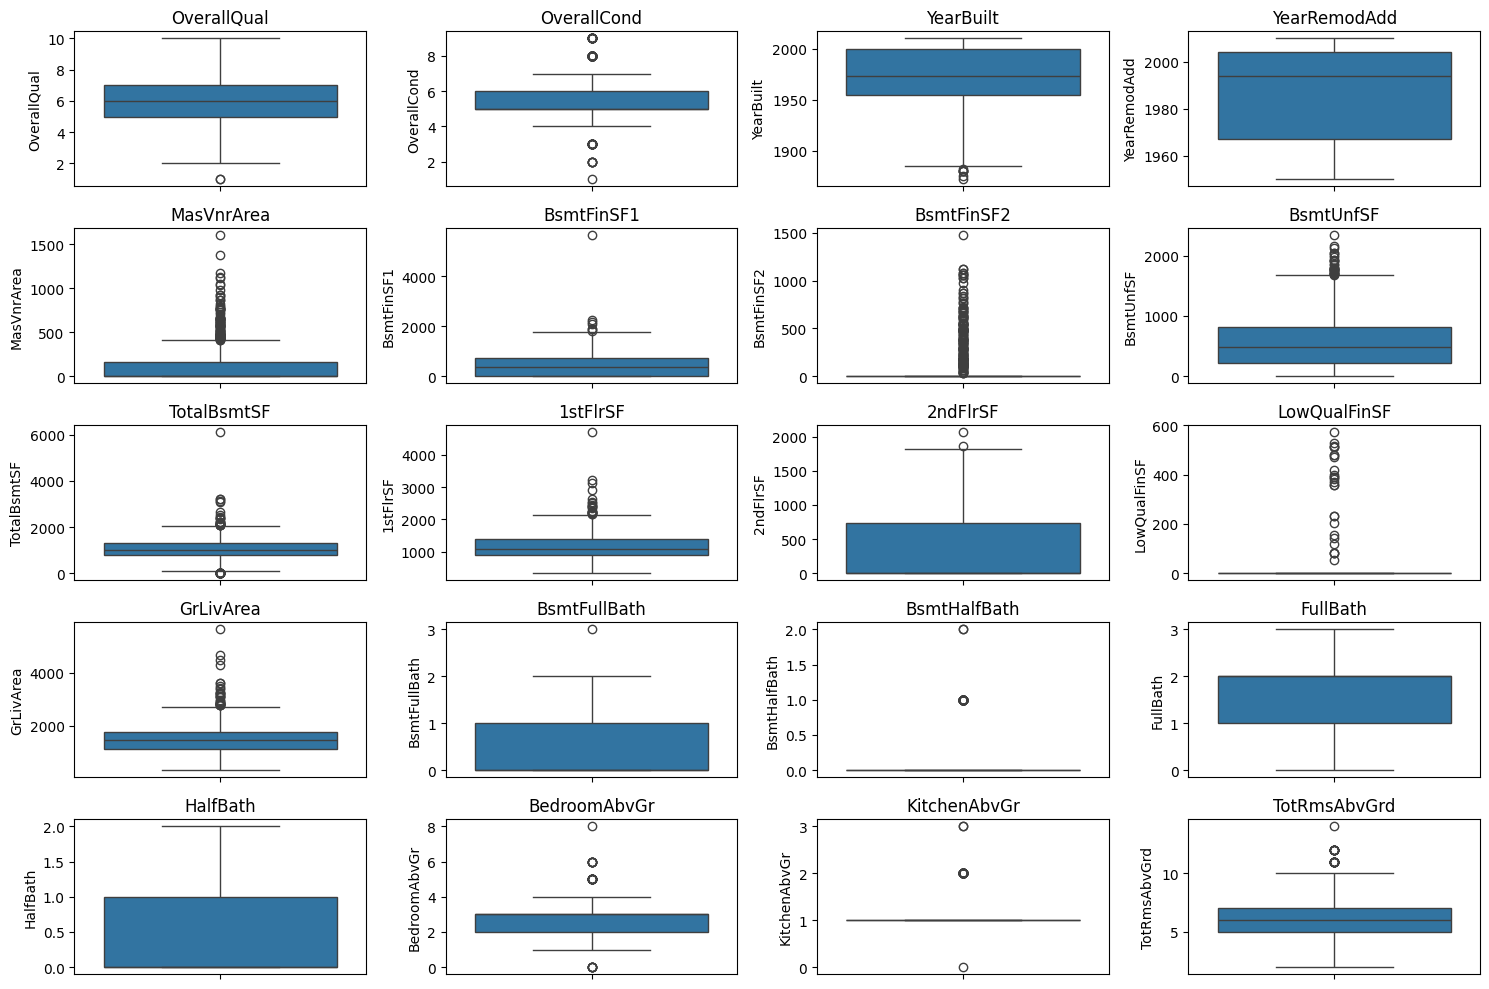

In [ ]:
# 박스플롯 생성
plt.figure(figsize=(15, 10))
for i, column in enumerate(num_columns, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(data=dataset_df, y=column)
    plt.title(column)
plt.tight_layout()
plt.show()

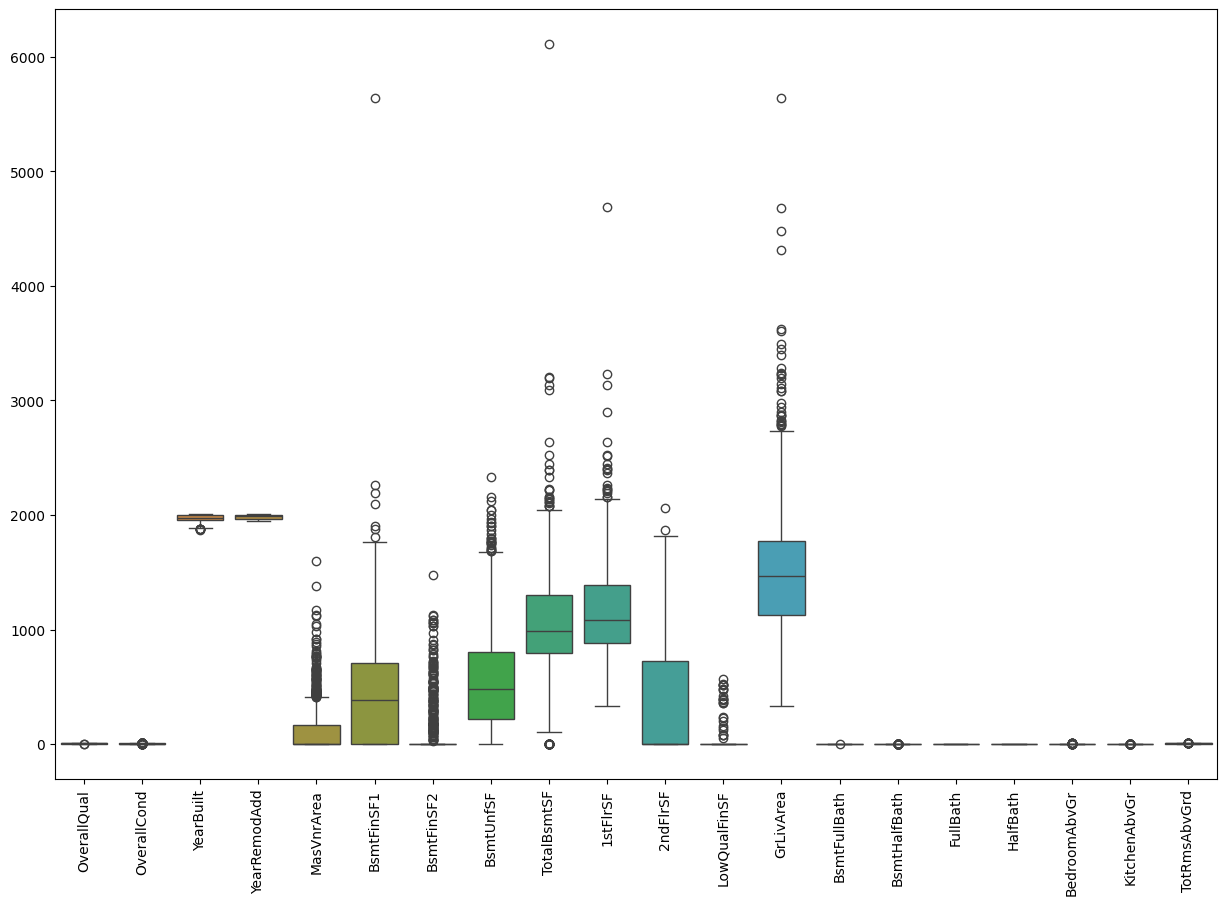

In [ ]:
# 박스 플롯
plt.figure(figsize=(15, 10))
sns.boxplot(data=dataset_df[num_columns])
plt.xticks(rotation=90)
plt.show()

### 이상치 제거
- 기준: 범위가 넓고, 최대값과 평균 값이 크게 차이 나는 경우

import pandas as pd

# 분석할 숫자형 변수 목록
num_columns = [
    'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
    'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd'
]

# IQR을 통한 이상치 탐지 및 제거 함수
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # 1사분위수
        Q3 = df[col].quantile(0.75)  # 3사분위수
        IQR = Q3 - Q1  # IQR 계산
        lower_bound = Q1 - 1.5 * IQR  # 아래 경계
        upper_bound = Q3 + 1.5 * IQR  # 위 경계
        
        # 이상치가 아닌 값들만 남김
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        
    return df

# 이상치 제거 후 새로운 데이터셋 생성
cleaned_dataset_df = remove_outliers_iqr(dataset_df, num_columns)

# 결과 확인
print(cleaned_dataset_df.describe())

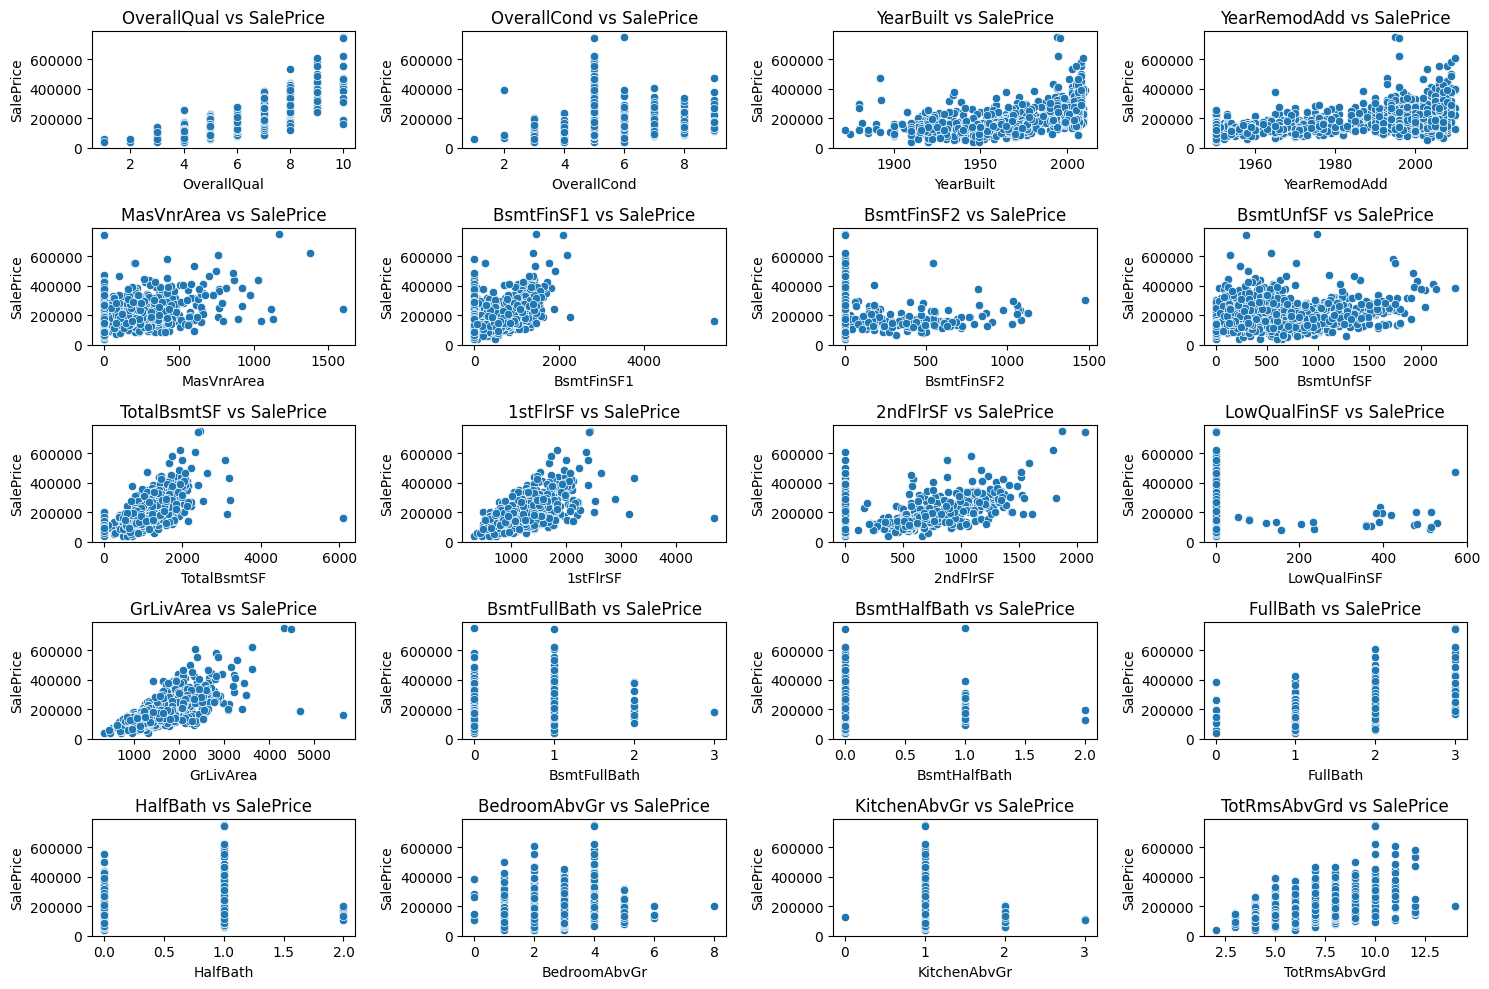

In [ ]:
# 산점도 그래프 생성 (SalePrice로 수정)
plt.figure(figsize=(15, 10))
for i, column in enumerate(num_columns, 1):
    plt.subplot(5, 4, i)
    sns.scatterplot(data=dataset_df, x=column, y='SalePrice')  # 'SalesPrice'에서 'SalePrice'로 수정
    plt.title(f'{column} vs SalePrice')
plt.tight_layout()
plt.show()

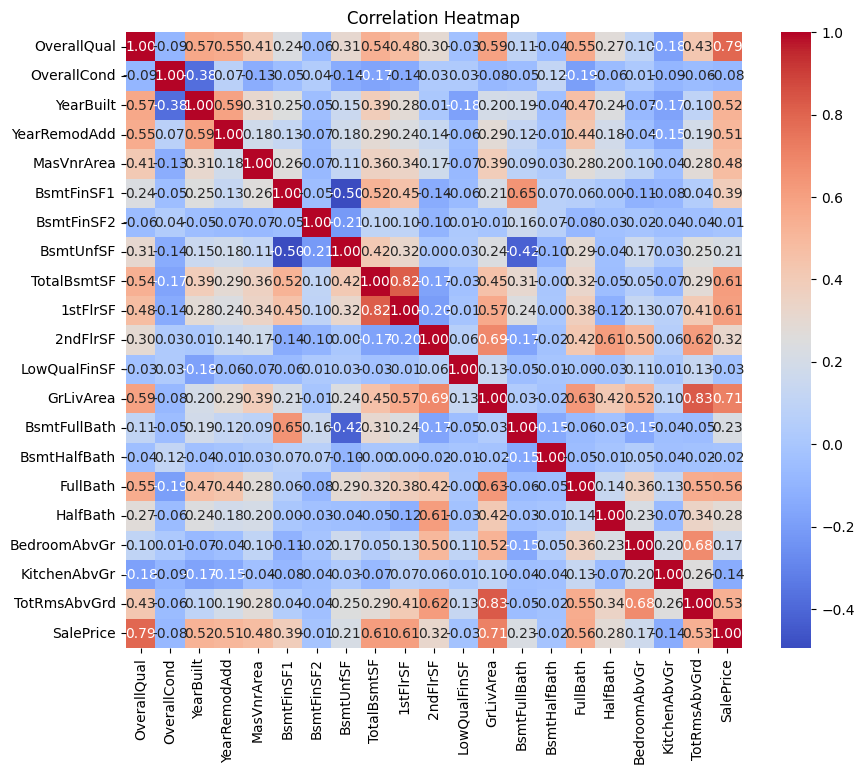

In [ ]:
# 상관 행렬 히트맵 생성
correlation_matrix = dataset_df[num_columns + ['SalePrice']].corr()  #

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# SalePrice와 다른 변수 간의 상관관계 계수 계산
correlation = dataset_df[num_columns + ['SalePrice']].corr()

# SalePrice와의 상관관계만 필터링하여 출력
sale_price_correlation = correlation['SalePrice'].sort_values(ascending=False)
# 소수점 둘째 자리로 반올림하여 출력
sale_price_correlation = sale_price_correlation.round(2)

# 결과 출력
print("SalePrice와의 상관관계 계수:")
print(sale_price_correlation)

SalePrice와의 상관관계 계수:
SalePrice       1.00
OverallQual     0.79
GrLivArea       0.71
TotalBsmtSF     0.61
1stFlrSF        0.61
FullBath        0.56
TotRmsAbvGrd    0.53
YearBuilt       0.52
YearRemodAdd    0.51
MasVnrArea      0.48
BsmtFinSF1      0.39
2ndFlrSF        0.32
HalfBath        0.28
BsmtFullBath    0.23
BsmtUnfSF       0.21
BedroomAbvGr    0.17
BsmtFinSF2     -0.01
BsmtHalfBath   -0.02
LowQualFinSF   -0.03
OverallCond    -0.08
KitchenAbvGr   -0.14
Name: SalePrice, dtype: float64


**최종 숫자형 변수 feature :**

| 변수명 (영어) | 변수명 (한국어) | 상관 관계 계수 |
| --- | --- | --- |
| OverallQual | 전반적인 자재 및 마감 품질 | 0.79 |
| GrLivArea | 지상 생활 공간 면적 | 0.71 |
| TotalBsmtSF | 총 지하실 면적 | 0.61 |
| 1stFlrSF | 1층 면적 | 0.61 |

이 네 변수는 `SalePrice`와의 상관 관계가 0.6 이상으로, 가격에 미치는 영향이 클 것으로 예상됨

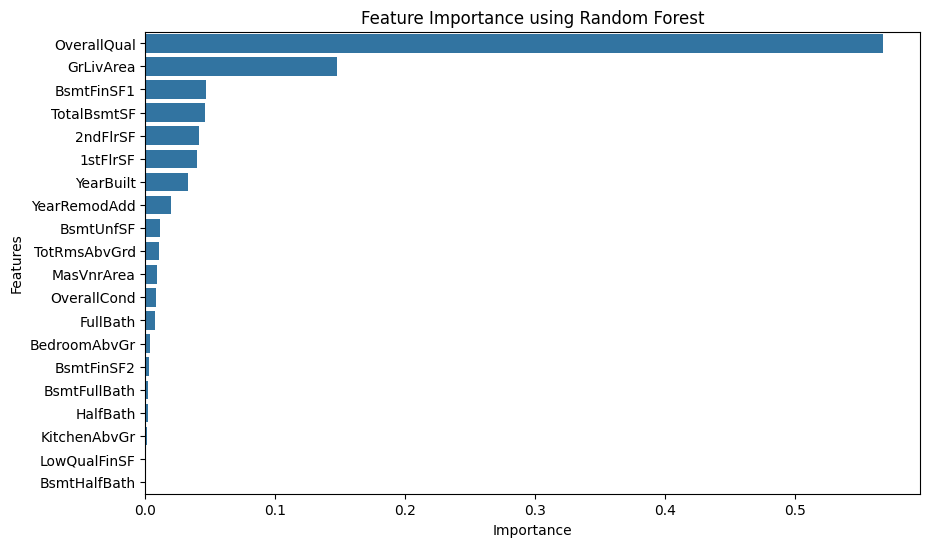

Feature Importance:
              Importance
OverallQual     0.568356
GrLivArea       0.147740
BsmtFinSF1      0.046661
TotalBsmtSF     0.046112
2ndFlrSF        0.041223
1stFlrSF        0.039783
YearBuilt       0.032521
YearRemodAdd    0.019518
BsmtUnfSF       0.011281
TotRmsAbvGrd    0.010182
MasVnrArea      0.008679
OverallCond     0.007906
FullBath        0.007245
BedroomAbvGr    0.003287
BsmtFinSF2      0.002730
BsmtFullBath    0.002382
HalfBath        0.002055
KitchenAbvGr    0.001589
LowQualFinSF    0.000412
BsmtHalfBath    0.000336


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터셋에서 독립 변수(X)와 종속 변수(y) 설정
X = dataset_df[num_columns]  # 독립 변수
y = dataset_df['SalePrice']   # 종속 변수

# 데이터 분할 (훈련/테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 생성 및 훈련
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 피처 중요도 추출
importances = rf_model.feature_importances_

# 피처 이름과 중요도를 데이터프레임으로 변환
feature_importances = pd.DataFrame(importances, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

# 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['Importance'], y=feature_importances.index)
plt.title('Feature Importance using Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# 중요도 출력
print("Feature Importance:")
print(feature_importances)

OverallQual이 가장 높은 중요도를 보임

총 하기 가지 변수 선택
OverallQual(전반적인 자재 및 마감 품질), GrLivArea (지상 생활 공간 면적), TotalBsmtSF(총 지하실 면적), 1stFlrSF(1층 면적)

# 2.**주택** 및 건축 특성 그룹화
## 범주형 변수

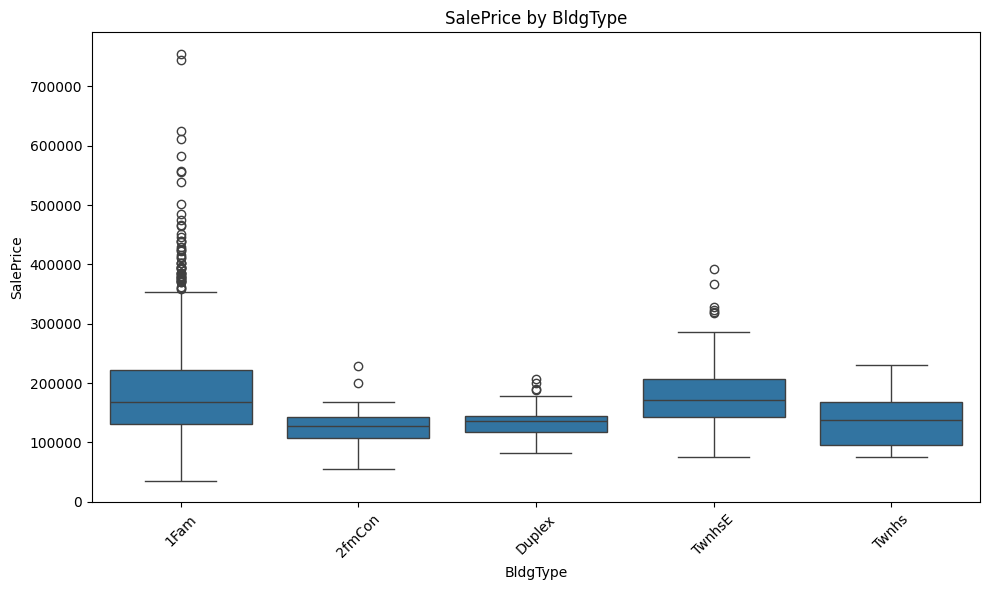

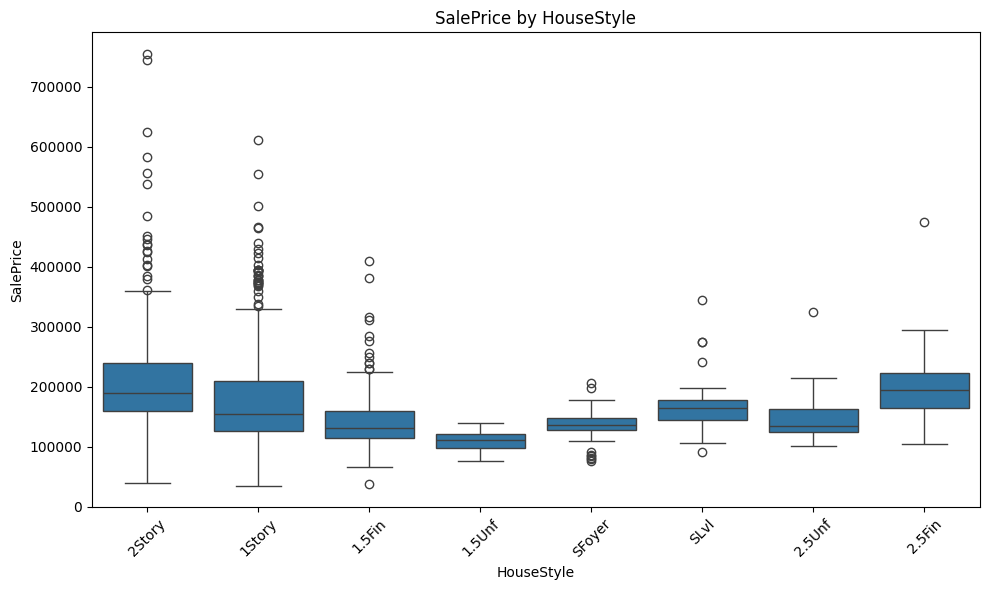

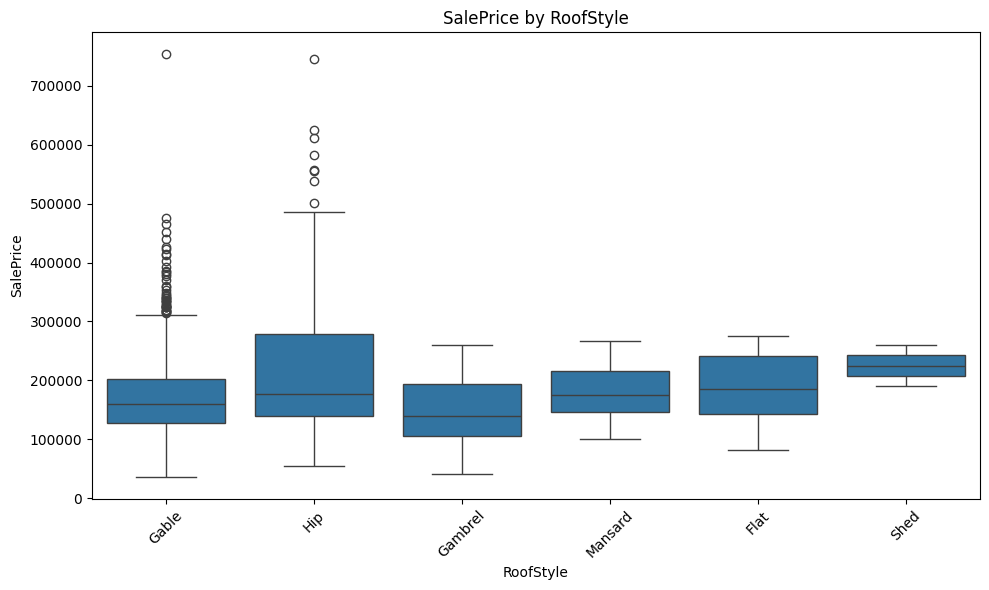

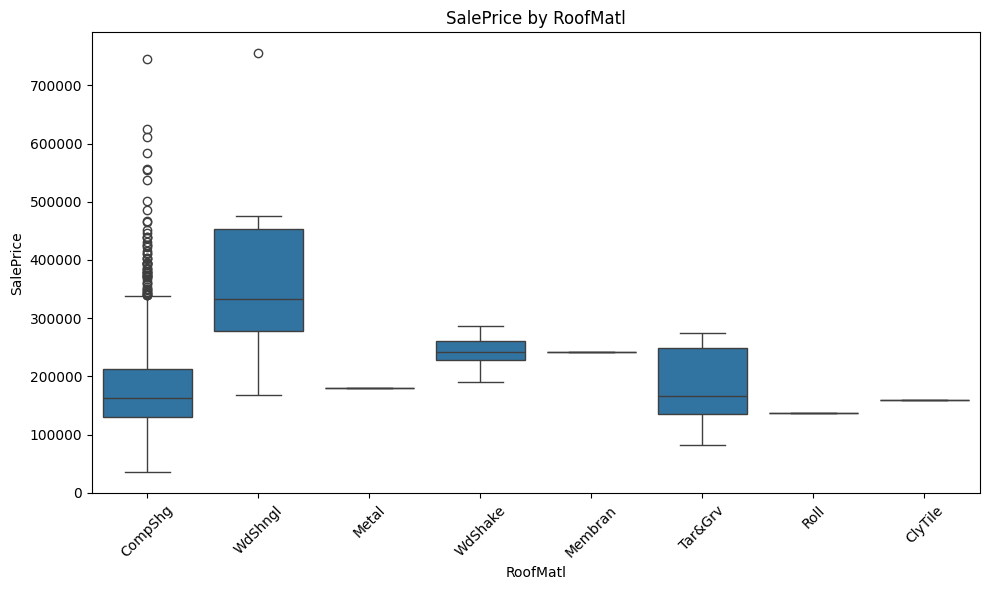

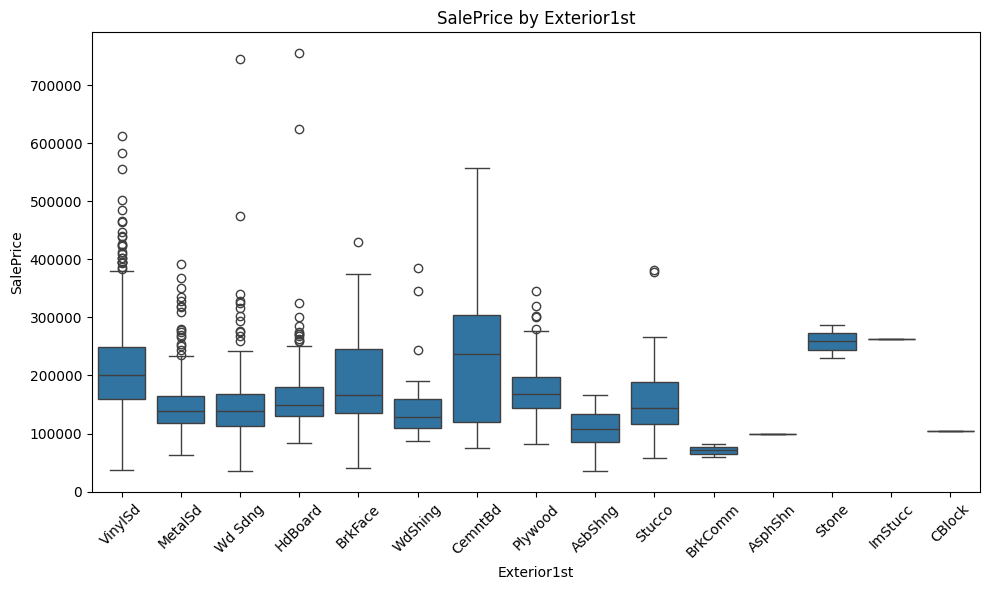

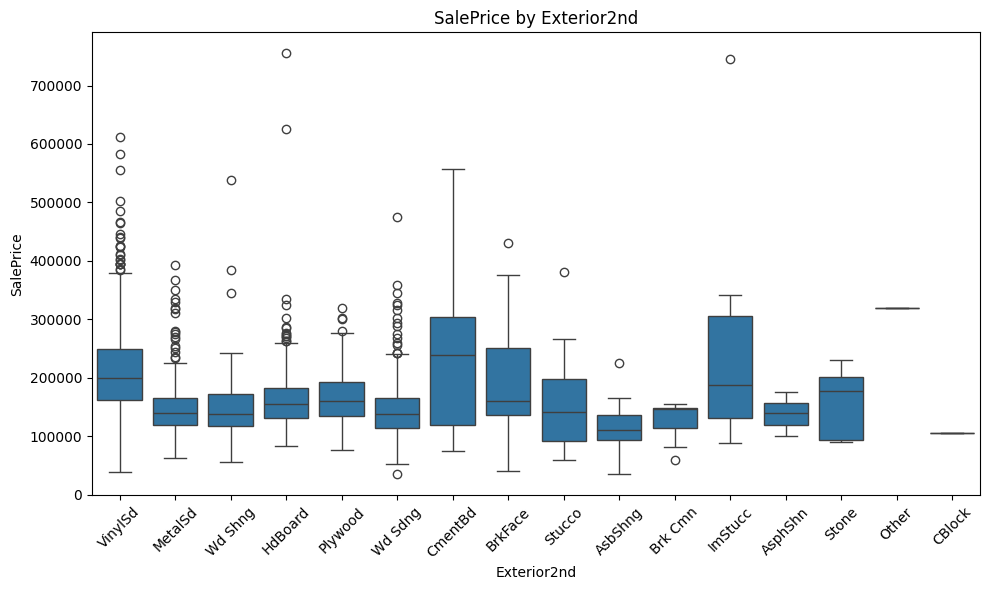

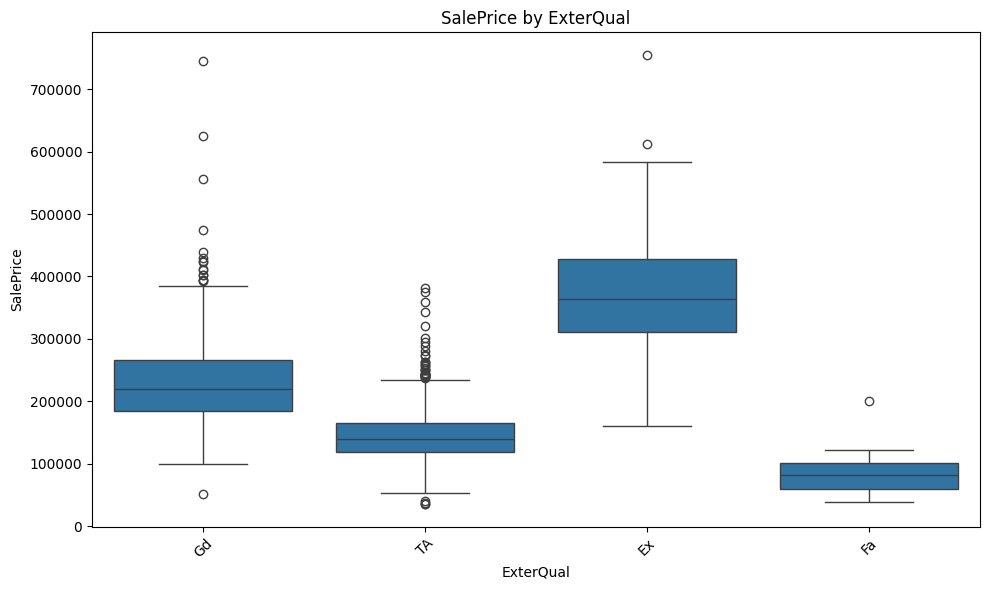

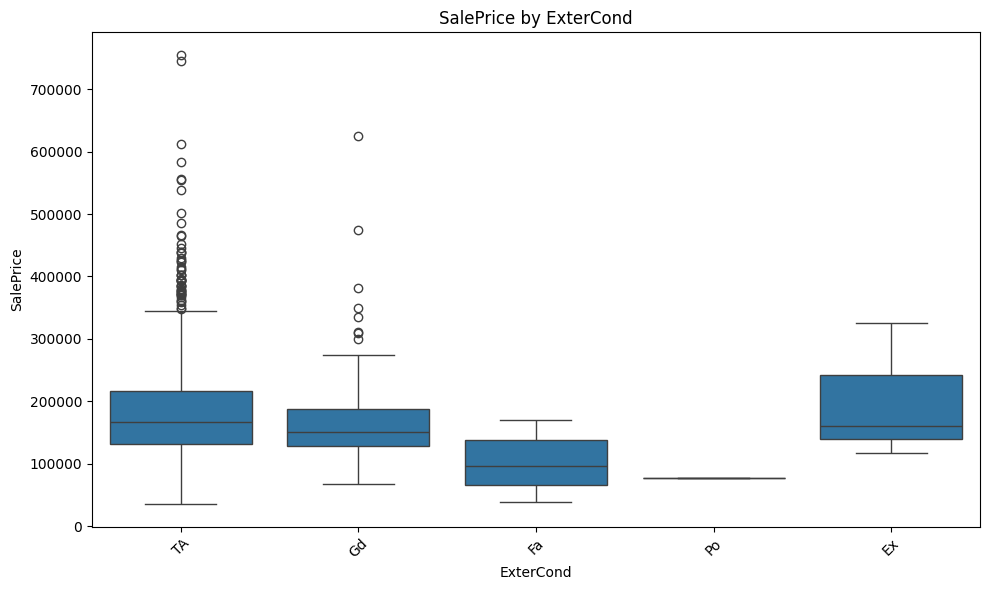

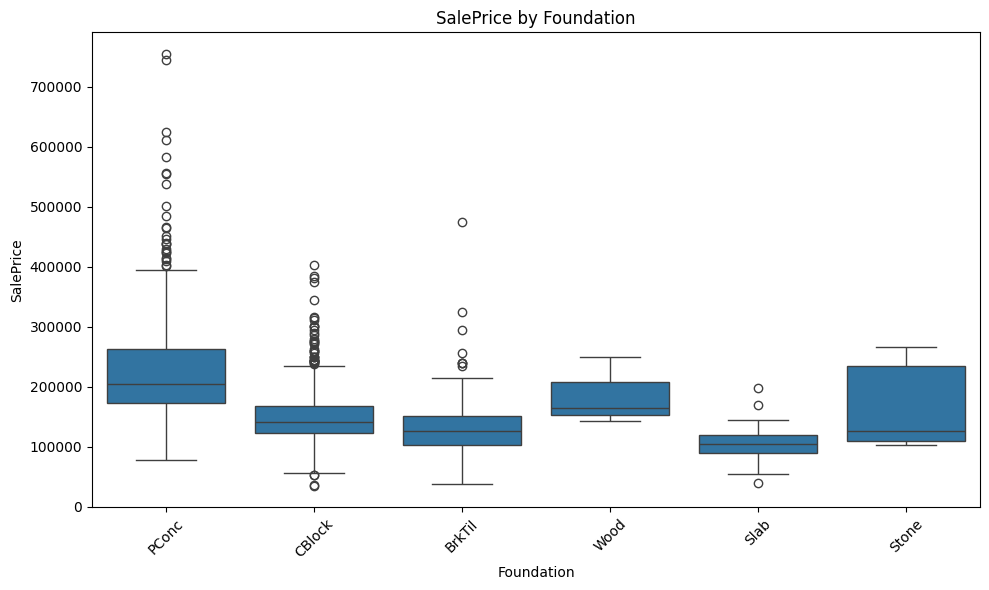

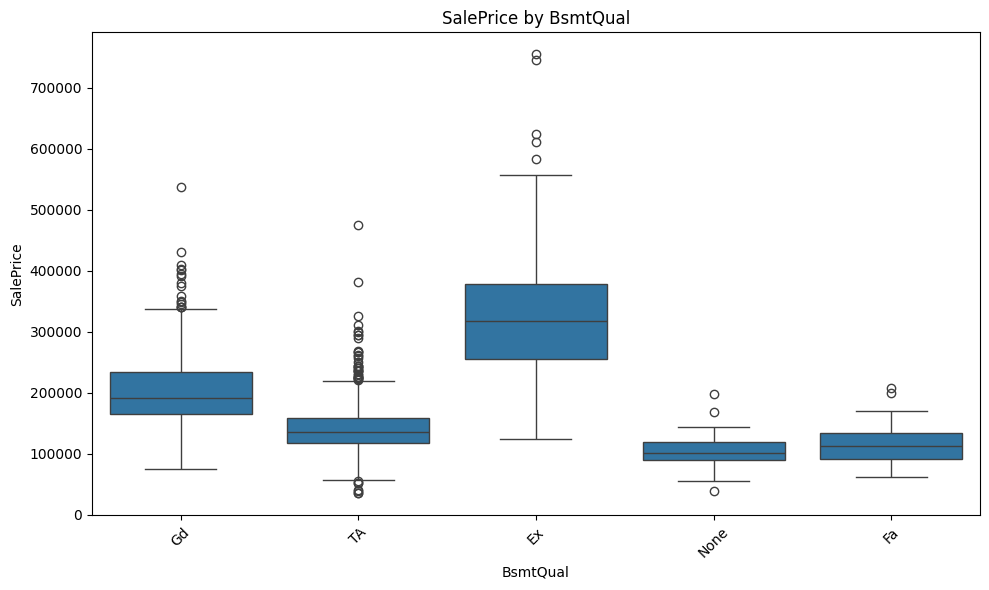

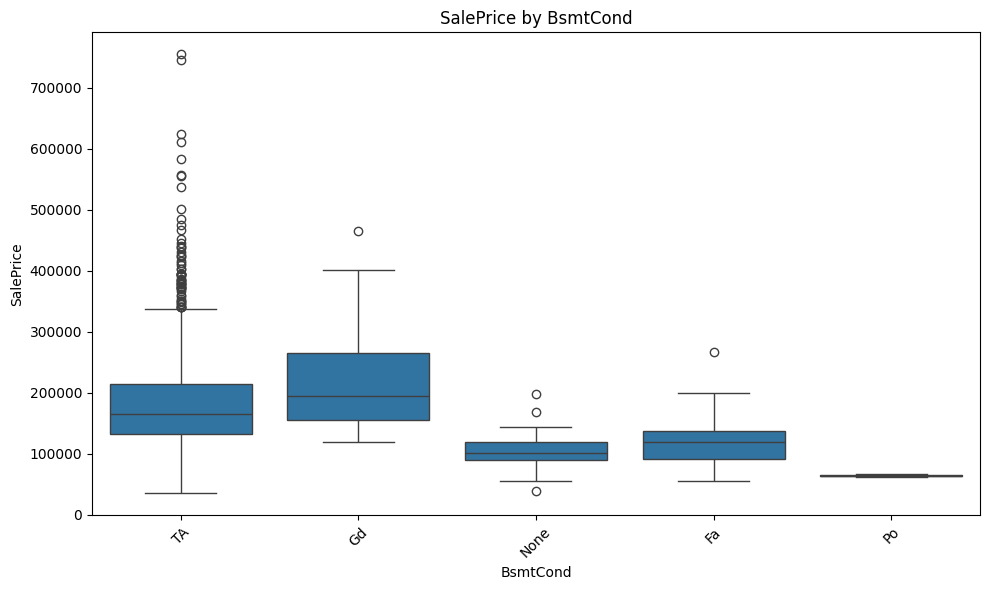

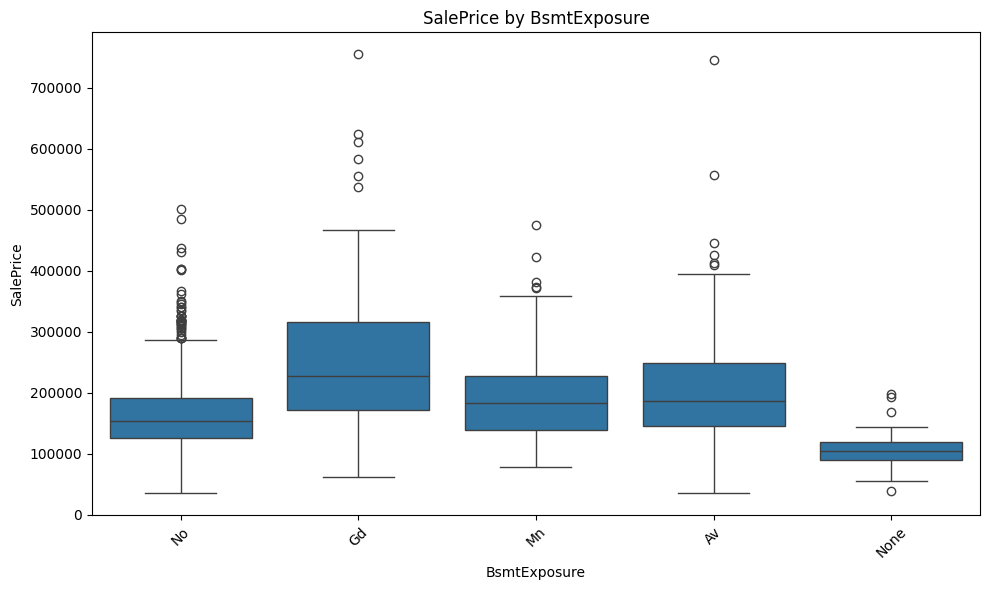

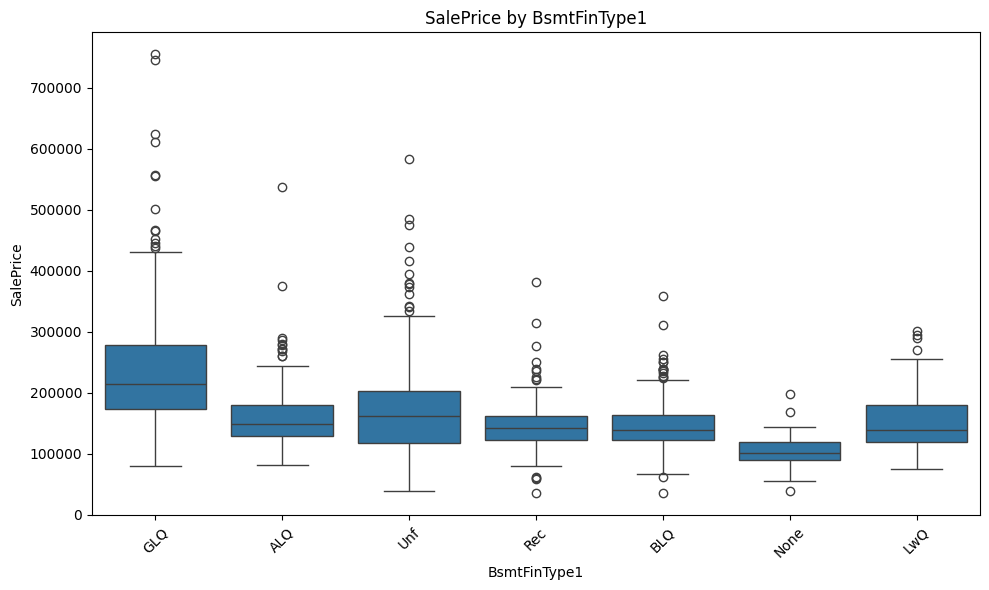

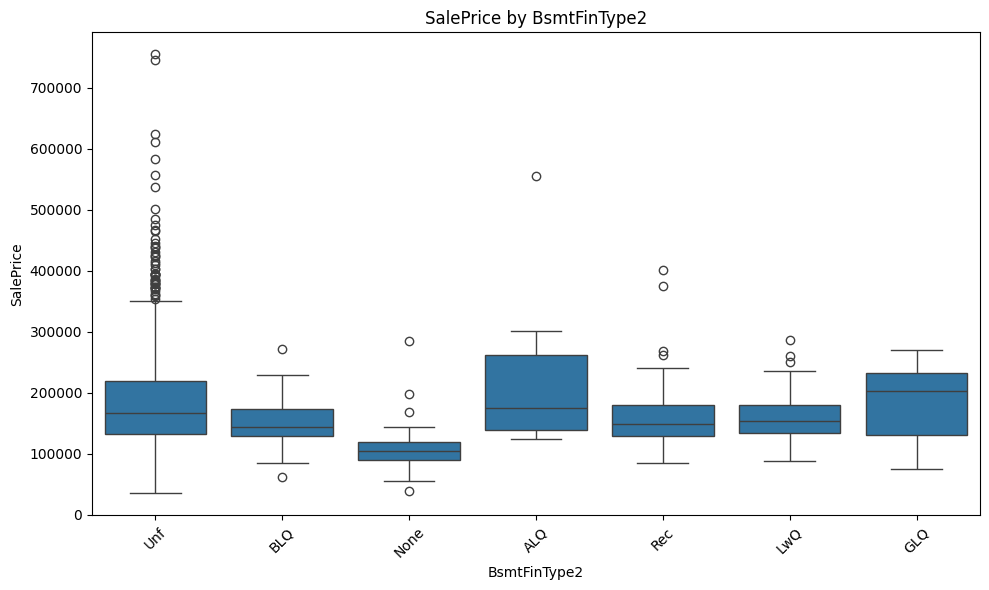

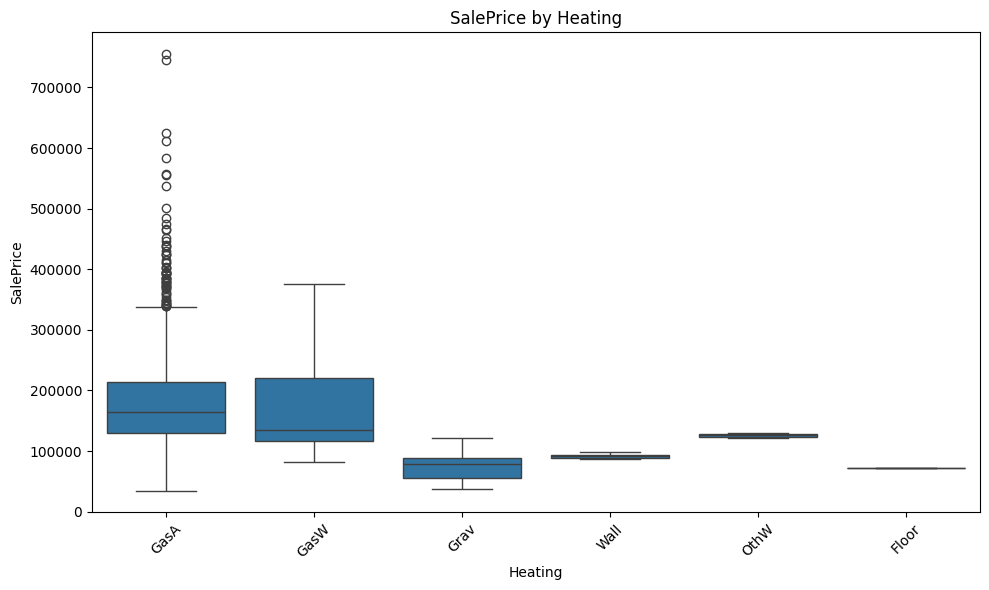

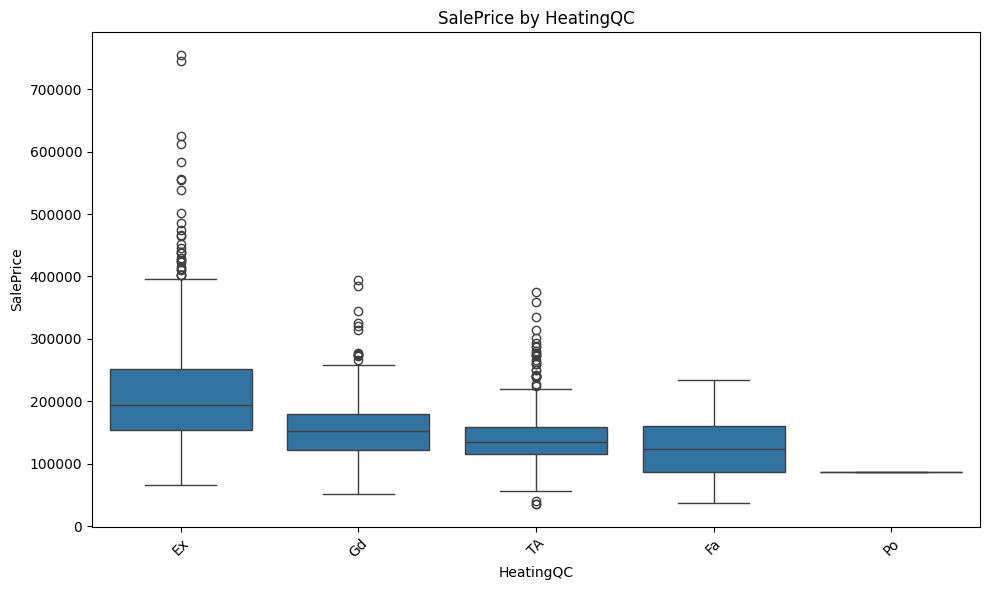

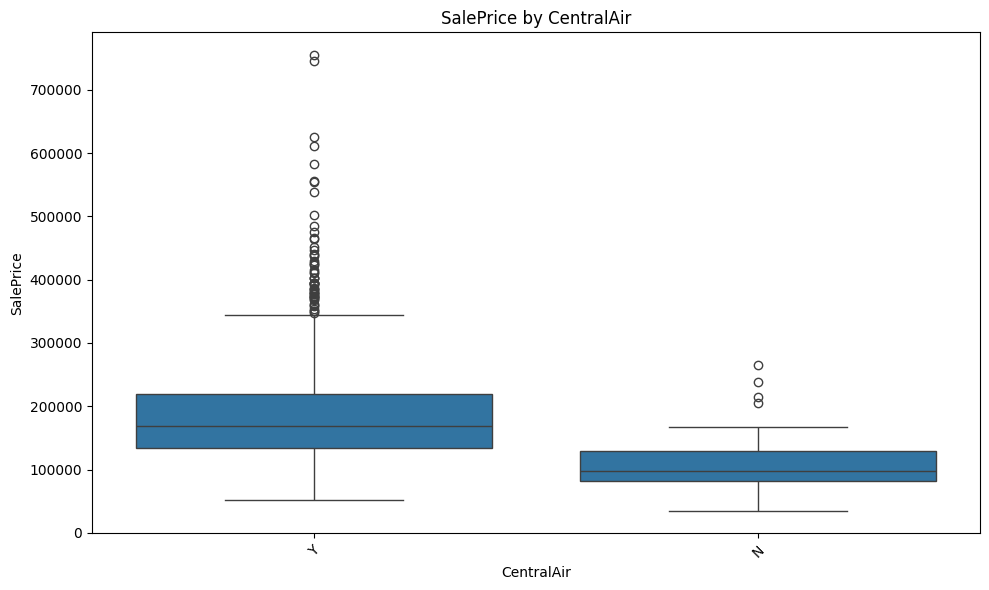

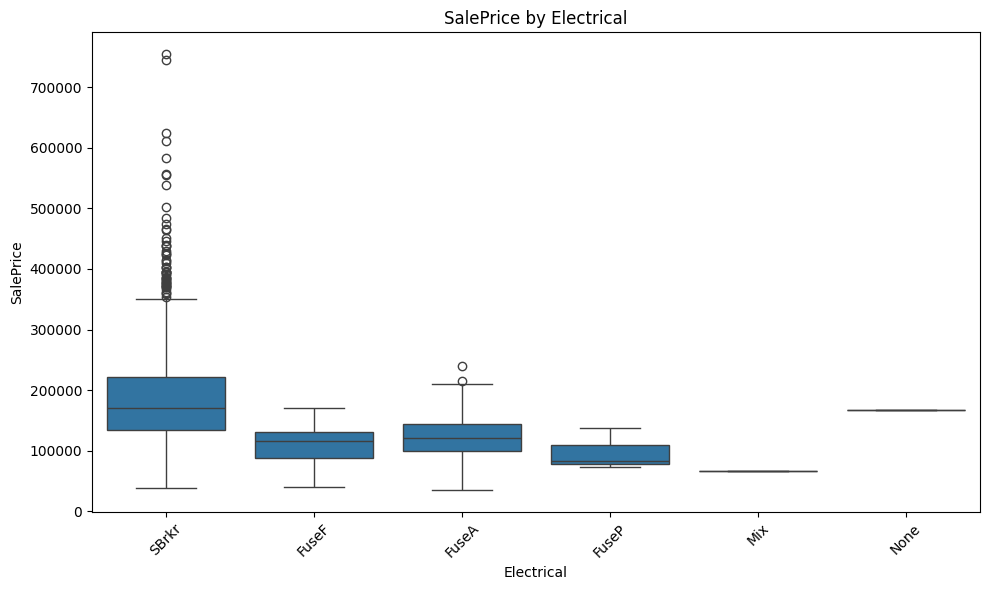

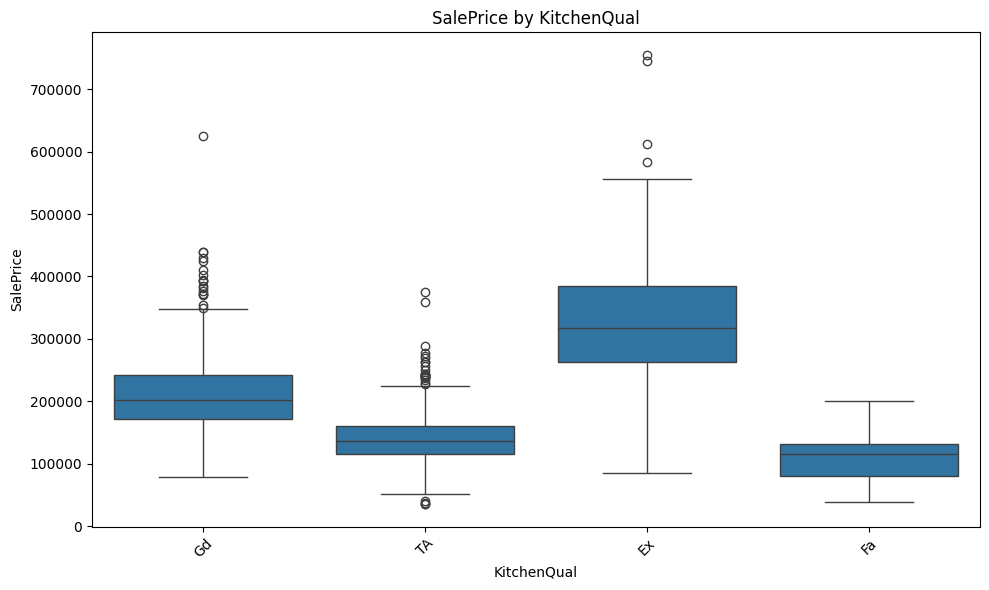

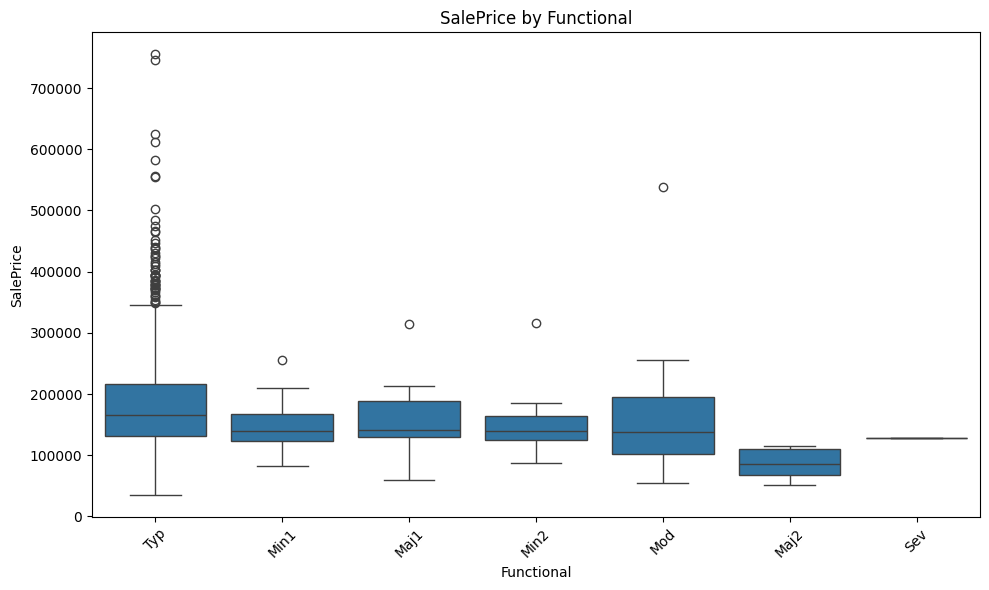

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 분석할 범주형 변수 목록
selected_categorical_features = [
    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
    'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
    'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional'
]

# 각 범주형 변수에 대해 SalePrice와의 관계 시각화
for feature in selected_categorical_features:
    plt.figure(figsize=(10, 6))  # 각 그래프의 크기 설정
    sns.boxplot(x=feature, y='SalePrice', data=dataset_df)
    plt.title(f'SalePrice by {feature}')
    plt.xticks(rotation=45)  # x축 레이블 회전
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.tight_layout()  # 레이아웃 최적화
    plt.show()

- BldgType

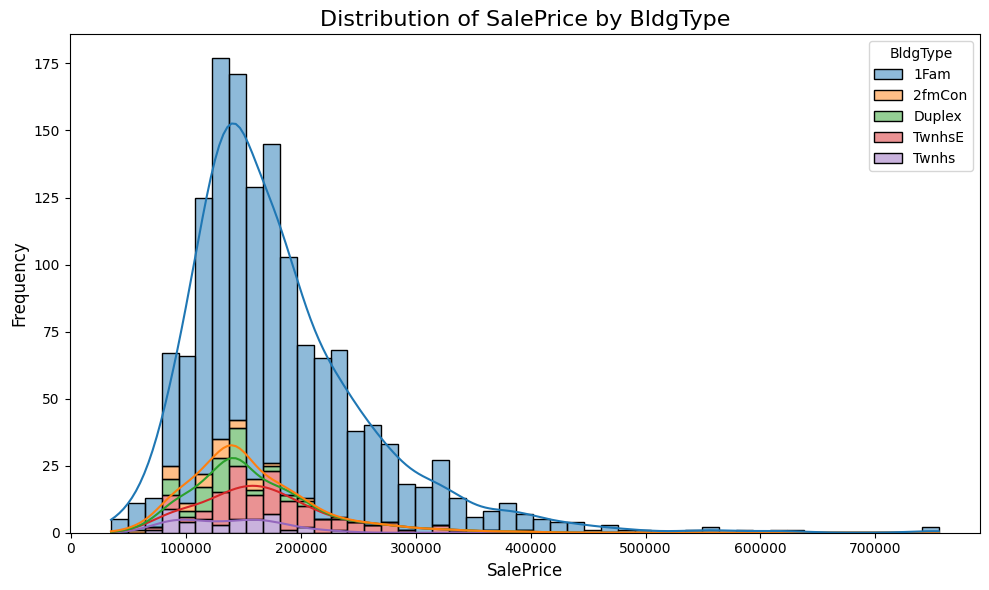

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 히스토그램을 사용하여 BldgType별로 SalePrice의 분포를 비교
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset_df, x='SalePrice', hue='BldgType', multiple='stack', kde=True)

# 그래프 제목 및 레이블 설정
plt.title('Distribution of SalePrice by BldgType', fontsize=16)
plt.xlabel('SalePrice', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# 그래프 표시
plt.tight_layout()
plt.show()

1Fam (단독 주택): 그래프에서 가장 큰 빈도를 차지, 약 10만 ~ 20만 달러 사이에 많은 주택이 분포해 있음.
분포의 꼬리가 오른쪽으로 길게 나타나면서 더 높은 가격대의 주택들도 존재하지만, 주로 중저가 주택에서 많은 빈도를 보임.
2fmCon (2가구 연립주택): 분포의 크기가 상대적으로 작고, 가격대가 10만 ~ 15만 달러 사이에서 많은 주택이 집중되어 있음
2가구 연립주택의 가격이 전반적으로 단독 주택보다 낮은 경향을 보임
Duplex (이중 주택):
가격대는 10만 ~ 17만 달러 사이에서 가장 많이 분포되어 있으며, 2fmCon과 유사하게 상대적으로 저가형 주택들이 많습니다.
TwnhsE (타운하우스 끝쪽):
TwnhsE는 가격 분포가 1Fam과 비슷하지만, 약간 더 낮은 가격대에 많이 집중되어 있습니다.
약 15만 ~ 20만 달러 사이에서 많이 분포해 있습니다.
Twnhs (타운하우스):
Twnhs도 15만 달러 전후의 가격대에 주택이 분포하며, Duplex 및 2fmCon과 유사한 분포를 보입니다.

<ipython-input-214-c045ab477fa6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BldgType', data=dataset_df, palette='Set2')


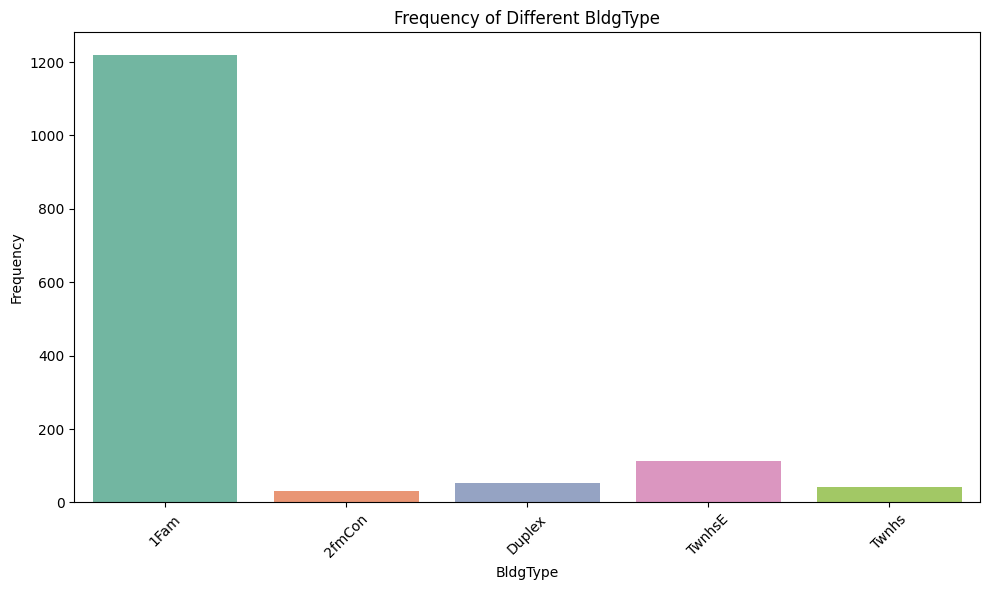

In [ ]:
# BldgType별 빈도 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x='BldgType', data=dataset_df, palette='Set2')
plt.title('Frequency of Different BldgType')
plt.xlabel('BldgType')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()  # 레이아웃 최적화
plt.show()

주거 유형 중 단독주택 형태가 가장 많이 판매됨.

### 가설


In [ ]:
import scipy.stats as stats

# BldgType 그룹에 따른 SalePrice 평균 차이 검증 (ANOVA)
group_data = [dataset_df[dataset_df['BldgType'] == btype]['SalePrice'] for btype in dataset_df['BldgType'].unique()]
f_stat, p_value = stats.f_oneway(*group_data)

print(f'ANOVA test results: F-statistic = {f_stat}, p-value = {p_value}')

# p-value가 작을수록 (일반적으로 0.05 이하) 유의미한 차이가 있음을 의미합니다.











ANOVA test results: F-statistic = 13.011077169620851, p-value = 2.0567364604967015e-10


In [ ]:
import pandas as pd

# 범주형 변수들을 더미 변수로 변환
dataset_dummies = pd.get_dummies(dataset_df[selected_categorical_features])

# SalePrice와 더미 변수들 간의 상관관계 계산
corr_matrix = dataset_dummies.corrwith(dataset_df['SalePrice'])

# 상관관계 결과 출력
print("Correlation between categorical features (dummy variables) and SalePrice:")
print(corr_matrix.sort_values(ascending=False))

Correlation between categorical features (dummy variables) and SalePrice:
BsmtQual_Ex          0.553105
KitchenQual_Ex       0.504094
Foundation_PConc     0.497734
ExterQual_Gd         0.452466
ExterQual_Ex         0.451164
                       ...   
HeatingQC_TA        -0.312677
Foundation_CBlock   -0.343263
BsmtQual_TA         -0.452394
KitchenQual_TA      -0.519298
ExterQual_TA        -0.589044
Length: 132, dtype: float64


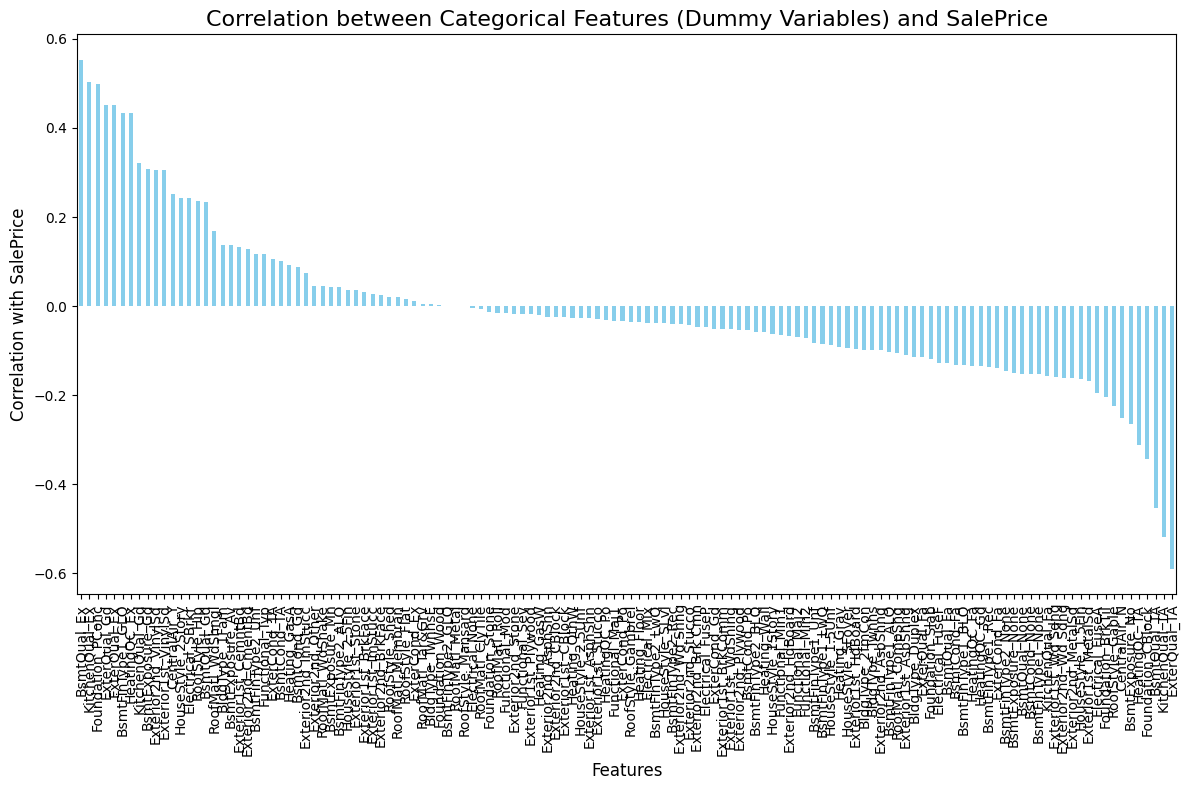

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 범주형 변수들을 더미 변수로 변환
dataset_dummies = pd.get_dummies(dataset_df[selected_categorical_features])

# SalePrice와 더미 변수들 간의 상관관계 계산
corr_matrix = dataset_dummies.corrwith(dataset_df['SalePrice'])

# 상관관계 그래프 그리기
plt.figure(figsize=(12, 8))
corr_matrix.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Correlation between Categorical Features (Dummy Variables) and SalePrice', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation with SalePrice', fontsize=12)
plt.xticks(rotation=90)  # x축 레이블 회전
plt.tight_layout()

# 그래프 출력
plt.show()


- HouseStyle


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA를 위해 범주형 변수 'HouseStyle'과 연속형 변수 'SalePrice' 데이터 준비
model = ols('SalePrice ~ C(HouseStyle)', data=dataset_df).fit()

# ANOVA 분산 분석 결과 출력
anova_table = sm.stats.anova_lm(model, typ=2)

# F-statistic과 p-value 추출
f_stat = anova_table['F'][0]  # 첫 번째 항목에서 F값 추출
p_value = anova_table['PR(>F)'][0]  # 첫 번째 항목에서 p-value 추출

# 결과 출력 및 유의미한 차이가 있는지 여부 확인
if p_value < 0.05:
    print(f'ANOVA test results: F-statistic = {f_stat:.4f}, p-value = {p_value:.4f}')
    print('The variable HouseStyle and SalePrice have a statistically significant relationship (p < 0.05).')
else:
    print(f'ANOVA test results: F-statistic = {f_stat:.4f}, p-value = {p_value:.4f}')
    print('The variable HouseStyle and SalePrice do not have a statistically significant relationship (p >= 0.05).')

ANOVA test results: F-statistic = 19.5950, p-value = 0.0000
The variable HouseStyle and SalePrice have a statistically significant relationship (p < 0.05).


<ipython-input-218-b227c62221a8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_stat = anova_table['F'][0]  # 첫 번째 항목에서 F값 추출
<ipython-input-218-b227c62221a8>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]  # 첫 번째 항목에서 p-value 추출


변수 그룹화

<ipython-input-219-c4c3c8645892>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)


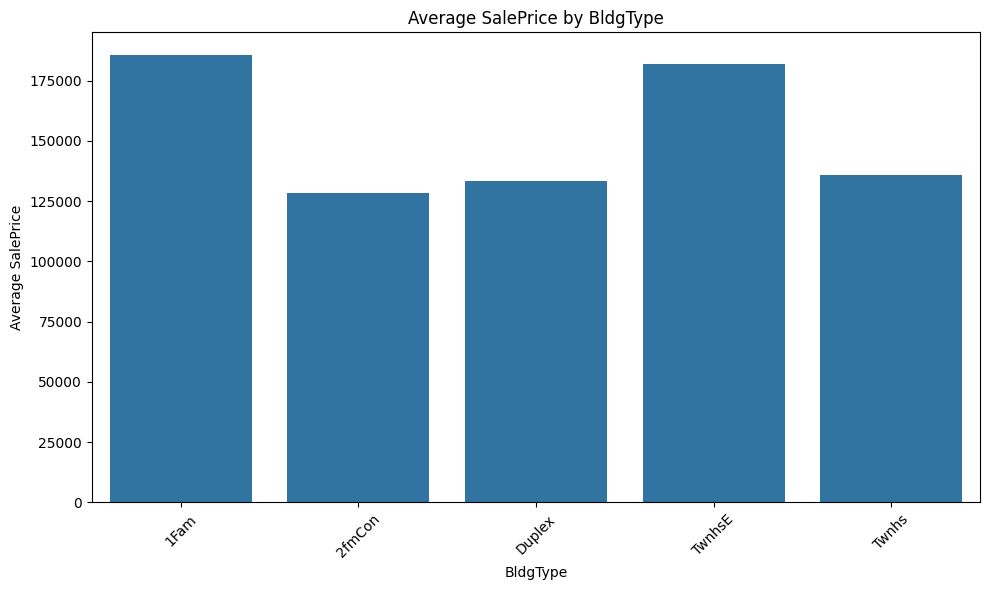

<ipython-input-219-c4c3c8645892>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)


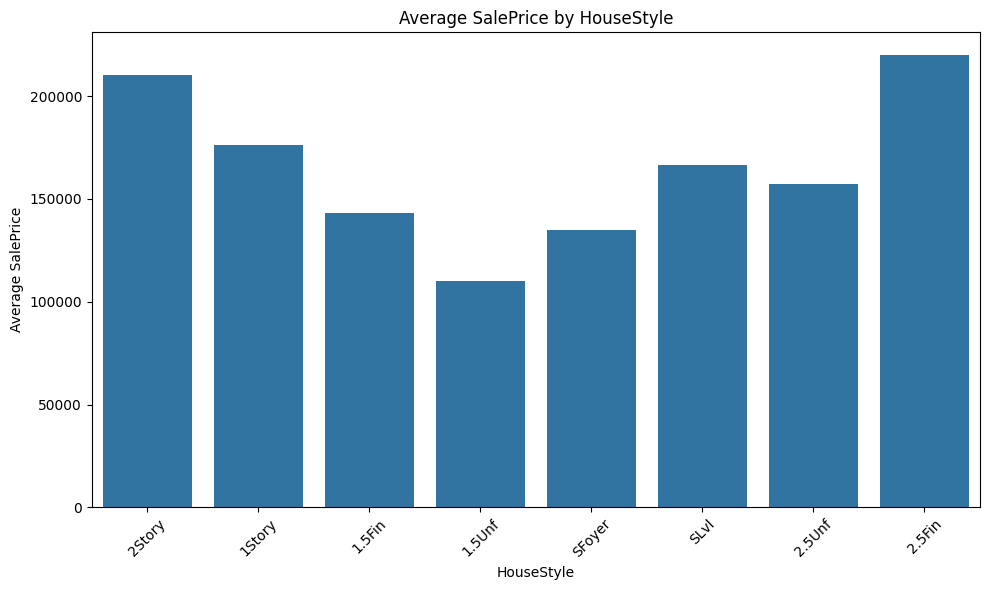

<ipython-input-219-c4c3c8645892>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)


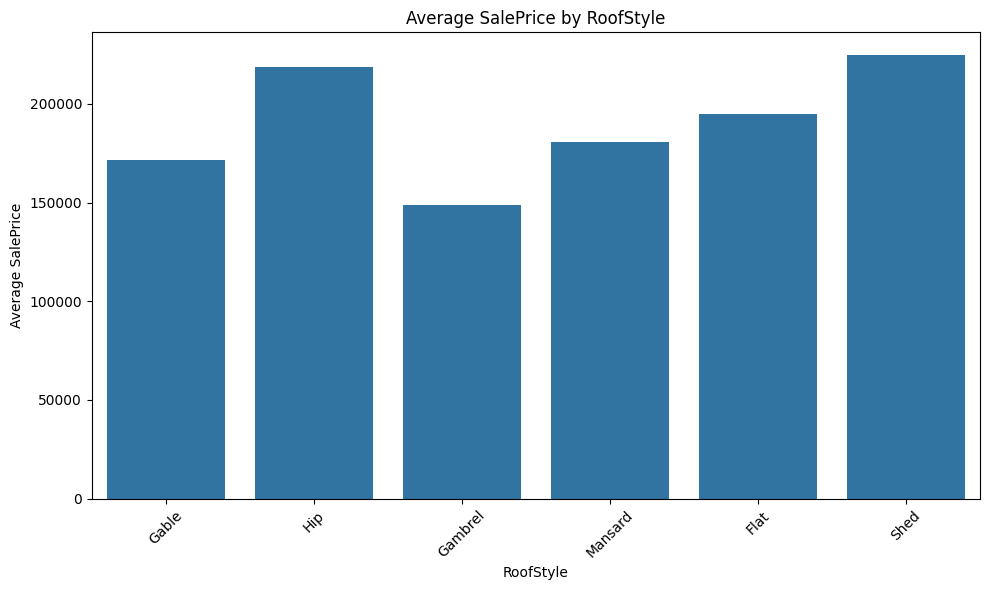

<ipython-input-219-c4c3c8645892>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)


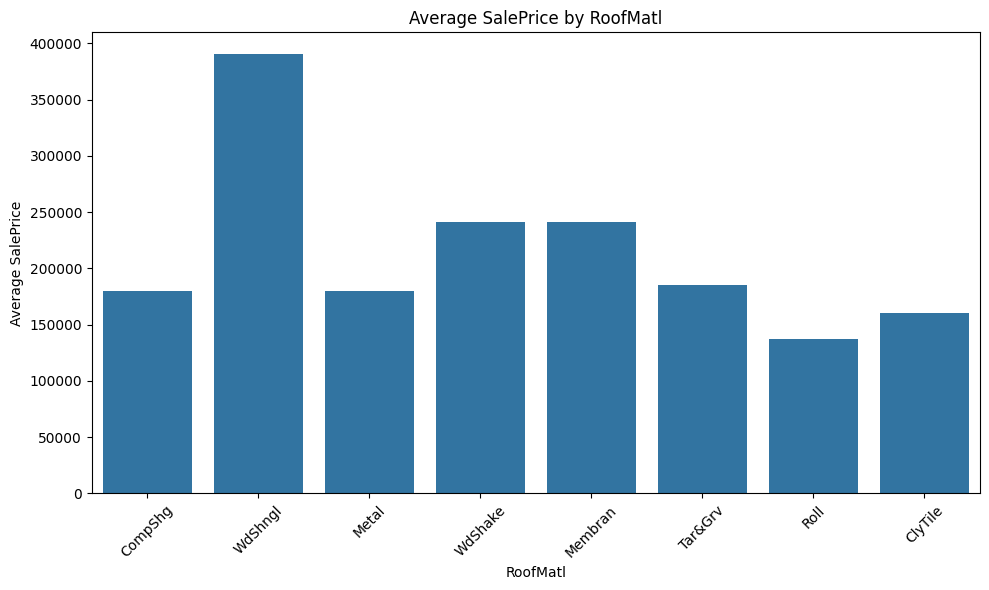

<ipython-input-219-c4c3c8645892>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)


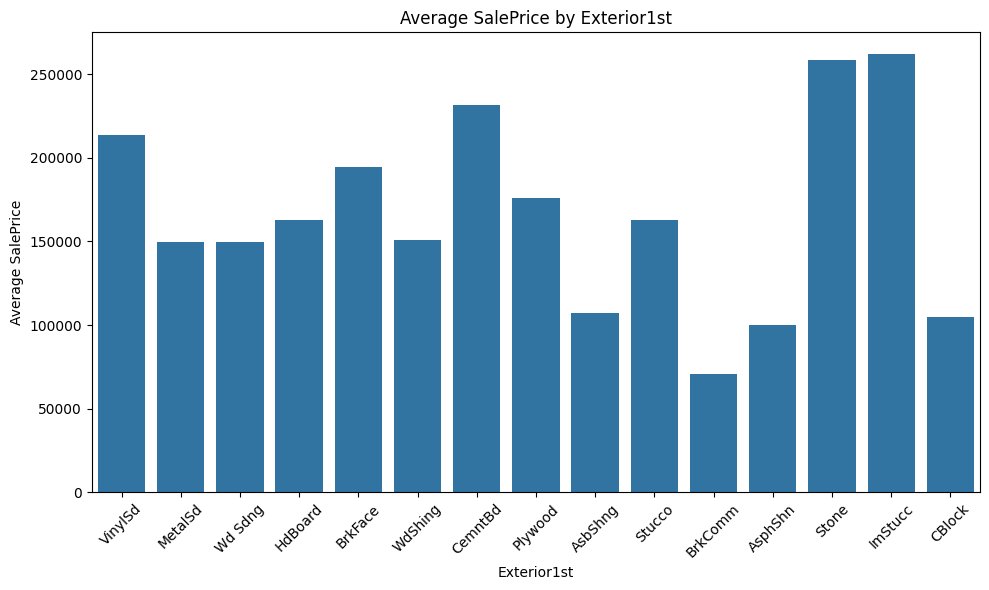

<ipython-input-219-c4c3c8645892>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)


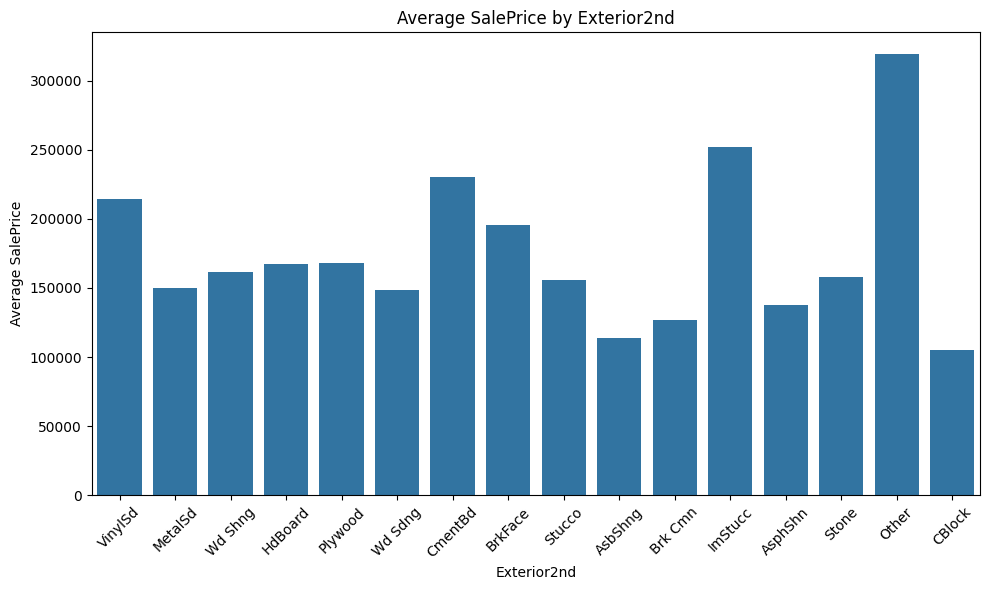

<ipython-input-219-c4c3c8645892>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)


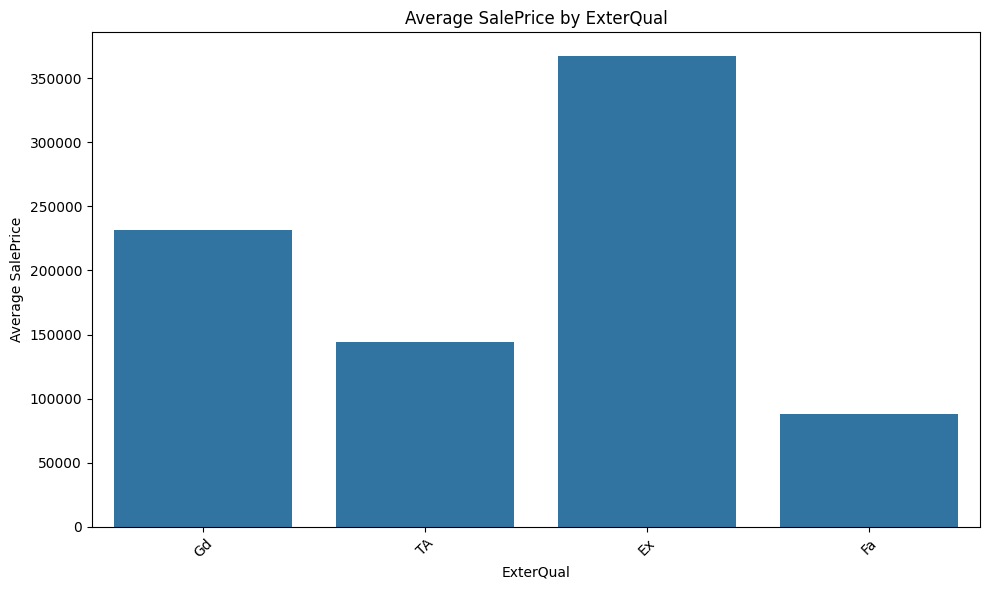

<ipython-input-219-c4c3c8645892>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)


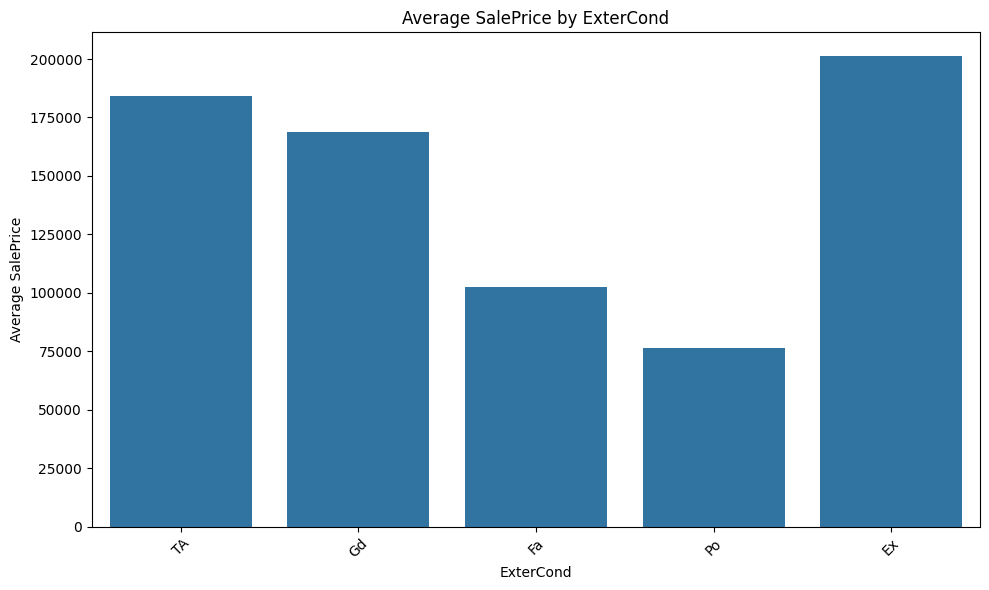

<ipython-input-219-c4c3c8645892>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)


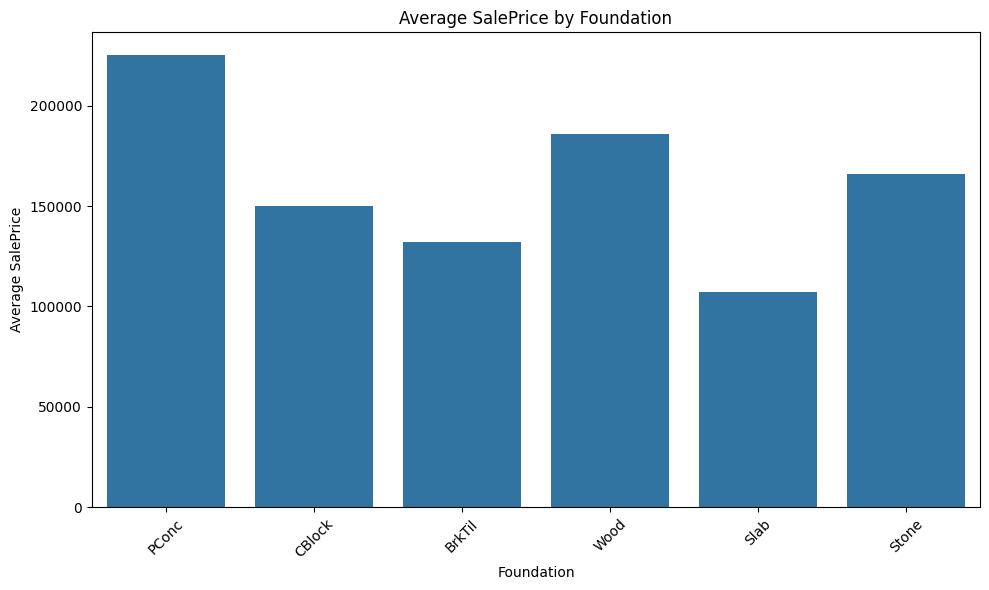

<ipython-input-219-c4c3c8645892>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)


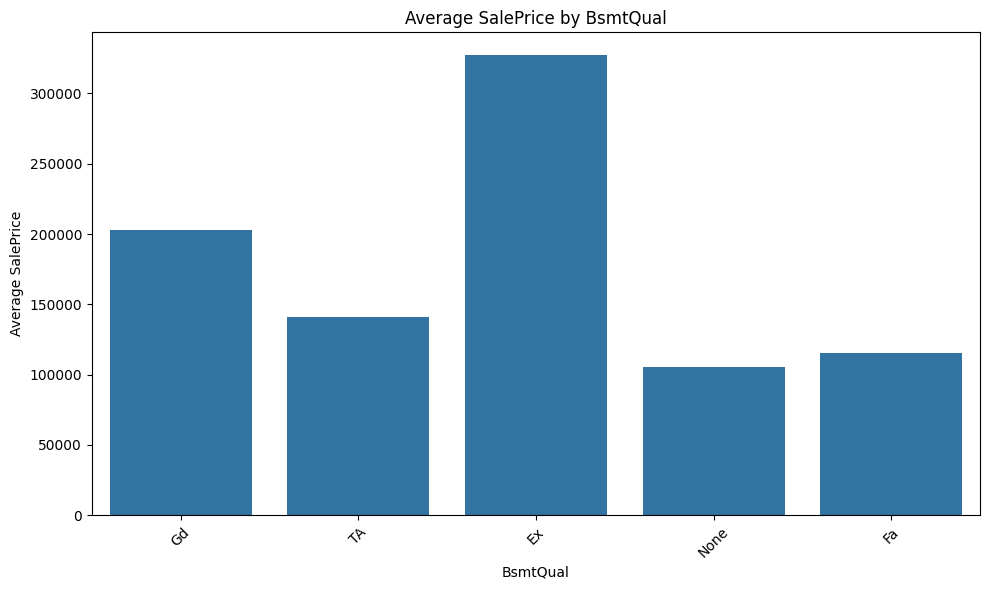

<ipython-input-219-c4c3c8645892>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)


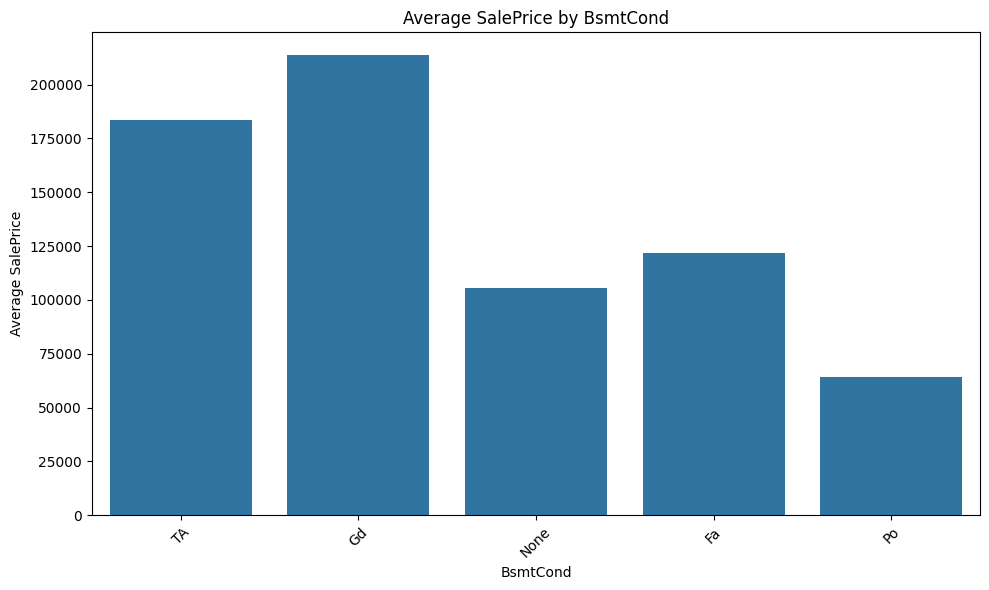

<ipython-input-219-c4c3c8645892>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)


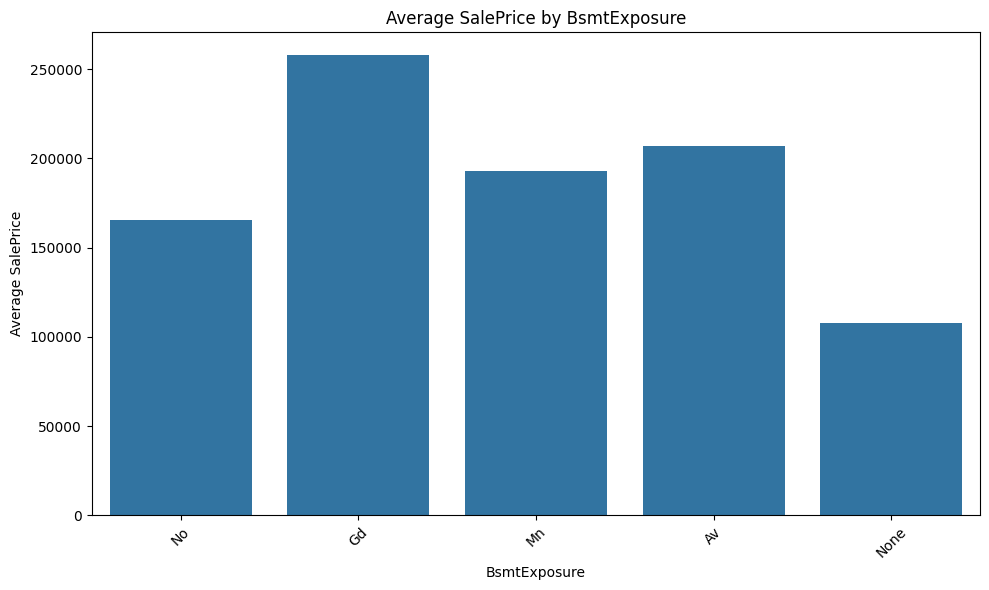

<ipython-input-219-c4c3c8645892>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)


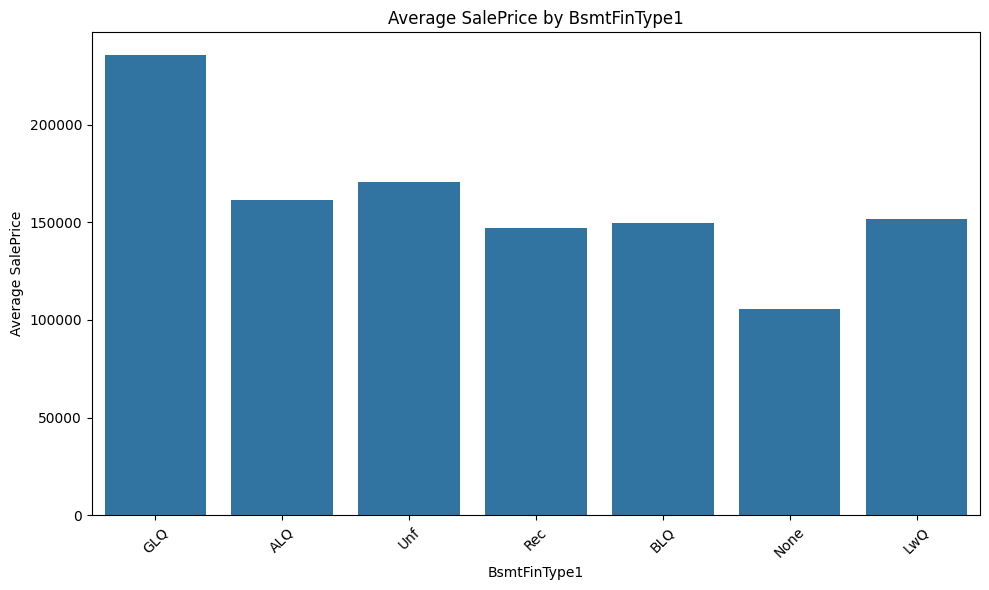

<ipython-input-219-c4c3c8645892>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)


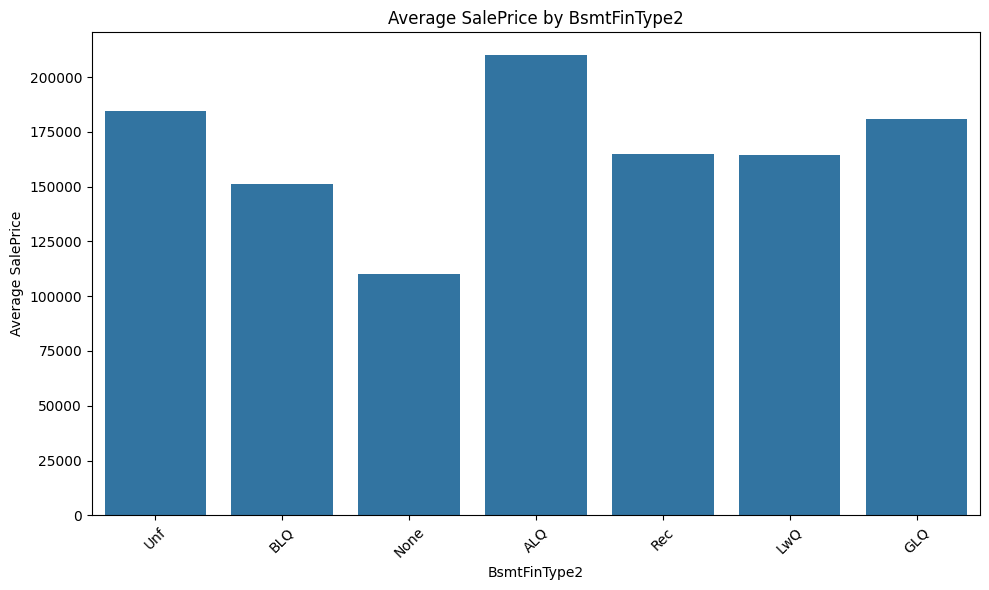

<ipython-input-219-c4c3c8645892>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)


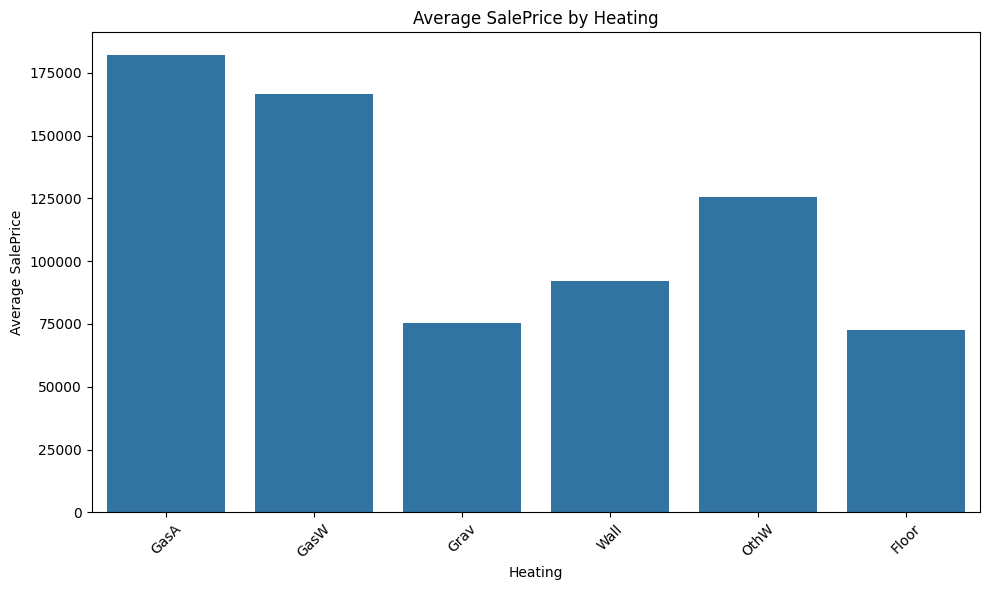

<ipython-input-219-c4c3c8645892>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)


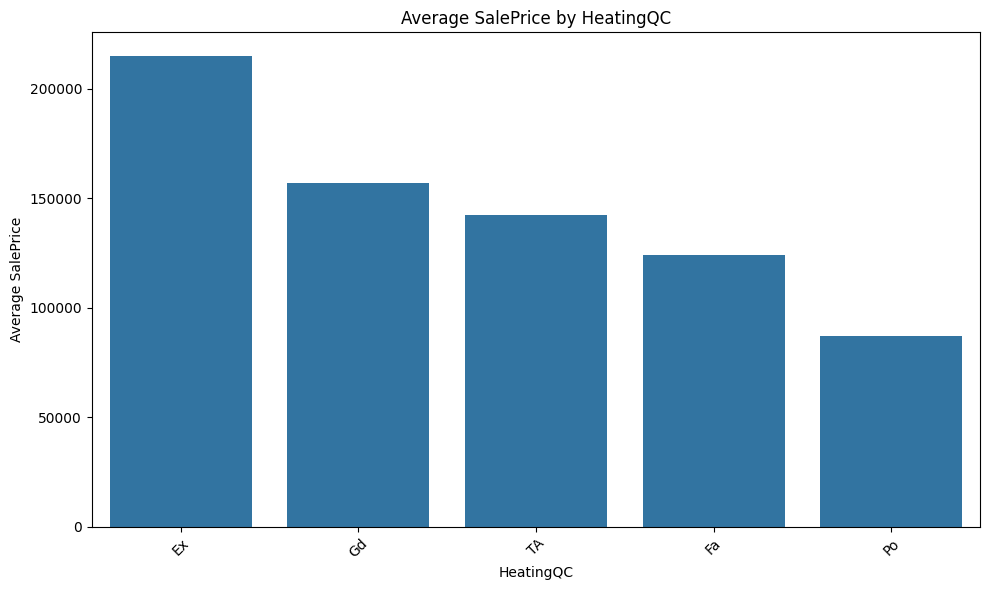

<ipython-input-219-c4c3c8645892>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)


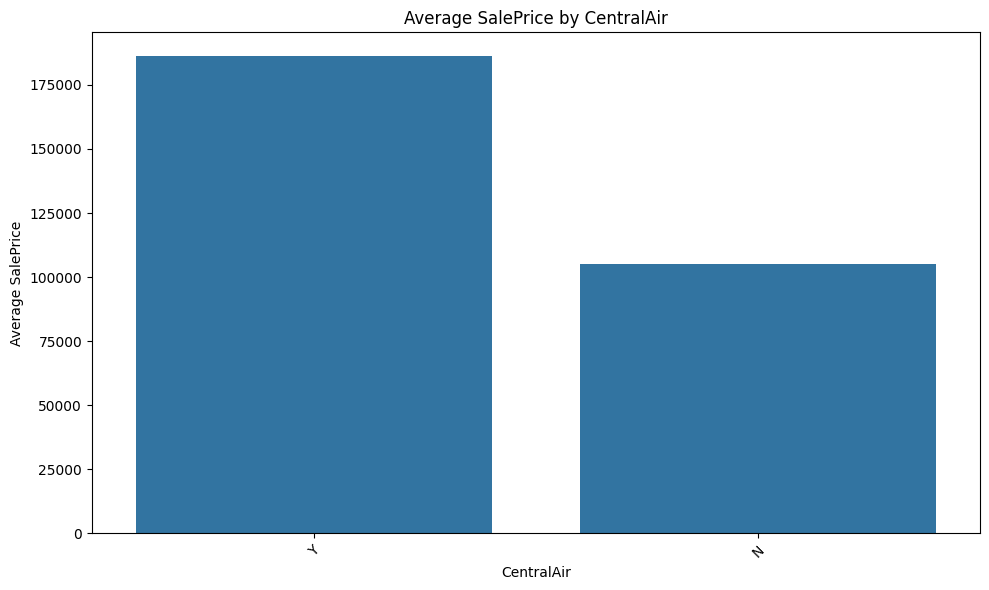

<ipython-input-219-c4c3c8645892>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)


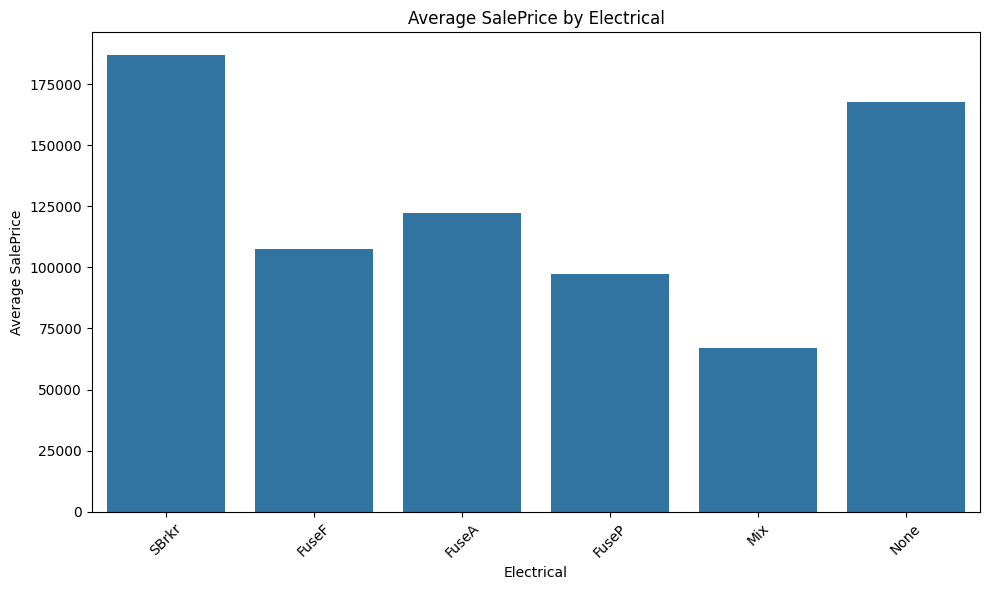

<ipython-input-219-c4c3c8645892>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)


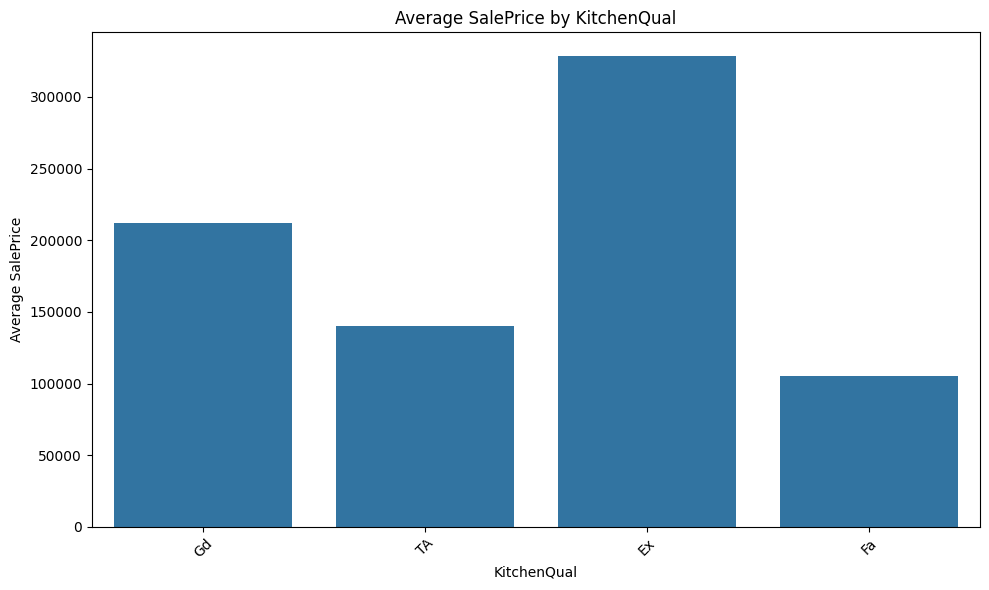

<ipython-input-219-c4c3c8645892>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)


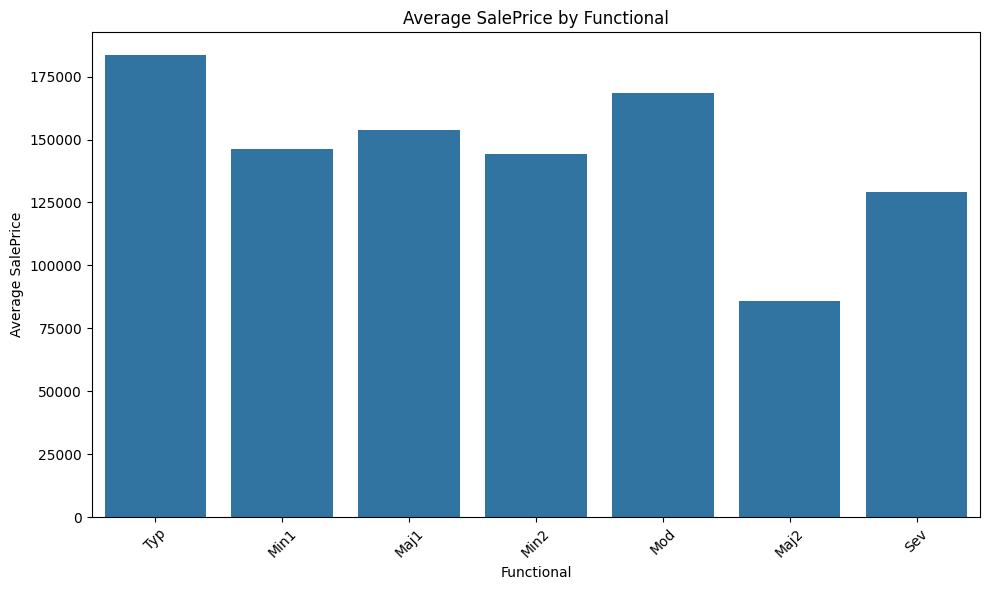

In [ ]:
# 평균 SalePrice를 기준으로 막대 그래프 생성
for feature in selected_categorical_features:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)
    plt.title(f'Average SalePrice by {feature}')
    plt.xticks(rotation=45)
    plt.xlabel(feature)
    plt.ylabel('Average SalePrice')
    plt.tight_layout()
    plt.show()

그룹화 하여 다시 막대 그래프 및 frequency 로 나타냄

1. 외부 구조 및 마감

<ipython-input-220-b734f5ffb680>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)
<ipython-input-220-b734f5ffb680>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)
<ipython-input-220-b734f5ffb680>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)
<ipython-input-220-b734f5ffb680>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)
<ipython-input-220-b734f5ffb680>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barp

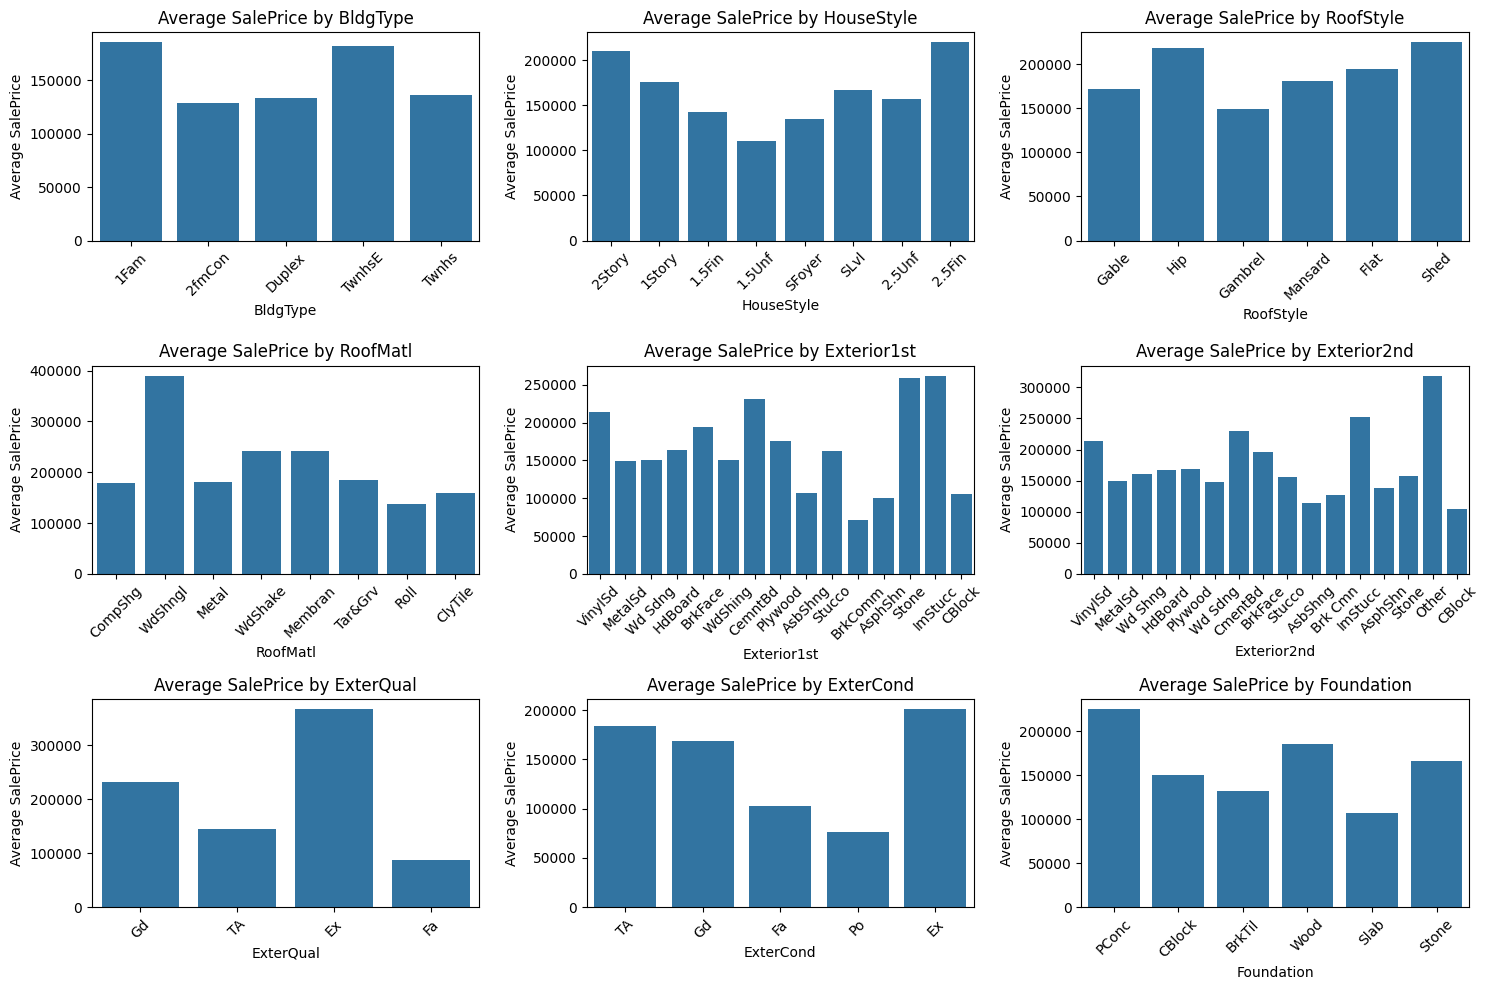

In [ ]:


# 외부 구조 및 마감 그룹
external_features = [
    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
    'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation'
]

# 평균 SalePrice를 기준으로 막대 그래프 생성
plt.figure(figsize=(15, 10))
for idx, feature in enumerate(external_features, start=1):
    plt.subplot(3, 3, idx)  # 3행 3열 서브플롯 생성
    sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)
    plt.title(f'Average SalePrice by {feature}')
    plt.xticks(rotation=45)
    plt.xlabel(feature)
    plt.ylabel('Average SalePrice')
plt.tight_layout()
plt.show()

<ipython-input-221-21852519c91a>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)
<ipython-input-221-21852519c91a>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)
<ipython-input-221-21852519c91a>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)
<ipython-input-221-21852519c91a>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)
<ipython-input-221-21852519c91a>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barp

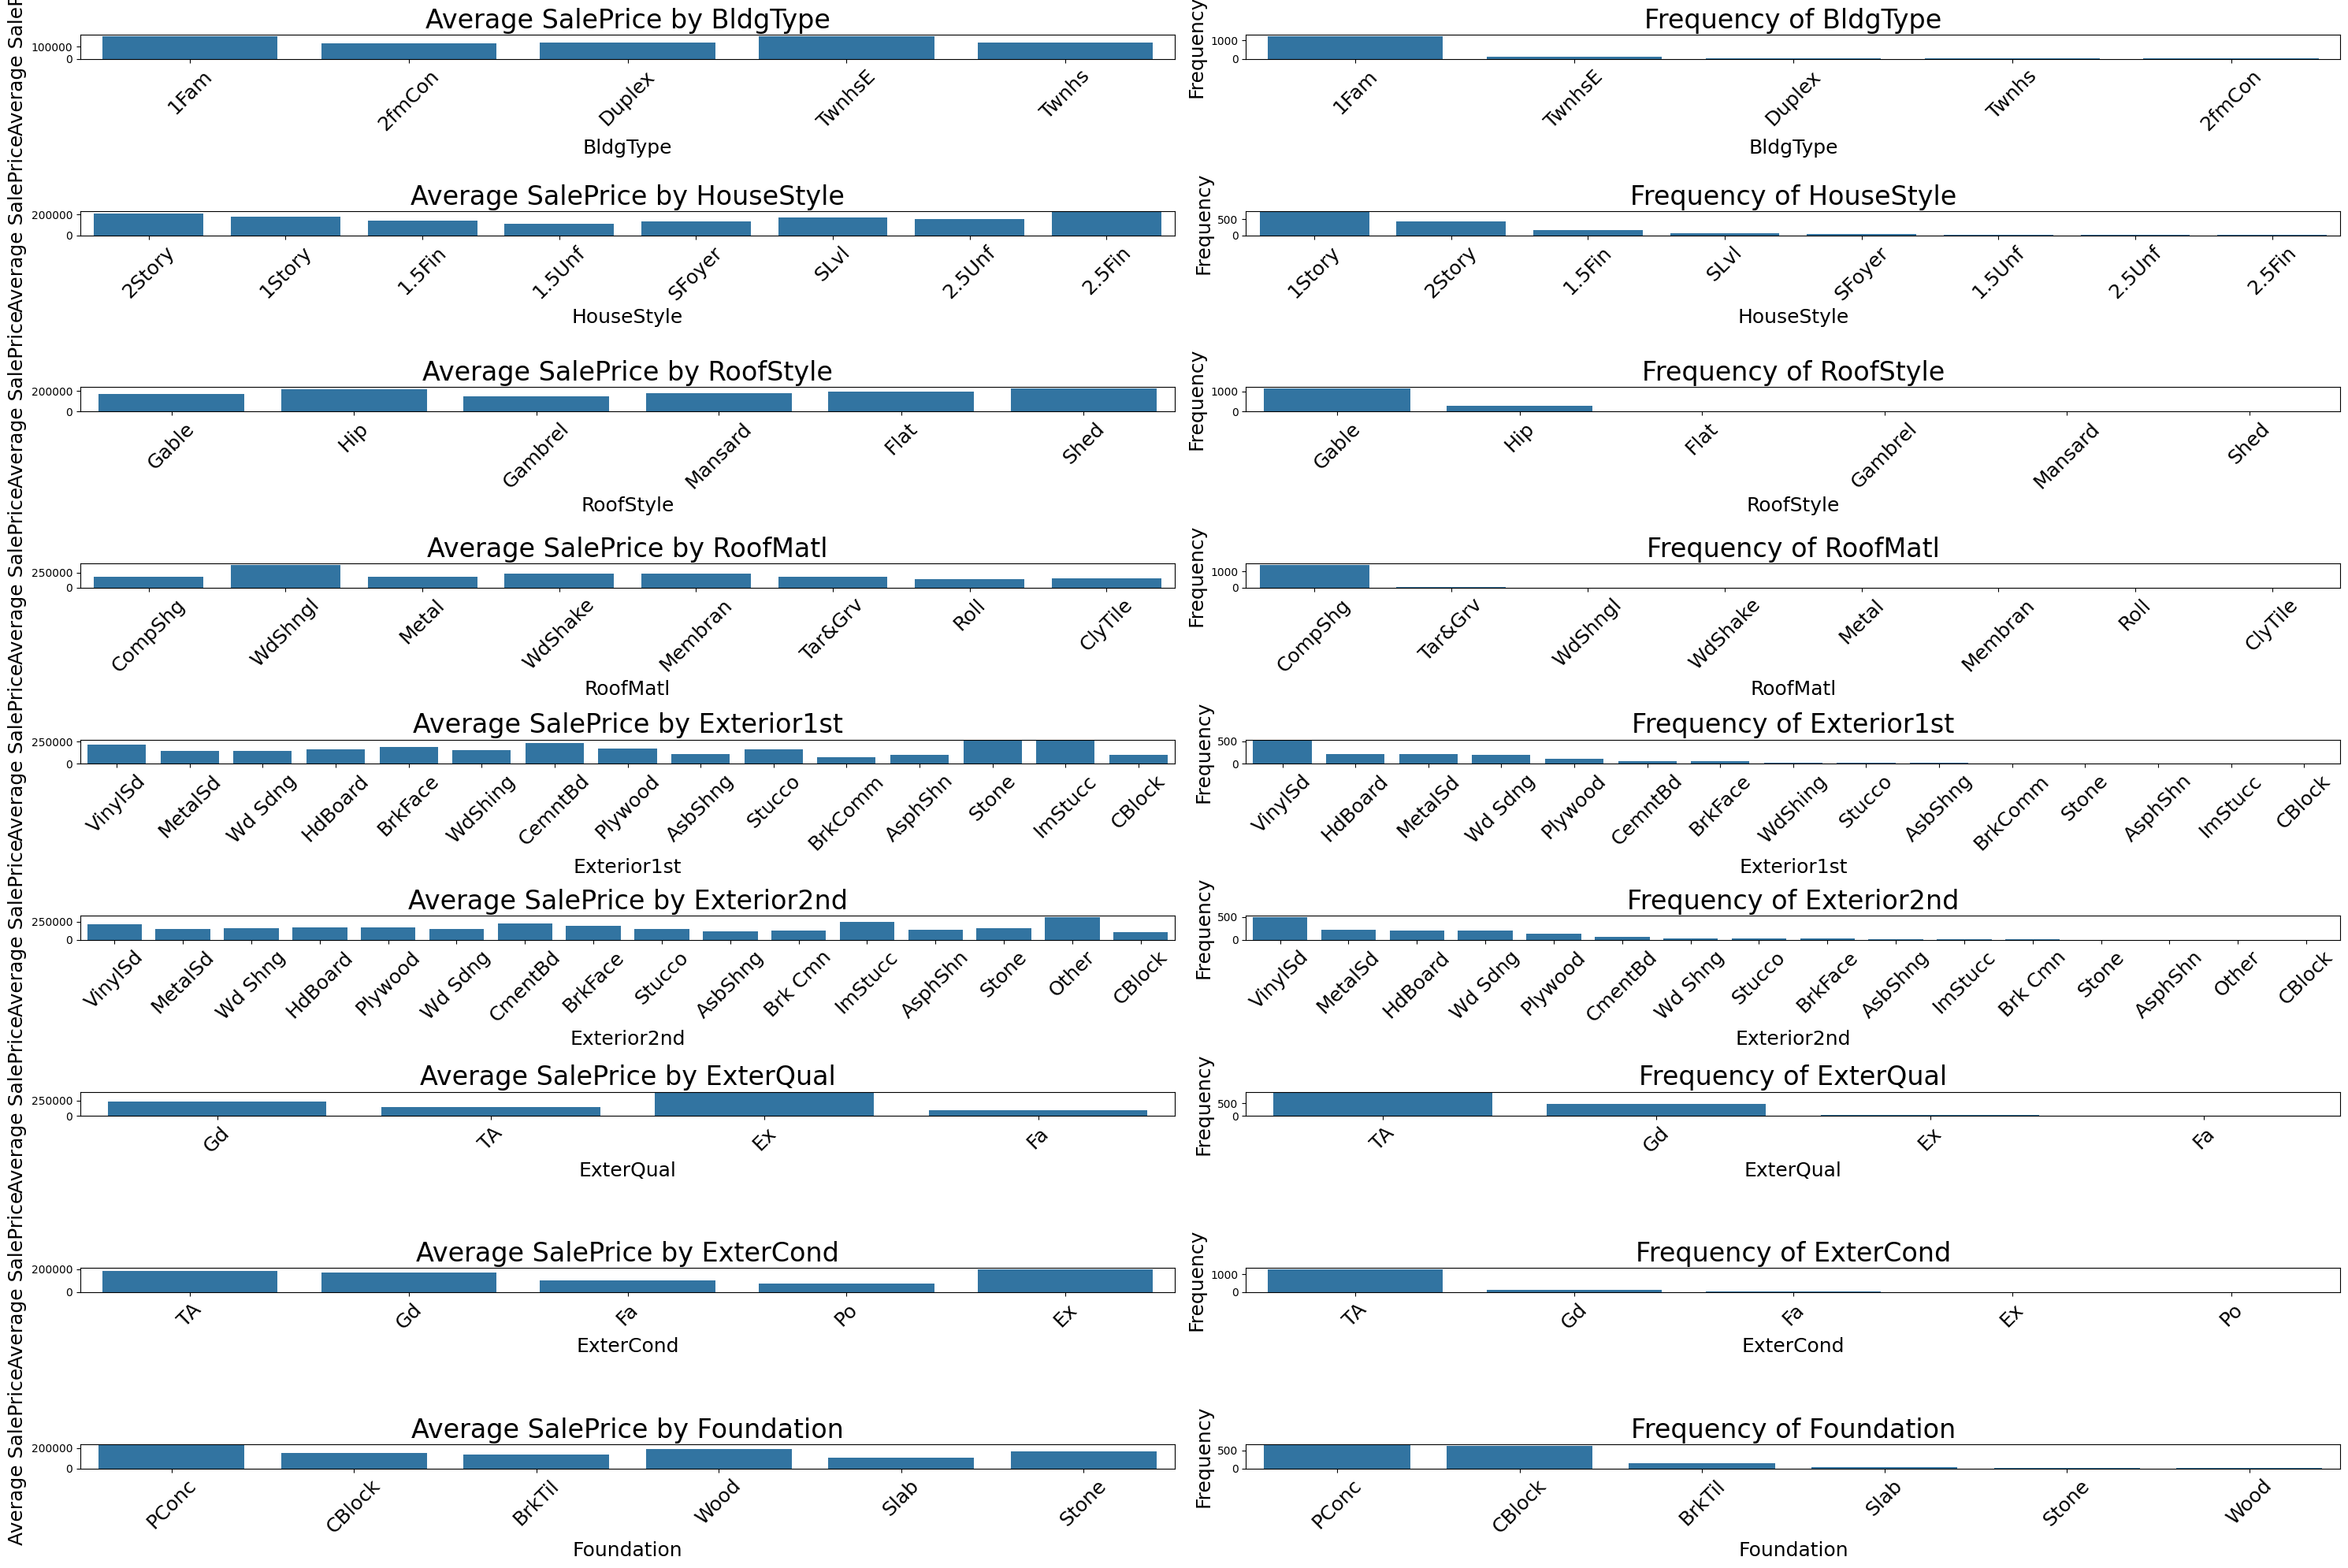

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 외부 구조 및 마감 그룹
external_features = [
    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
    'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation'
]

# 평균 SalePrice와 빈도수 시각화를 위한 서브플롯 생성
plt.figure(figsize=(30, 20))  # 그래프 크기 조정
for idx, feature in enumerate(external_features, start=1):
    # 평균 SalePrice 그래프
    plt.subplot(len(external_features), 2, idx*2-1)  # 홀수 인덱스의 서브플롯
    sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)
    plt.title(f'Average SalePrice by {feature}', fontsize=24)  # 제목 폰트 크기 조정
    plt.xticks(rotation=45, fontsize=18)
    plt.xlabel(feature, fontsize=18)  # x축 레이블 폰트 크기 조정
    plt.ylabel('Average SalePrice', fontsize=18)  # y축 레이블 폰트 크기 조정

    # 빈도수 그래프
    plt.subplot(len(external_features), 2, idx*2)  # 짝수 인덱스의 서브플롯
    sns.countplot(data=dataset_df, x=feature, order=dataset_df[feature].value_counts().index)
    plt.title(f'Frequency of {feature}', fontsize=24)  # 제목 폰트 크기 조정
    plt.xticks(rotation=45, fontsize=18)
    plt.xlabel(feature, fontsize=18)  # x축 레이블 폰트 크기 조정
    plt.ylabel('Frequency', fontsize=18)  # y축 레이블 폰트 크기 조정

# 서브플롯 간격 조정
plt.subplots_adjust(hspace=0.5, wspace=0.5)  # 세로 간격과 가로 간격 조정

plt.tight_layout()
plt.show()

랜덤 포레스트를 통한 feature 중요도 평가

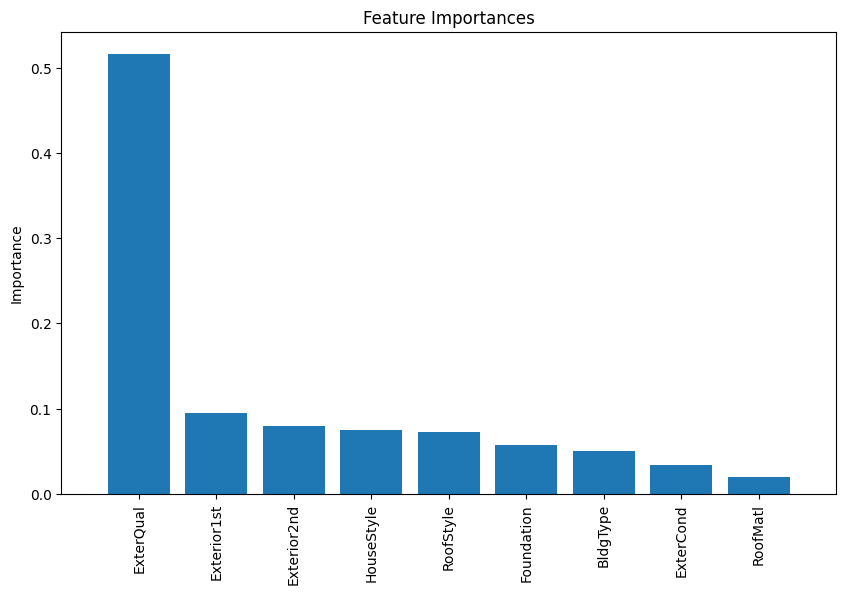

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 데이터 준비
X = dataset_df[external_features]
y = dataset_df['SalePrice']

# 범주형 변수를 숫자로 인코딩
X_encoded = X.apply(LabelEncoder().fit_transform)

# 훈련/테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Feature importance 추출
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# 중요도 시각화
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_encoded.shape[1]), importances[indices], align="center")
plt.xticks(range(X_encoded.shape[1]), X_encoded.columns[indices], rotation=90)
plt.xlim([-1, X_encoded.shape[1]])
plt.ylabel('Importance')
plt.show()

0.5 이상으로 ExterQual (외장 재질 품질 )중요도 높게 나옴


2. 지하실 특성

<ipython-input-223-c09e0bc00a59>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)
<ipython-input-223-c09e0bc00a59>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)
<ipython-input-223-c09e0bc00a59>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)
<ipython-input-223-c09e0bc00a59>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)
<ipython-input-223-c09e0bc00a59>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barp

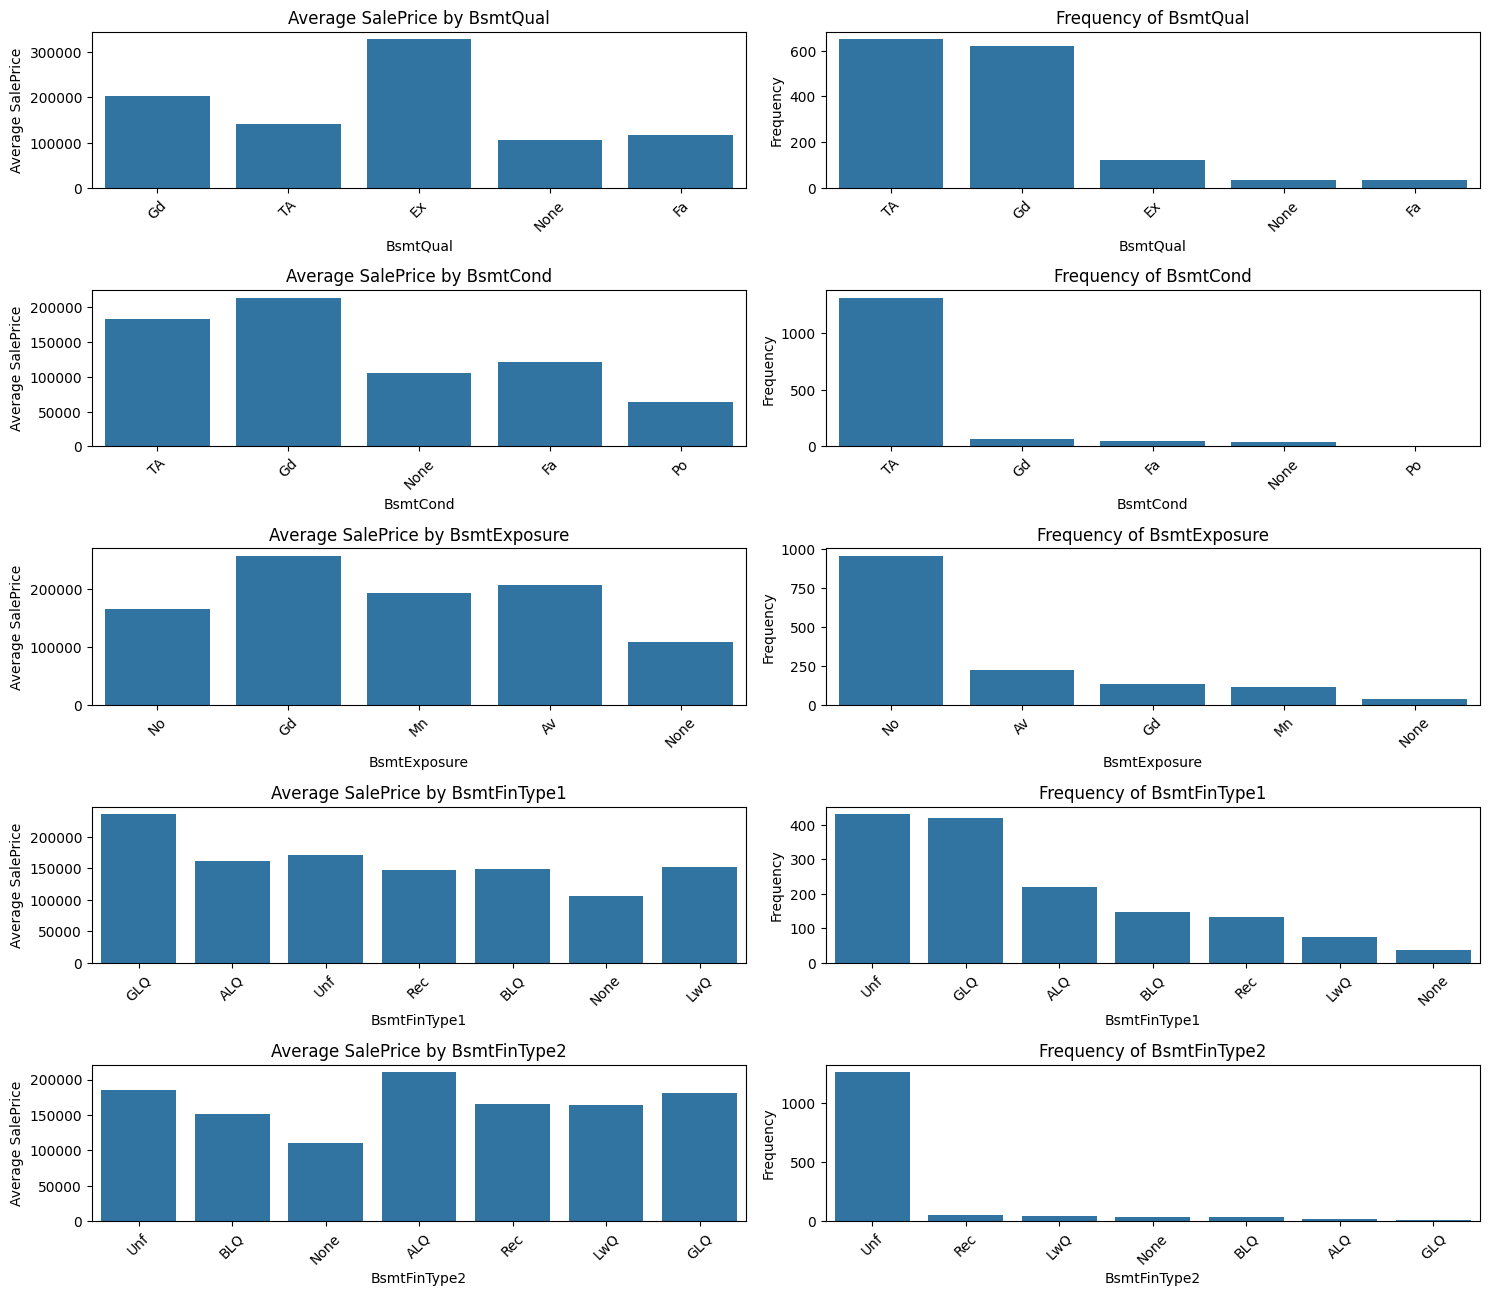

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 지하실 특성 그룹
basement_features = [
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'
]

# 평균 SalePrice와 빈도수 시각화를 위한 서브플롯 생성
plt.figure(figsize=(15, 15))
for idx, feature in enumerate(basement_features, start=1):
    # 평균 SalePrice 그래프
    plt.subplot(6, 2, idx*2-1)  # 홀수 인덱스의 서브플롯
    sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)
    plt.title(f'Average SalePrice by {feature}')
    plt.xticks(rotation=45)
    plt.xlabel(feature)
    plt.ylabel('Average SalePrice')

    # 빈도수 그래프
    plt.subplot(6, 2, idx*2)  # 짝수 인덱스의 서브플롯
    sns.countplot(data=dataset_df, x=feature, order=dataset_df[feature].value_counts().index)
    plt.title(f'Frequency of {feature}')
    plt.xticks(rotation=45)
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

세부 feature의 빈도수가 낮은 BsmtCond feature(지하실 상태)는 제외


랜덤 포레스트를 통한 feature 중요도 평가

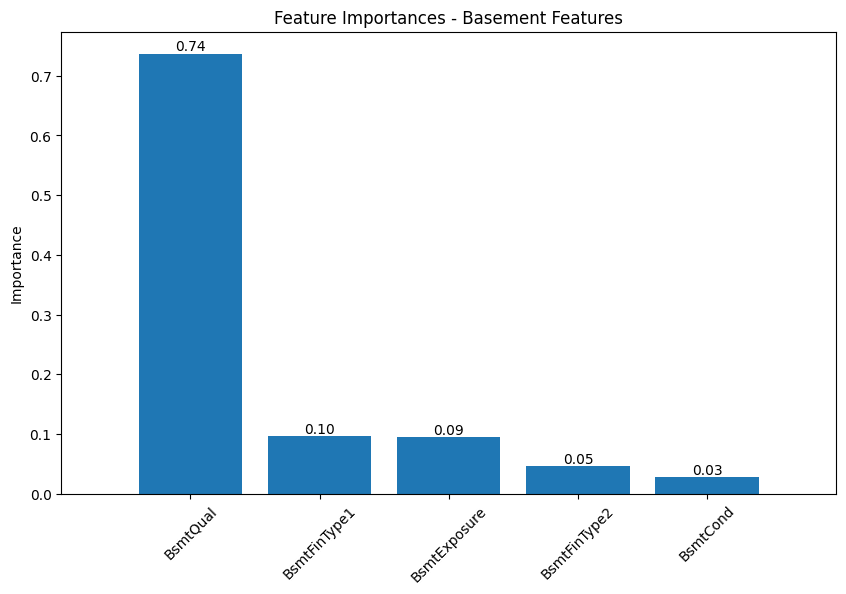

In [ ]:
# 랜덤 포레스트 모델을 통한 feature 중요도 평가
# 데이터 준비
X = dataset_df[basement_features]
y = dataset_df['SalePrice']

# 범주형 변수를 숫자로 인코딩
X_encoded = X.apply(LabelEncoder().fit_transform)

# 훈련/테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Feature importance 추출
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# 중요도 시각화
plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Basement Features")
bars = plt.bar(range(X_encoded.shape[1]), importances[indices], align="center")
plt.xticks(range(X_encoded.shape[1]), X_encoded.columns[indices], rotation=45)
plt.xlim([-1, X_encoded.shape[1]])
plt.ylabel('Importance')

# 중요도 수치를 소수점 2자리까지 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom')

plt.show()

BsmtQual(지하실 품질) 0.74로 중요도 높음
BsmtCond(지하실 상태), BsmtExposure (지하실 노출 여부), BsmtFinType1(지하실 마감 유형 1), BsmtFinType2 (지하실 마감 유형 2) 는 안 중요해 보임

3. 난방 및 냉방 특성

<ipython-input-225-5d5aa3b86a0b>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)
<ipython-input-225-5d5aa3b86a0b>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)
<ipython-input-225-5d5aa3b86a0b>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)


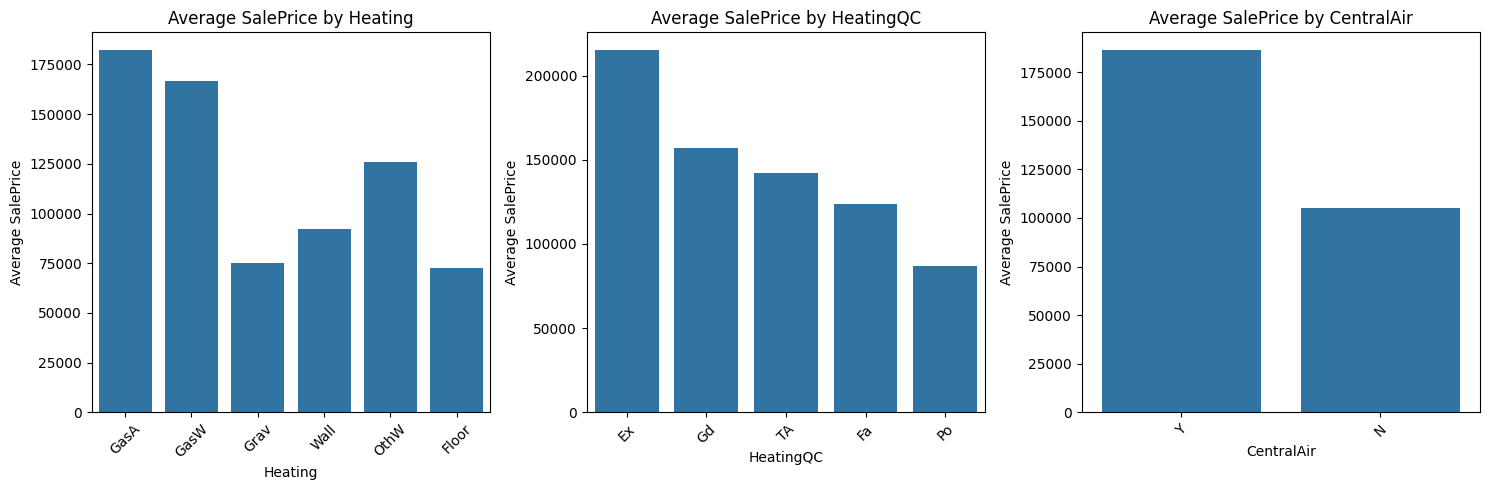

In [ ]:
# 난방 및 냉방 특성 그룹
heating_cooling_features = [
    'Heating', 'HeatingQC', 'CentralAir'
]

# 평균 SalePrice를 기준으로 막대 그래프 생성
plt.figure(figsize=(15, 5))
for idx, feature in enumerate(heating_cooling_features, start=1):
    plt.subplot(1, 3, idx)  # 1행 3열 서브플롯 생성
    sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)
    plt.title(f'Average SalePrice by {feature}')
    plt.xticks(rotation=45)
    plt.xlabel(feature)
    plt.ylabel('Average SalePrice')
plt.tight_layout()
plt.show()

<ipython-input-226-625a3b93ec1c>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)
<ipython-input-226-625a3b93ec1c>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)
<ipython-input-226-625a3b93ec1c>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)


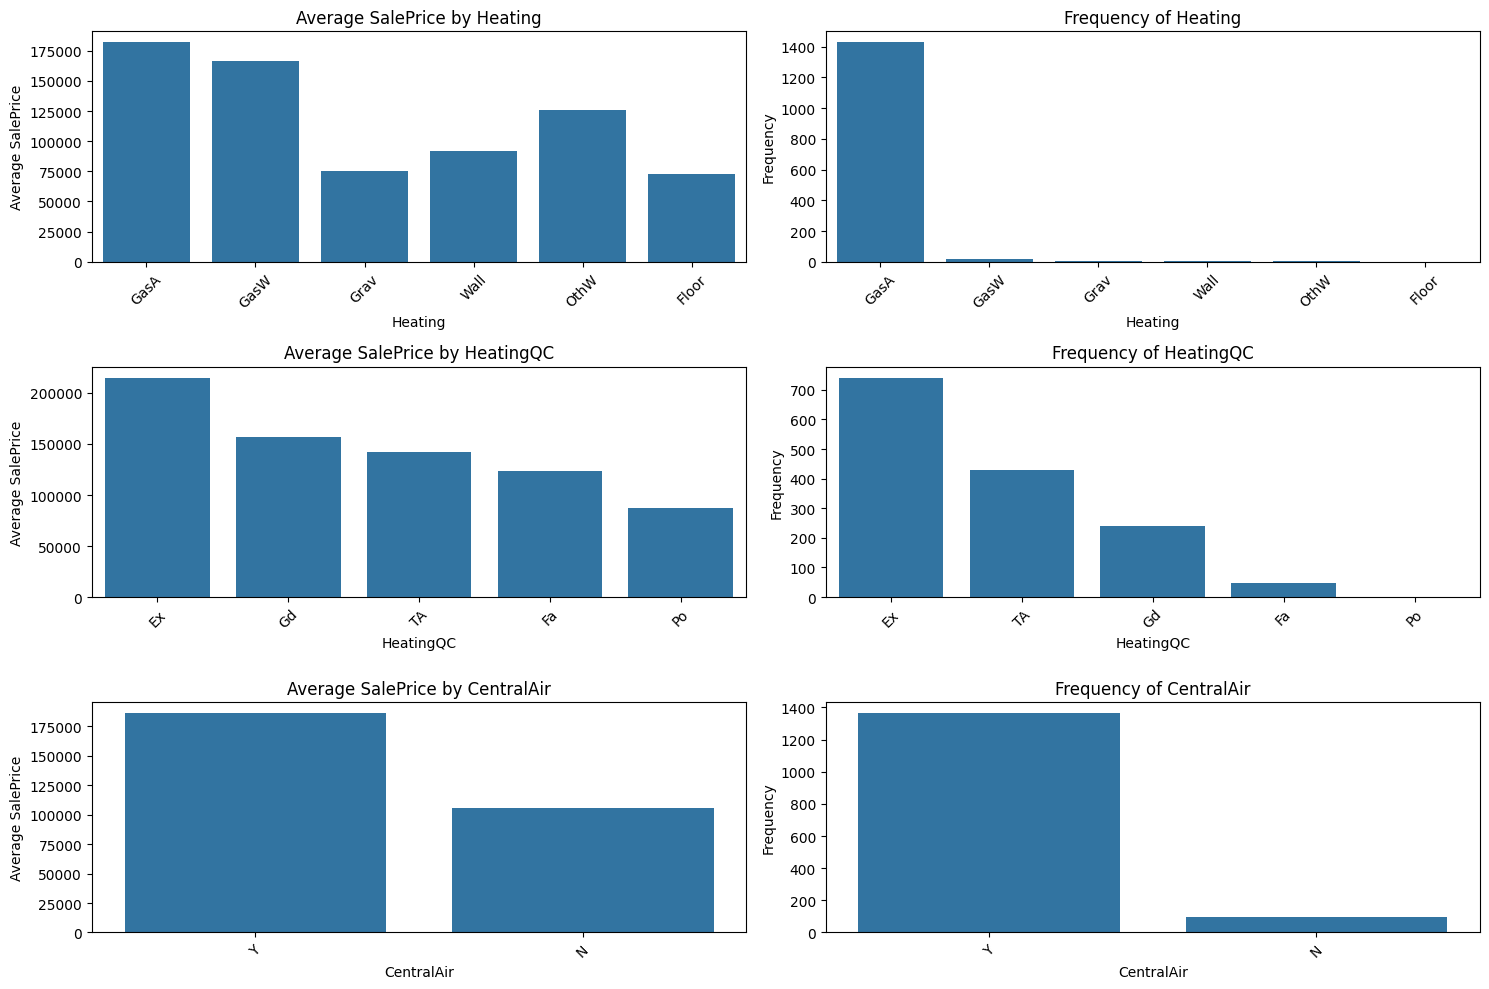

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 난방 및 냉방 특성 그룹
heating_cooling_features = [
    'Heating', 'HeatingQC', 'CentralAir'
]

# 평균 SalePrice와 빈도수 시각화를 위한 서브플롯 생성
plt.figure(figsize=(15, 10))  # 전체 그래프 크기

for idx, feature in enumerate(heating_cooling_features, start=1):
    # 평균 SalePrice 그래프
    plt.subplot(3, 2, idx * 2 - 1)  # 홀수 인덱스에 SalePrice 그래프
    sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)
    plt.title(f'Average SalePrice by {feature}')
    plt.xticks(rotation=45)
    plt.xlabel(feature)
    plt.ylabel('Average SalePrice')

    # 빈도수 그래프
    plt.subplot(3, 2, idx * 2)  # 짝수 인덱스에 빈도수 그래프
    sns.countplot(x=feature, data=dataset_df, order=dataset_df[feature].value_counts().index)
    plt.title(f'Frequency of {feature}')
    plt.xticks(rotation=45)
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Heating (난방 유형)에 GasA 를 제외한 나머지 변수들의 빈도수가 낮은 관계로, Heating 변수는 삭제? --> GasA를 제외한 나머지는 Others로 묶어서. 일단 랜덤포레스트로 Heating 변수의 중요도를 함께 보자

- 랜덤 포레스트 모델 학습 및 중요도 평가

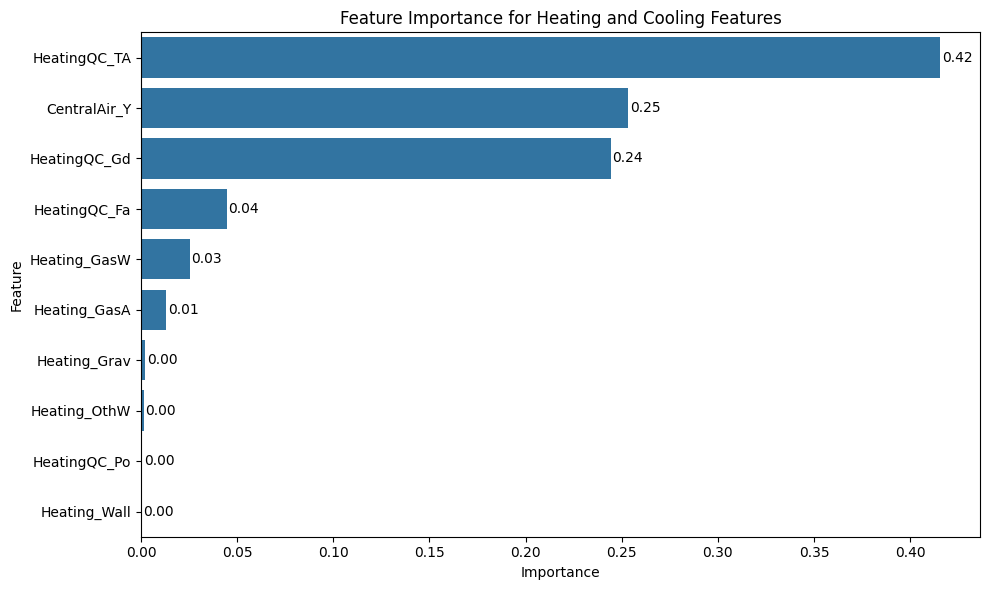

In [ ]:
# 난방 및 냉방 특성 그룹
heating_cooling_features = ['Heating', 'HeatingQC', 'CentralAir']

# Heating, HeatingQC, CentralAir 변수를 포함한 전체 데이터프레임에서 범주형 변수를 더미 변수로 변환
df_dummies = pd.get_dummies(dataset_df[heating_cooling_features + ['SalePrice']], drop_first=True)

# 설명 변수(X)와 타겟 변수(y) 분리
X = df_dummies.drop('SalePrice', axis=1)
y = df_dummies['SalePrice']

# 학습 데이터와 테스트 데이터를 70:30 비율로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 랜덤 포레스트 모델 생성 및 학습
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 피처 중요도 추출
feature_importances = rf.feature_importances_

# 피처 이름과 중요도를 데이터프레임으로 저장
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# 중요도를 기준으로 정렬
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# 중요도 시각화
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Importance', y='Feature', data=feature_importances_df)

# 각 막대 위에 중요도 값 표시 (소수점 2자리로)
for i, v in enumerate(feature_importances_df['Importance']):
    ax.text(v + 0.001, i, f'{v:.2f}', color='black', va='center')  # 중요도 값을 소수점 2자리로 표시

plt.title('Feature Importance for Heating and Cooling Features')
plt.tight_layout()
plt.show()

0.5 이상인 feature는 없음

4. 내부 설비 및 주방 특성

<ipython-input-228-716618ffae3a>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)
<ipython-input-228-716618ffae3a>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)


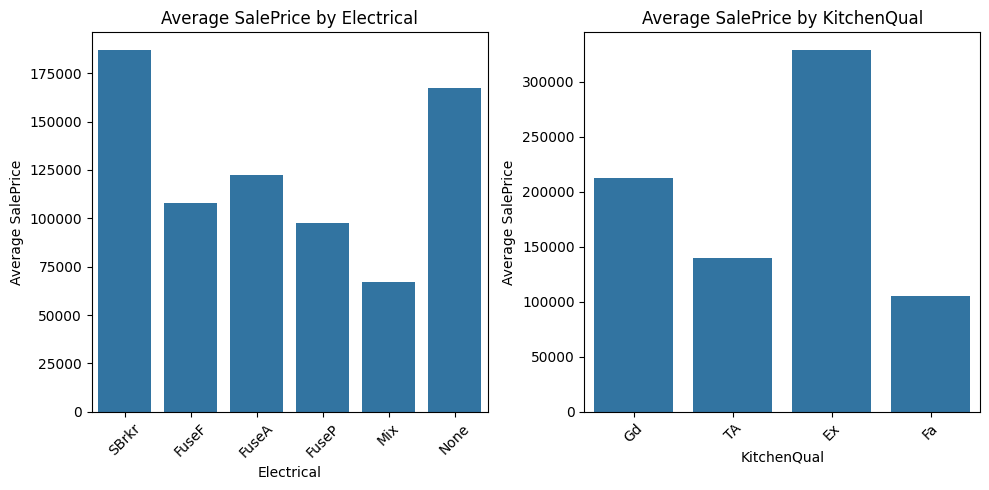

In [ ]:
# 내부 설비 및 주방 특성 그룹
interior_features = [
    'Electrical', 'KitchenQual'
]

# 평균 SalePrice를 기준으로 막대 그래프 생성
plt.figure(figsize=(10, 5))
for idx, feature in enumerate(interior_features, start=1):
    plt.subplot(1, 2, idx)  # 1행 2열 서브플롯 생성
    sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)
    plt.title(f'Average SalePrice by {feature}')
    plt.xticks(rotation=45)
    plt.xlabel(feature)
    plt.ylabel('Average SalePrice')
plt.tight_layout()
plt.show()

<ipython-input-229-e381289180c1>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)
<ipython-input-229-e381289180c1>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)


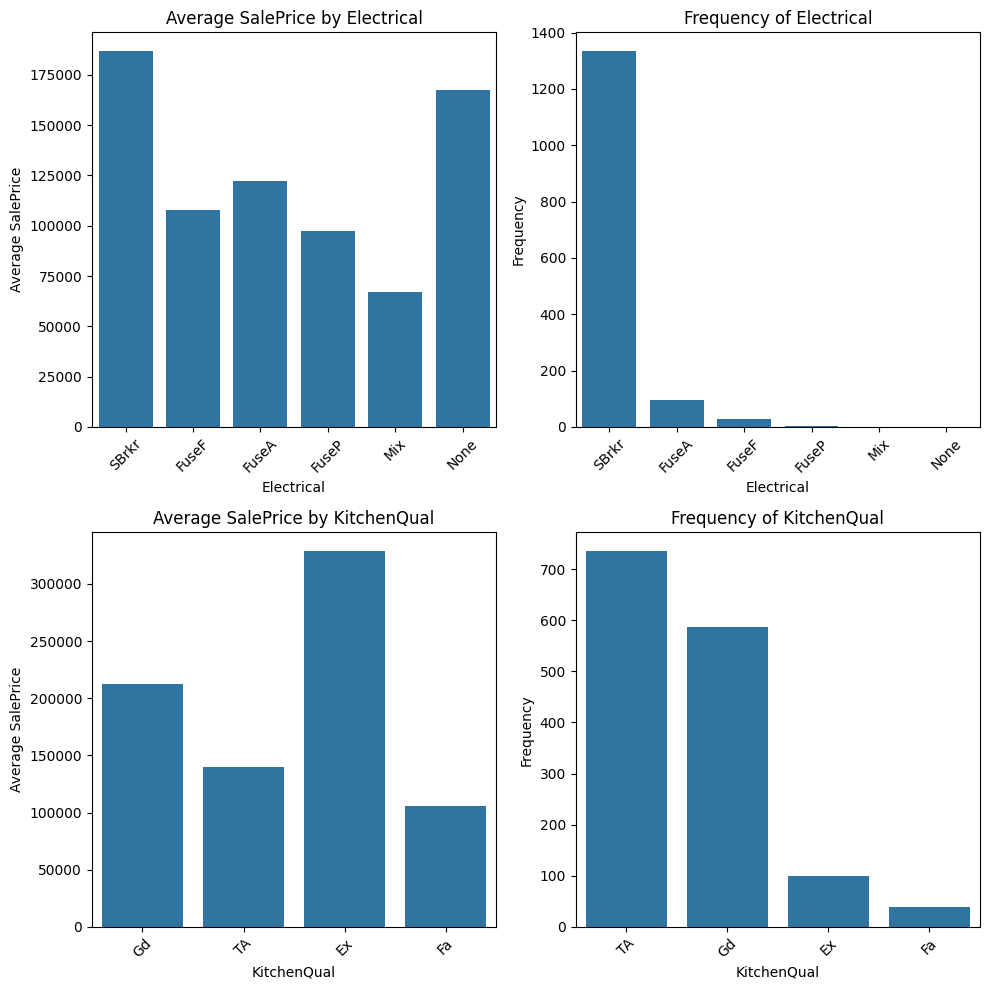

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 내부 설비 및 주방 특성 그룹
interior_features = ['Electrical', 'KitchenQual']

# 평균 SalePrice와 빈도수 시각화를 위한 서브플롯 생성
plt.figure(figsize=(10, 10))  # 전체 그래프 크기

for idx, feature in enumerate(interior_features, start=1):
    # 평균 SalePrice 그래프
    plt.subplot(2, 2, idx * 2 - 1)  # 홀수 인덱스에 SalePrice 그래프
    sns.barplot(x=feature, y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)
    plt.title(f'Average SalePrice by {feature}')
    plt.xticks(rotation=45)
    plt.xlabel(feature)
    plt.ylabel('Average SalePrice')

    # 빈도수 그래프
    plt.subplot(2, 2, idx * 2)  # 짝수 인덱스에 빈도수 그래프
    sns.countplot(x=feature, data=dataset_df, order=dataset_df[feature].value_counts().index)
    plt.title(f'Frequency of {feature}')
    plt.xticks(rotation=45)
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()  # 레이아웃 조정
plt.show()

- 랜덤 포레스트 모델 학습 및 중요도 평가

<ipython-input-230-d290733370fe>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


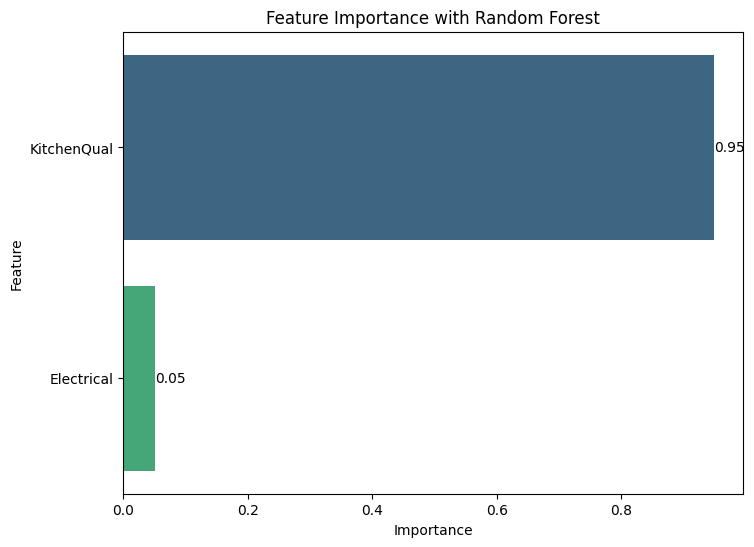

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터프레임에서 필요한 컬럼을 선택합니다.
interior_features = ['Electrical', 'KitchenQual']
target = 'SalePrice'

# 카테고리형 변수를 수치형으로 변환 (Label Encoding)
dataset_encoded = dataset_df.copy()
label_encoders = {}
for feature in interior_features:
    le = LabelEncoder()
    dataset_encoded[feature] = le.fit_transform(dataset_encoded[feature])
    label_encoders[feature] = le

# 피처와 타겟으로 데이터 분리
X = dataset_encoded[interior_features]
y = dataset_encoded[target]

# 훈련 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 랜덤 포레스트 회귀 모델 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 피처 중요도 추출
importances = rf_model.feature_importances_
feature_names = X.columns

# 피처 중요도를 데이터프레임으로 생성
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 피처 중요도 시각화 및 수치 표시
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')

# 각 막대 상단에 중요도 수치 표시 (소수점 2자리)
for index, value in enumerate(importance_df['Importance']):
    plt.text(value, index, f'{value:.2f}', va='center')  # 막대의 끝부분에 수치를 표시

plt.title('Feature Importance with Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Electrical feature (0.05) 는 중요해 보이지 않으며, KichenQual (키친 품질) 중요해 보임

```
# This is formatted as code
```



5. 기타 주택 기능성

<ipython-input-231-9cd316c4131f>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=functional_features[0], y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)


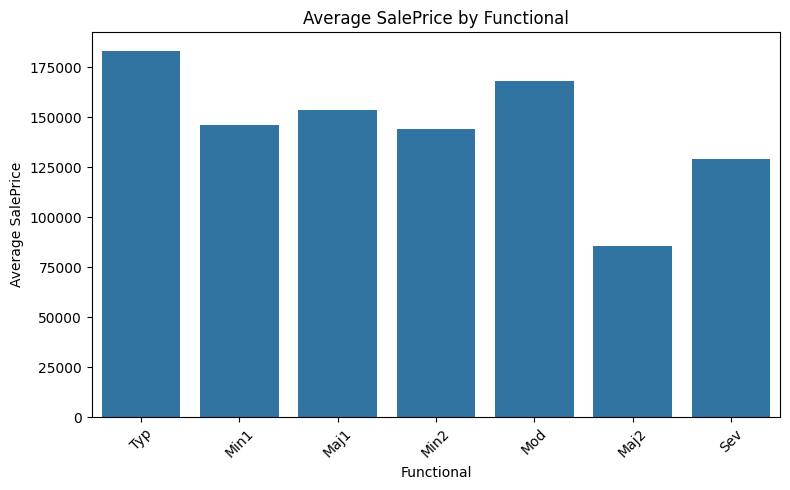

In [ ]:
# 기타 주택 기능성 그룹
functional_features = [
    'Functional'
]

# 평균 SalePrice를 기준으로 막대 그래프 생성
plt.figure(figsize=(8, 5))
sns.barplot(x=functional_features[0], y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)
plt.title(f'Average SalePrice by {functional_features[0]}')
plt.xticks(rotation=45)
plt.xlabel(functional_features[0])
plt.ylabel('Average SalePrice')
plt.tight_layout()
plt.show()

<ipython-input-232-3aae0c528620>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=functional_features[0], y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)


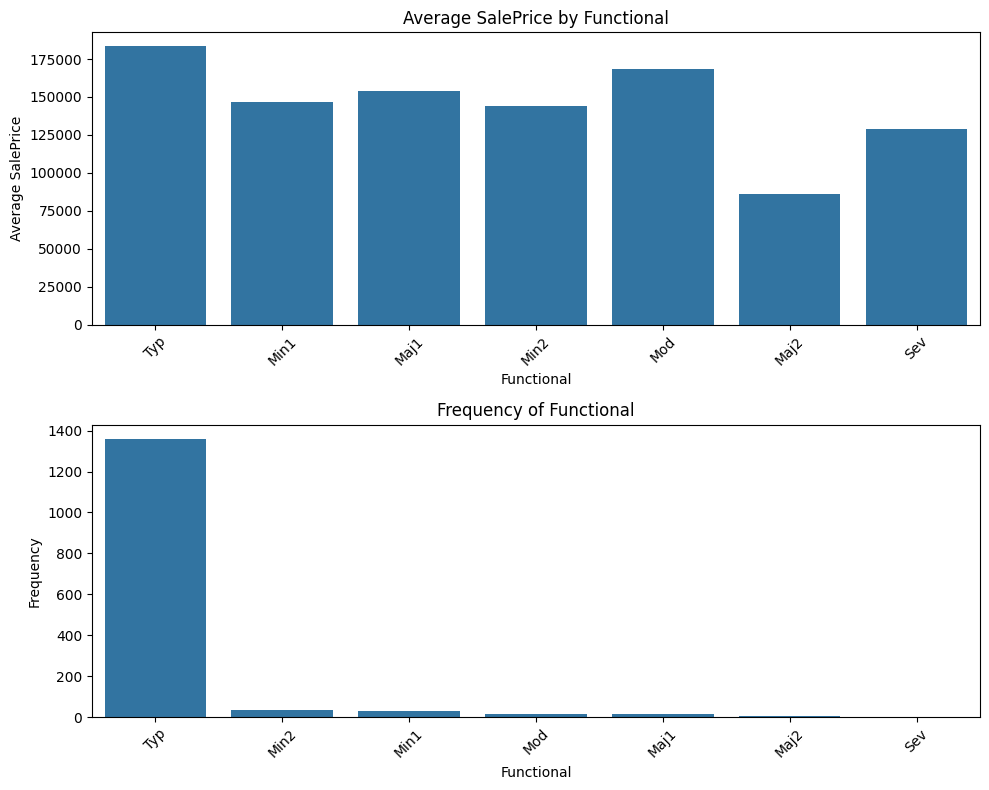

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 기타 주택 기능성 그룹
functional_features = ['Functional']

# 평균 SalePrice와 빈도수 시각화를 위한 서브플롯 생성
plt.figure(figsize=(10, 8))

# 평균 SalePrice 그래프
plt.subplot(2, 1, 1)  # 2행 1열 중 첫 번째 그래프
sns.barplot(x=functional_features[0], y='SalePrice', data=dataset_df, estimator=np.mean, ci=None)
plt.title(f'Average SalePrice by {functional_features[0]}')
plt.xticks(rotation=45)
plt.xlabel(functional_features[0])
plt.ylabel('Average SalePrice')

# 빈도수 그래프
plt.subplot(2, 1, 2)  # 2행 1열 중 두 번째 그래프
sns.countplot(x=functional_features[0], data=dataset_df, order=dataset_df[functional_features[0]].value_counts().index)
plt.title(f'Frequency of {functional_features[0]}')
plt.xticks(rotation=45)
plt.xlabel(functional_features[0])
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Functional(주택 기능성 평가) feature는 Typ를 제외한 나머지 변수들의 빈도수가 매우 낮음 --> 삭제?

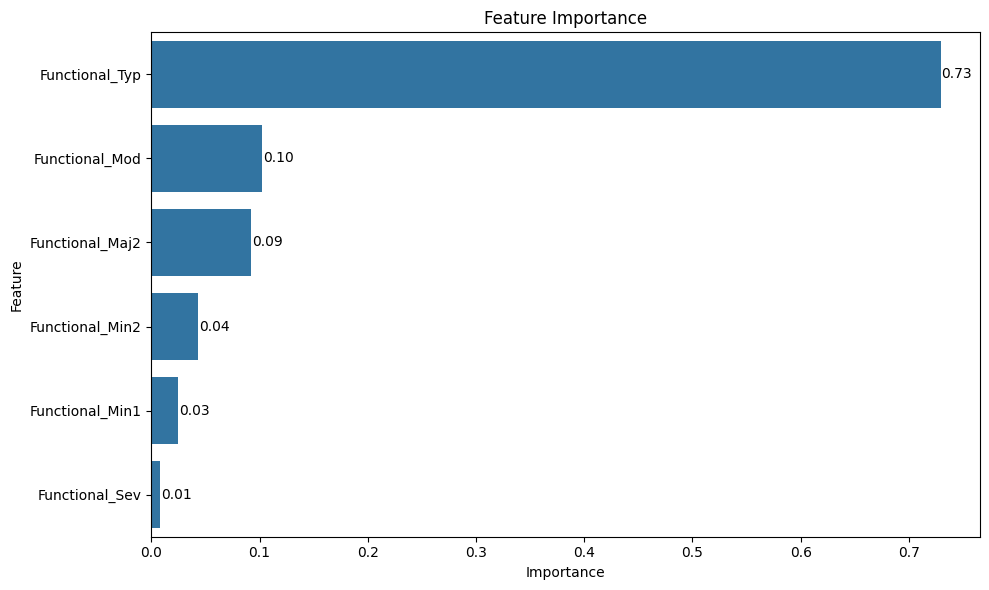

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드 및 전처리 (dataset_df는 이미 존재한다고 가정)
# 독립 변수 (X)와 종속 변수 (y)를 분리
X = dataset_df[functional_features]  # Functional 변수만 사용
y = dataset_df['SalePrice']  # 타겟 변수

# 결측값 처리 (필요시)
X = pd.get_dummies(X, drop_first=True)  # 범주형 변수를 원-핫 인코딩

# 데이터셋을 훈련 및 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 생성 및 학습
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 중요도 계산
feature_importances = rf.feature_importances_

# 피처 이름과 중요도를 DataFrame으로 저장
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# 중요도 순서대로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 피처 중요도 시각화
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Importance', y='Feature', data=importance_df)

# 각 막대 위에 중요도 값 표시
for i, v in enumerate(importance_df['Importance']):
    ax.text(v + 0.001, i, f'{v:.2f}', color='black', va='center')  # 중요도 값을 소수점 2자리로 표시

plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

위 랜덤포레스트 중요도 평가에서는 Typ가 매우 높게 나온편(0.73). 그대로 두거나 합칠 예정

범주형 변수의 경우, 결론적으로, 중요도가 0.5 이상이면서, 세부 feature가 높은 경우는 그대로 두는 방향으로 다음 피처들을 선택함
ExterQual (외장 재질 품질) —> 0.5이상
BsmtQual (지하실 품질) -->0.74
KitchenQual (주방 품질) —>0.95
Functional (주택 기능성 평가) --> Typ (0.73)

최종 선택 변수 : OverallQual (전반적인 자재 및 마감 품질)
GrLivArea (지상 생활 공간 면적)
TotalBsmtSF (총 지하실 면적)
1stFlrSF (1층 면적)
ExterQual (외장 재질 품질)
BsmtQual (지하실 품질)
KitchenQual (주방 품질)
Functional (주택 기능성 평가)